## Import libraries

In [19]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.util import ngrams
from ipywidgets import interact, interactive, interact_manual
import en_core_web_sm
from nltk.corpus import words
import warnings
warnings.filterwarnings('ignore')

model= en_core_web_sm.load()


pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')

# Lemmatizer
wn = nltk.WordNetLemmatizer()

## Data

In [2]:
data = pd.read_csv('../Data/DataSet.csv')
data.head(2)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbreaking and award-winning cooking site. We support,...","<p>Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and...",<ul>\r\n<li>Experience with content management systems a major plus (any blogging counts!)</li>\...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Production Service.</h3>\r\n<p>90 Seconds is the worlds C...",<p>Organised - Focused - Vibrant - Awesome!<br><br>Do you have a passion for customer service? S...,<p><b>What we expect from you:</b></p>\r\n<p>Your key responsibility will be to communicate with...,<h3><b>What you will get from us</b></h3>\r\n<p>Through being part of the 90 Seconds team you wi...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f


In [3]:
print("Unique locations", len(data.location.unique()))
print("Unique job titles", len(data.title.unique()))
print("Unique industries", len(data.industry.unique()))

Unique locations 3106
Unique job titles 11231
Unique industries 132


## Data Visualization

Visualizing how does the frequency of fraudulent vary across different columns, here the idea was to understand if any column has a good balance of fradulant and legit information

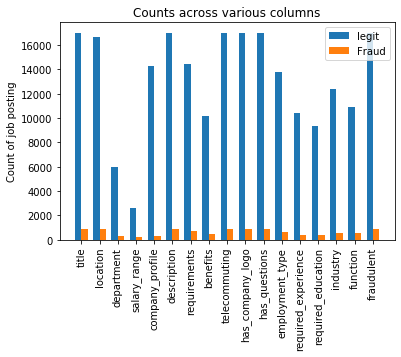

In [4]:
legit = data[data['fraudulent'] == 'f'].groupby(["fraudulent"]).agg('count').values.tolist()[0]
fraud = data[data['fraudulent'] == 't'].groupby(["fraudulent"]).agg('count').values.tolist()[0]

ind = np.arange(len(data.columns)-1)

width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2,legit, width,label='legit')
rects2 = ax.bar(ind + width/2, fraud, width,
                label='Fraud')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count of job posting')
ax.set_title('Counts across various columns')
ax.set_xticks(ind)
ax.set_xticklabels(data.columns, rotation=90)
ax.legend()

In [17]:
# merge all description columns
data['concat'] = data['company_profile'] + data['description'] + data['requirements']
data = data[data['concat'].notnull()]
data['concat'][:2]


0    <h3>We're Food52, and we've created a groundbreaking and award-winning cooking site. We support,...
1    <h3>90 Seconds, the worlds Cloud Video Production Service.</h3>\r\n<p>90 Seconds is the worlds C...
Name: concat, dtype: object

check number of job posting across industry


Text(0, 0.5, 'Count')

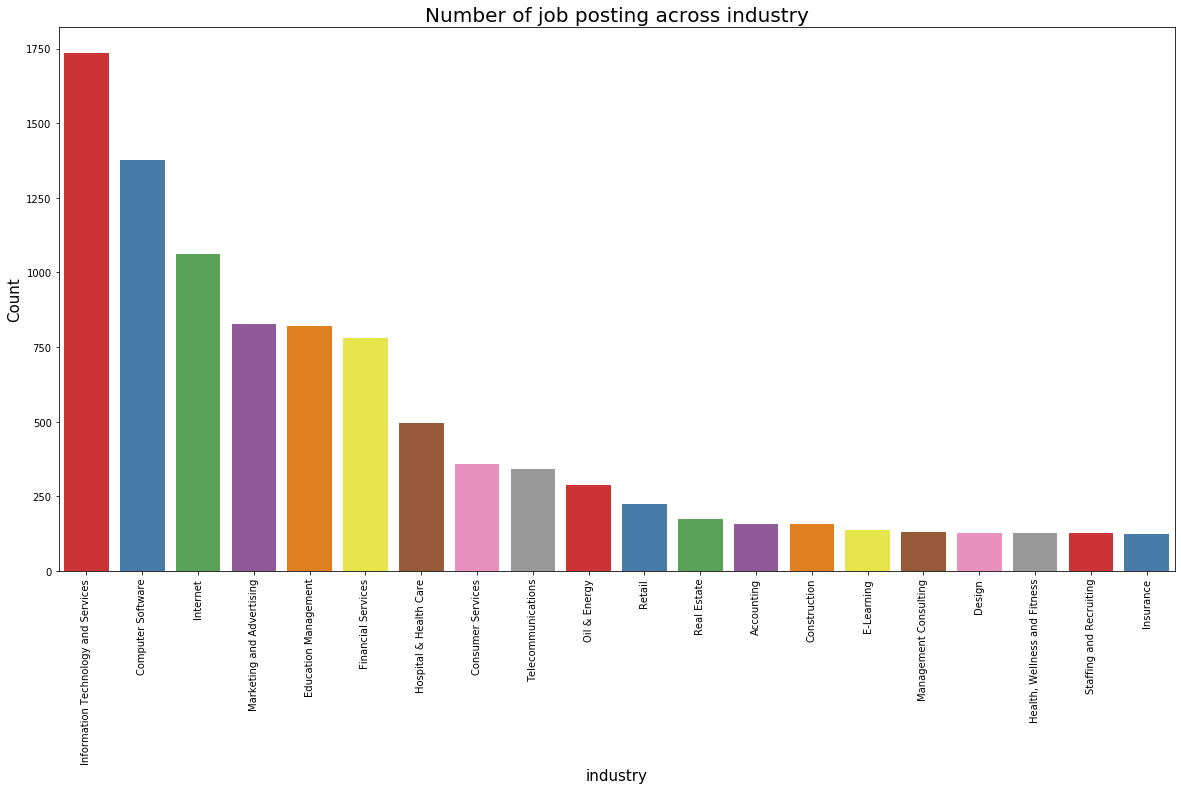

In [16]:
# check number of job posting across industry
count_jobs = data.groupby(["industry"], as_index=False).agg({'title':'count'}).sort_values('title', ascending = False).head(20)

# plot
plt.rcParams["figure.figsize"] = (20,10)

# plt.bar(count_jobs.industry, count_jobs.title, color="Set1")
g = sns.barplot("industry", "title", data=count_jobs, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Number of job posting across industry", fontsize=20)
g.set_xlabel("industry", fontsize=15)
g.set_ylabel("Count", fontsize=15)

### Frequency distribution plot

In [18]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data_2['body_len'] = data_2['concat'].apply(lambda x: len(x) - x.count(" "))
data_2['punct%'] = data_2['concat'].apply(lambda x: count_punct(x))

In [20]:
def count_caps(text):
    count = 0
    for i in text:
#         print(i)
        flag = i.isupper()
        if flag:
            count +=1
    return count

In [21]:
data_2['is_captial'] = data_2['concat'].apply(lambda x: count_caps(x))
data_2['is_captial'][:5]

0     85
1    145
2     58
3    124
4    283
Name: is_captial, dtype: int64

In [22]:
data_2['is_captial'].min(), data_2['is_captial'].max()

(5, 11980)

In [23]:
data_2['desc_len'] = data_2['description'].apply(lambda x: len(x) - x.count(" "))

In [24]:
data_2['desc_len'].min(), data_2['desc_len'].max()

(56, 50083)

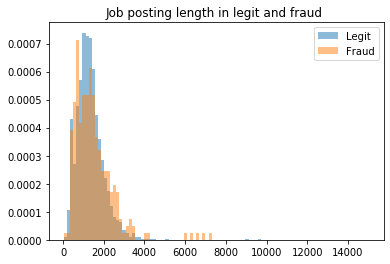

In [25]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

bins = np.linspace(50, 15000, 100)

pyplot.hist(data_2[data_2['fraudulent']=='f']['body_len']**1/2, bins,  alpha=0.5,normed=True, label='Legit')
pyplot.hist(data_2[data_2['fraudulent']=='t']['body_len']**1/2, bins, alpha=0.5, normed=True, label='Fraud')
pyplot.legend(loc='upper right')
pyplot.title('Job posting length in legit and fraud ')
pyplot.show()

In [26]:
data_2['punct%'].min(), data_2['punct%'].max()

(2.0, 26.3)

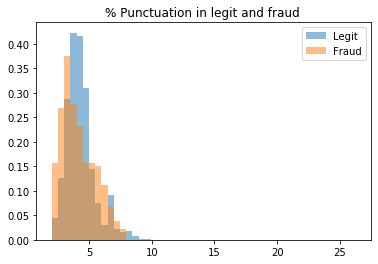

In [27]:
bins = np.linspace(2, 26.3, 50)

data_2['punct%'] = data_2['concat'].apply(lambda x: count_punct(x))
pyplot.hist(data_2[data_2['fraudulent']=='f']['punct%']**1/2, bins,  alpha=0.5,normed=True, label='Legit')
pyplot.hist(data_2[data_2['fraudulent']=='t']['punct%']**1/2, bins, alpha=0.5, normed=True, label='Fraud')
pyplot.title('% Punctuation in legit and fraud ')
pyplot.legend(loc='upper right')

## Data Cleaning and preprocessing 

In [35]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                   "can't've": "cannot have", "'cause": "because", "could've": "could have", 
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
                   "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                   "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                   "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                       "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have" } 

In [46]:
def clean_text(text):
    
    tokens = []
    try:
        # remove html tags
        # anything that starts with <, has a set of characters [a-z], starts with (^) < 
        # has one or more occurances (+) and having one of more repetition (?)
#         print(text)
        text = re.sub('<[^<]+?>', '', text)
        
        text = "".join([word for word in text if word not in string.punctuation and word not in ['li', 'amp', 'br', "pb", "bp", "pp", "bb"]])
#         text = "".join([word for word in text])
        tokens = re.split('\W+', text)
        stemmer = PorterStemmer()
#         tokens = [wn.lemmatize(word) for word in tokens if word not in stopwords and word not in ""]
        tokens = [stemmer.stem(word) for word in tokens if word not in stopwords and word not in ""]

    except:
        pass
    return tokens

In [117]:

import codecs
import unidecode
import re
import spacy
nlp = spacy.load('en_core_web_sm')

def spacy_cleaner(text):
    
#     try:
    print(text)

    apostrophe_handled = re.sub("’", "'", text)
#     apostrophe_handled = re.sub(".", " ", apostrophe_handled)
    apostrophe_handled = apostrophe_handled.replace(".", " ")
    print(apostrophe_handled)
    expanded = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in apostrophe_handled.split(" ")])
    exapnded = "".join([word for word in text if word not in string.punctuation])

    parsed = nlp(expanded)
    final_tokens = []
    for t in parsed:
        if t.is_punct or t.is_space or t.like_url or str(t).startswith('@') or str(t) =='®':
            pass
        elif str(t).__contains__('#url'):
            return ''

        else:
            if t.lemma_ == '-PRON-':
                final_tokens.append(str(t))
            else:
                sc_removed = re.sub("[^a-zA-Z]", '', str(t.lemma_))
#                 print(sc_removed)
                if sc_removed not in ['li', 'amp', 'br', "pb", "bp", "bs",
                                      "pp", "bb", "urlfafceadeaecaedbdfefaae", 
                                      "phoneaadcbcadbebadafed", "emaildfeedfcddfcabcdbbdcbfadc", 
                                      "emailbacfdcecbdabdecdbcadfbeaccdarren", "emaildfeedfcddfcabcdbbdcbfadc"]:
                    if len(sc_removed) > 1:
                        final_tokens.append(sc_removed)
    print(final_tokens)
    joined = ' '.join(final_tokens)
    spell_corrected = re.sub(r'(.)\1+', r'\1\1', joined)
#     except:
#         spell_corrected = ""
    return spell_corrected

In [118]:
import re

def remove_html_tags(text):
    return re.sub('<[^<]+?>', '', str(text))


data.company_profile=data.company_profile.apply(remove_html_tags).str.replace('\r\n', '').str.lower()
data.description=data.description.apply(remove_html_tags).str.replace('\r\n', '').str.lower()
data.requirements=data.requirements.apply(remove_html_tags).str.replace('\r\n', '').str.lower()
data.benefits=data.benefits.apply(remove_html_tags).str.replace('\r\n', '').str.lower()
data.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset,concat
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"we're food52, and we've created a groundbreaking and award-winning cooking site. we support, con...","food52, a fast-growing, james beard award-winning online food community and crowd-sourced and cu...",experience with content management systems a major plus (any blogging counts!)familiar with the ...,nan,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f,"<h3>We're Food52, and we've created a groundbreaking and award-winning cooking site. We support,..."
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 seconds, the worlds cloud video production service.90 seconds is the worlds cloud video produ...",organised - focused - vibrant - awesome!do you have a passion for customer service? slick typing...,"what we expect from you:your key responsibility will be to communicate with the client, 90 secon...",what you will get from usthrough being part of the 90 seconds team you will gain:experience work...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f,"<h3>90 Seconds, the worlds Cloud Video Production Service.</h3>\r\n<p>90 Seconds is the worlds C..."
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,valor services provides workforce solutions that meet the needs of companies across the private ...,"our client, located in houston, is actively seeking an experienced commissioning machinery assis...",implement pre-commissioning and commissioning procedures for rotary equipment.execute all activi...,nan,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f,<h3></h3>\r\n<p>Valor Services provides Workforce Solutions that meet the needs of companies acr...
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,our passion for improving quality of life through geography is at the heart of everything we do....,the company: esri – environmental systems research instituteour passion for improving quality of...,"education: bachelor’s or master’s in gis, business administration, or a related field, or equiva...","our culture is anything but corporate—we have a collaborative, creative environment; phone direc...",f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f,<p>Our passion for improving quality of life through geography is at the heart of everything we ...
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,spotsource solutions llc is a global human capital management consulting firm headquartered in m...,"job title: itemization review managerlocation: fort worth, tx ...","qualifications:rn license in the state of texasdiploma or bachelors of science in nursing, requi...",full benefits offered,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f,<p>SpotSource Solutions LLC is a Global Human Capital Management Consulting firm headquartered i...


In [119]:
# make a list of the sentences 
sentences = []
fraud_sent = []
legit_sent = []
sent = {}
column_list = ['requirements', 'company_profile', 'description', 'benefits'] 
for column in column_list:
    sub = data[(data[column].notnull()) & (data['industry'] =='Oil & Energy')].reset_index(drop=True)
    for x in range(0,len(sub)):
        analyzed_doc = model(sub[column][x])
        for sentence in analyzed_doc.sents:
            cleaned = spacy_cleaner(sentence.text.lower())
            if (cleaned == "") or (len(cleaned) < 15):
                pass
            else:
                if sub['fraudulent'][x] == 'f':
                    legit_sent.append(cleaned)
                else:
                    fraud_sent.append(cleaned)

sentences = fraud_sent + legit_sent

education:bachelor of science in petroleum engineering or a related field is required.experience:
education:bachelor of science in petroleum engineering or a related field is required experience:
['education', 'bachelor', 'of', 'science', 'in', 'petroleum', 'engineering', 'or', 'relate', 'field', 'be', 'require', 'experience']
ten years of related experience or the equivalent combination of education and experience is required. 
ten years of related experience or the equivalent combination of education and experience is required  
['ten', 'year', 'of', 'related', 'experience', 'or', 'the', 'equivalent', 'combination', 'of', 'education', 'and', 'experience', 'be', 'require']
experience with wellview is a plus.a valid state operator’s license is required.
experience with wellview is a plus a valid state operator's license is required 
['experience', 'with', 'wellview', 'be', 'plus', 'valid', 'state', 'operator', 'license', 'be', 'require']
*
*
[]
military experience is highly valued by t

['system', 'demonstrate', 'ability', 'to', 'work', 'with', 'other', 'in', 'team', 'environment']
essential duties and responsibilities:  works closely with other developers and our design team to drive the evolution and expansion of our current product suite.apply knowledge of mobile application technologies, applications, methodologies, processes and tools to carefully analyze and test
essential duties and responsibilities:  works closely with other developers and our design team to drive the evolution and expansion of our current product suite apply knowledge of mobile application technologies, applications, methodologies, processes and tools to carefully analyze and test
['essential', 'duty', 'and', 'responsibility', 'work', 'closely', 'with', 'other', 'developer', 'and', 'our', 'design', 'team', 'to', 'drive', 'the', 'evolution', 'and', 'expansion', 'of', 'our', 'current', 'product', 'suite', 'apply', 'knowledge', 'of', 'mobile', 'application', 'technology', 'application', 'methodo

['education', 'bachelor', 'of', 'science', 'in', 'petroleum', 'engineering', 'or', 'relate', 'field', 'be', 'require', 'experience']
ten years of related experience or the equivalent combination of education and experience is required. 
ten years of related experience or the equivalent combination of education and experience is required  
['ten', 'year', 'of', 'related', 'experience', 'or', 'the', 'equivalent', 'combination', 'of', 'education', 'and', 'experience', 'be', 'require']
experience with wellview is a plus.a valid state operator’s license is required.
experience with wellview is a plus a valid state operator's license is required 
['experience', 'with', 'wellview', 'be', 'plus', 'valid', 'state', 'operator', 'license', 'be', 'require']
*
*
[]
military experience is highly valued by the employer; candidates with military experience can expect some flexibility in terms of requirements, so long as fundamental skills and competencies are present.
military experience is highly val

['excellent', 'communication', 'skill', 'be', 'require', 'must', 'have', 'desire', 'to', 'learn', 'work', 'in', 'team', 'environment', 'and', 'have', 'win', 'attitude']
experience required:project control professional 10+ years
experience required:project control professional 10+ years
['experience', 'require', 'project', 'control', 'professional', 'year']
experienceproject
experienceproject
['experienceproject']
control specialist 5 to 10 years experienceproject
control specialist 5 to 10 years experienceproject
['control', 'specialist', 'to', 'year', 'experienceproject']
control tech 1 to 10 years experience software experience: -
control tech 1 to 10 years experience software experience: -
['control', 'tech', 'to', 'year', 'experience', 'software', 'experience']
ms project, requiredprimavera 6
ms project, requiredprimavera 6
['ms', 'project', 'requiredprimavera']
a plus, but not requiredmicrosoft officeexcelms word experience preferred:project controls experience for small to large 

['experience', 'bachelor', 'degree', 'in', 'environmental', 'science', 'environmental', 'engineering', 'environmental', 'planning', 'or', 'relate', 'field', 'biology', 'geology', 'hydrology', 'chemistry', 'natural', 'resource', 'etc']
another degree may be acceptable with experience in environmental compliance.minimum of three plus (3+) years of professional level experience in the field of environmental compliance is required.demonstrable experience in the application of environmental laws
another degree may be acceptable with experience in environmental compliance minimum of three plus (3+) years of professional level experience in the field of environmental compliance is required demonstrable experience in the application of environmental laws
['another', 'degree', 'may', 'be', 'acceptable', 'with', 'experience', 'in', 'environmental', 'compliance', 'minimum', 'of', 'three', 'plus', 'year', 'of', 'professional', 'level', 'experience', 'in', 'the', 'field', 'of', 'environmental', 'co

['qualification', 'qualified', 'applicant', 'will', 'possess', 'quality', 'such', 'as', 'high', 'school', 'diploma', 'proficiency', 'in', 'ms', 'office', 'suite', 'familiarity', 'with', 'simply', 'account', 'and', 'imac', 'computer', 'environment', 'able', 'to', 'multi', 'task', 'and', 'prioritize', 'to', 'meet', 'strict', 'deadline', 'able', 'to', 'adapt', 'to', 'change', 'while', 'still', 'maintain', 'high', 'level', 'of', 'accuracy', 'and', 'attention', 'to', 'detail']
experience working outdoors.must be safety and team-oriented.ability to perform physical labor on a consistent basis.experience in oilfield services is a definite asset, but not a requirement of the position.don't miss out on this exciting opportunity!applicant will be subject to a background check*.pre-employment drug screen is required as a condition of employment.applicant will be subject to a motor vehicle report.
experience working outdoors must be safety and team-oriented ability to perform physical labor on a c

['instrumentation', 'eamptc', 'electronic', 'with', 'automation', 'field', 'experienceexperience', 'with', 'development', 'programming', 'of', 'plc', 'and', 'scada', 'system', 'rockwell', 'siemens', 'ge', 'fanuc', 'iconics', 'wonderware', 'vtsexperience', 'with', 'programming', 'language', 'assemblerdemonstrable', 'relevant', 'software', 'engineering', 'experience', 'preferably', 'within', 'the', 'oil', 'and', 'gas', 'industrywill', 'have', 'sound', 'work', 'knowledge', 'of', 'offshore', 'working', 'technique', 'and', 'ideally', 'will', 'have', 'have', 'exposure', 'to', 'the', 'offshore', 'work', 'environmentdemonstrable', 'experience', 'in', 'the', 'ability', 'to', 'carry', 'out', 'all', 'element', 'of', 'software', 'design', 'within', 'control', 'systemspreferably', 'charter', 'engineer', 'statuswe', 'offer', 'friendly', 'colleague', 'in', 'an', 'industry', 'with', 'bright', 'future', 'an', 'environment', 'where', 'you', 'be', 'encourage', 'to', 'develop', 'your', 'skill', 'and', 'sh

['understand', 'strategy', 'demonstrate', 'understanding', 'and', 'support', 'of', 'the', 'organization', 'mission', 'and', 'strategy', 'integrate', 'and', 'balance', 'big', 'picture', 'concern', 'with', 'day', 'to', 'day', 'activity']
- encourages commitment - projects a positive image and serves as a role model for others; promotes commitment to the organization’s vision, values, and direction; acknowledges others’ efforts and accomplishments.- communicate effectively - expresses ideas clearly and concisely; listens carefully and attentively to others’ opinions and ideas; shares information and viewpoints openly and directly with others.- execute efficiently - delegates responsibility and conveys clear expectations to the appropriate staff; monitors the progress of others and redirects efforts
- encourages commitment - projects a positive image and serves as a role model for others; promotes commitment to the organization's vision, values, and direction; acknowledges others' efforts 

['must', 'be', 'comfortable', 'in', 'confined', 'space', 'and', 'physically', 'able', 'to', 'move', 'comfortably', 'in', 'confined', 'space', 'good', 'job', 'stability', 'on', 'call']
education:bachelor’s degree in accounting, management or related field with 30+ hours of accounting coursework. 
education:bachelor's degree in accounting, management or related field with 30+ hours of accounting coursework  
['education', 'bachelor', 'degree', 'in', 'accounting', 'management', 'or', 'relate', 'field', 'with', 'hour', 'of', 'accounting', 'coursework']
experience:3+ years of public accounting experience preferred.
experience:3+ years of public accounting experience preferred 
['experience', 'year', 'of', 'public', 'accounting', 'experience', 'prefer']
industry knowledge a must.
industry knowledge a must 
['industry', 'knowledge', 'must']
cpa, master's degree preferred.
cpa, master's degree preferred 
['cpa', 'master', 'degree', 'prefer']
cia and other designations beneficial.
cia and other

qualifications &amp; personal attributesb.sc.
qualifications &amp; personal attributesb sc 
['qualification', 'personal', 'attributesb', 'sc']
degree in relevant engineering discipline.
degree in relevant engineering discipline 
['degree', 'in', 'relevant', 'engineering', 'discipline']
(persons not having relevant theoretical qualifications must have minimum 3 years practical experience from relevant industry)practical experience with 3d-modelling, assembly &amp; machining drawings, geometrical tolerances solidworks cad system or other similar 3d cad systemsneeds to be structured and analytic independent with good communication skillsteam-player and solution orientedgood communication skillswe offer• friendly colleagues in an industry with a bright future.• an environment where you are encouraged to develop your skills and share your knowledge with your colleagues.• competitive benefits and strong focus on work-life balance.
(persons not having relevant theoretical qualifications must 

personal attributes:you have a good higher education degree in the area of production
['personal', 'attribute', 'you', 'have', 'good', 'high', 'education', 'degree', 'in', 'the', 'area', 'of', 'production']
technology.you have at least three years’ experience in management.
technology you have at least three years' experience in management 
['technology', 'you', 'have', 'at', 'least', 'three', 'year', 'experience', 'in', 'management']
we will also consider second-tier candidates (team leaders or deputies) with the necessary experience and qualifications.a comprehensive knowledge of machining production techniques and machining processes is essential.
we will also consider second-tier candidates (team leaders or deputies) with the necessary experience and qualifications a comprehensive knowledge of machining production techniques and machining processes is essential 
['we', 'will', 'also', 'consider', 'second', 'tier', 'candidate', 'team', 'leader', 'or', 'deputy', 'with', 'the', 'neces

['some', 'department', 'shift', 'work', 'will', 'be', 'need', 'we', 'offer', 'friendly', 'colleague', 'in', 'an', 'industry', 'with', 'bright', 'future', 'an', 'environment', 'where', 'you', 'be', 'encourage', 'to', 'develop', 'your', 'skill', 'and', 'share', 'your', 'knowledge', 'with', 'your', 'colleague', 'competitive', 'benefit', 'and', 'strong', 'focus', 'on', 'work', 'life', 'balance']
qualifications &amp; personal attributes• higher technical education, msc / bsc or other relevant experience, preferably within structural or architectural disciplines.• technical knowledge within the oil industry, preferably 4-7 years’ of relevant experience• knowledge in pdms is a great advantage• good knowledge of standards and regulations• fluent oral and written english• good communication skills• must be able to work both independently and in teamswe offer• friendly colleagues in an industry with a bright future.• an environment where you are encouraged to develop your skills and share your k

['mech']
eng (oil &amp
eng (oil &amp
['eng', 'oil']
; gas) is required having 10+ years’ experience in the mechanical engineering fieldqualifications required:bs in mechanical engineering10
; gas) is required having 10+ years' experience in the mechanical engineering fieldqualifications required:bs in mechanical engineering10
['gas', 'be', 'require', 'have', 'year', 'experience', 'in', 'the', 'mechanical', 'engineering', 'fieldqualification', 'require', 'in', 'mechanical', 'engineering']
+ years’ experience in the mechanical engineering fieldmust have recent prior experience in working for an engineering company in oil &amp; gas or equivalent engineering environment (note:
+ years' experience in the mechanical engineering fieldmust have recent prior experience in working for an engineering company in oil &amp; gas or equivalent engineering environment (note:
['year', 'experience', 'in', 'the', 'mechanical', 'engineering', 'fieldmust', 'have', 'recent', 'prior', 'experience', 'in', 'wor

qualifications &amp; personal attributes educated to hnc levelunderstanding of the offshore oil &amp; gas industry.a strong understanding of the capabilities of the key engineering systems &amp; tools in operation within the design office.a
qualifications &amp; personal attributes educated to hnc levelunderstanding of the offshore oil &amp; gas industry a strong understanding of the capabilities of the key engineering systems &amp; tools in operation within the design office a
['qualification', 'personal', 'attribute', 'educate', 'to', 'hnc', 'levelunderstande', 'of', 'the', 'offshore', 'oil', 'gas', 'industry', 'strong', 'understanding', 'of', 'the', 'capability', 'of', 'the', 'key', 'engineering', 'systems', 'tool', 'in', 'operation', 'within', 'the', 'design', 'office']
strong understanding and skill level of caddemonstrable experience within a similar environment /
strong understanding and skill level of caddemonstrable experience within a similar environment /
['strong', 'understa

technicalmicrosoft office – all main applications word, excel, power point, ms project &amp
technicalmicrosoft office – all main applications word, excel, power point, ms project &amp
['technicalmicrosoft', 'office', 'all', 'main', 'application', 'word', 'excel', 'power', 'point', 'ms', 'project']
; visio.must be very familiar with basic computer systems, file structures and operations.very familiar with both the energy and acoustic industries, including technologies and business drivers.specific technical requirements
; visio must be very familiar with basic computer systems, file structures and operations very familiar with both the energy and acoustic industries, including technologies and business drivers specific technical requirements
['visio', 'must', 'be', 'very', 'familiar', 'with', 'basic', 'computer', 'system', 'file', 'structure', 'and', 'operation', 'very', 'familiar', 'with', 'both', 'the', 'energy', 'and', 'acoustic', 'industry', 'include', 'technology', 'and', 'business

education:
education:
['education']
bachelor’s degree in engineering from an accredited university is required.experience:
bachelor's degree in engineering from an accredited university is required experience:
['bachelor', 'degree', 'in', 'engineering', 'from', 'an', 'accredited', 'university', 'be', 'require', 'experience']
a minimum of 12 years of petroleum operations experience, including drilling, completions, workovers, production operations, and upstream facilities.valid state operator's license is required.a current professional engineer registration in petroleum engineering
a minimum of 12 years of petroleum operations experience, including drilling, completions, workovers, production operations, and upstream facilities valid state operator's license is required a current professional engineer registration in petroleum engineering
['minimum', 'of', 'year', 'of', 'petroleum', 'operation', 'experience', 'include', 'drilling', 'completion', 'workover', 'production', 'operation', '

['profile', 'skillsthe', 'ability', 'to', 'use', 'analytical', 'skill', 'in', 'combination', 'with', 'profiling', 'skill', 'advanced', 'computer', 'skill', 'the', 'ability', 'to', 'work', 'on', 'multiple', 'task', 'and', 'work', 'both', 'independently', 'and', 'as', 'team', 'player', 'minimum', 'of', 'year', 'sale', 'experience', 'and', 'high', 'school', 'diploma', 'or', 'equivalent', 'require', 'college', 'degree', 'desire']
must have superior attention to detail with candidate correspondence and company outreachmust be well-versed in sourcing techniques using the internet and be able to generate candidate pipeline for multiple jobs
must have superior attention to detail with candidate correspondence and company outreachmust be well-versed in sourcing techniques using the internet and be able to generate candidate pipeline for multiple jobs
['must', 'have', 'superior', 'attention', 'to', 'detail', 'with', 'candidate', 'correspondence', 'and', 'company', 'outreachmust', 'be', 'well', '

['tcp', 'ip', 'modelhand', 'on', 'experience', 'with', 'monitoring', 'network', 'diagnostic', 'and', 'network', 'analytic', 'toolsfundamental', 'in', 'rf', 'communications', 'systemsfundemental', 'in', 'one', 'or', 'more', 'scripting', 'language', 'include', 'python', 'ruby', 'or', 'shellexperience', 'with', 'service', 'from', 'atampt', 'verizon', 'etc']
is a plusexperience with agile development methodology
is a plusexperience with agile development methodology
['be', 'plusexperience', 'with', 'agile', 'development', 'methodology']
is a plusability to work independently as well as perform as part of a small, close knit development and operations team required
is a plusability to work independently as well as perform as part of a small, close knit development and operations team required
['be', 'plusability', 'to', 'work', 'independently', 'as', 'well', 'as', 'perform', 'as', 'part', 'of', 'small', 'close', 'knit', 'development', 'and', 'operation', 'team', 'require']
requires 3 years 

general qualifications:must have a desire to learn, work in a team environment, and a winning attitude. 
general qualifications:must have a desire to learn, work in a team environment, and a winning attitude  
['general', 'qualification', 'must', 'have', 'desire', 'to', 'learn', 'work', 'in', 'team', 'environment', 'and', 'win', 'attitude']
familiarity with process industry standards and applicable codes like asme, api, ansi, nace, etc. 
familiarity with process industry standards and applicable codes like asme, api, ansi, nace, etc  
['familiarity', 'with', 'process', 'industry', 'standard', 'and', 'applicable', 'code', 'like', 'asme', 'api', 'ansi', 'nace', 'etc']
experience:
experience:
['experience']
* 15+ oil &amp; gas upstream involving production surface facilities &amp;
* 15+ oil &amp; gas upstream involving production surface facilities &amp;
['oil', 'gas', 'upstream', 'involve', 'production', 'surface', 'facility']
treatmentsoftware experience:
treatmentsoftware experience:
[

minimum skills/experience:required/
minimum skills/experience:required/
['minimum', 'skill', 'experience', 'required']
yrs     skill/experienceyes      
yrs     skill/experienceyes      
['yrs', 'skill', 'experienceye']
bachelor’s degree in engineering, business or computer field.3+        java
bachelor's degree in engineering, business or computer field 3+        java
['bachelor', 'degree', 'in', 'engineering', 'business', 'or', 'computer', 'field', 'java']
ee developer with adobe flex application development
ee developer with adobe flex application development
['ee', 'developer', 'with', 'adobe', 'flex', 'application', 'development']
experience5          
experience5          
['experience']
experience in soa technologies (esb, sca,,sdo. cbe), message transport            
experience in soa technologies (esb, sca,,sdo  cbe), message transport            
['experience', 'in', 'soa', 'technology', 'esb', 'scasdo', 'cbe', 'message', 'transport']
technologies (mq, jms, (s) ftp (s), ssl),

college degree is preferred.prior hr experience is preferred.
college degree is preferred prior hr experience is preferred 
['college', 'degree', 'be', 'prefer', 'prior', 'hr', 'experience', 'be', 'prefer']
education: bachelor’s degree in a finance, accounting, or engineering required; post-graduate degree in business
education: bachelor's degree in a finance, accounting, or engineering required; post-graduate degree in business
['education', 'bachelor', 'degree', 'in', 'finance', 'accounting', 'or', 'engineering', 'require', 'post', 'graduate', 'degree', 'in', 'business']
(mba) preferred.knowledge and skills:strong financial modeling skills in excel,
(mba) preferred knowledge and skills:strong financial modeling skills in excel,
['mba', 'preferred', 'knowledge', 'and', 'skill', 'strong', 'financial', 'modeling', 'skill', 'in', 'excel']
ability to extensively communicate, previous hand-on experience building, managing and updating a financial model, and ability to provide summary data 

['requirement', 'associate', 'degree', 'or', 'other', 'technical', 'training', 'requiredbachelor', 'degree', 'prefer', 'experience']
: 2+ years of recent related work experience.exposure to smt kingdom and excellent interpersonal and communication skills are required.must be
: 2+ years of recent related work experience exposure to smt kingdom and excellent interpersonal and communication skills are required must be
['year', 'of', 'recent', 'related', 'work', 'experience', 'exposure', 'to', 'smt', 'kingdom', 'and', 'excellent', 'interpersonal', 'and', 'communication', 'skill', 'be', 'require', 'must', 'be']
a proven team player.*military experience is highly valued by the employer; candidates with military experience can expect some flexibility in terms of requirements, so long as fundamental skills and competencies are present. 
a proven team player *military experience is highly valued by the employer; candidates with military experience can expect some flexibility in terms of require

['equipment', 'must', 'have', 'ability', 'to', 'communicate', 'fluently', 'in', 'both', 'spoken', 'and', 'write', 'english', 'construction', 'experience', 'andor', 'preferredpetrochemical', 'experience', 'and', 'oroil', 'and', 'gas', 'experience', 'prefer']
bs degree in business administration, engineering, or equivalent  with minimum 6 years’ experience orb.
bs degree in business administration, engineering, or equivalent  with minimum 6 years' experience orb 
['degree', 'in', 'business', 'administration', 'engineering', 'or', 'equivalent', 'with', 'minimum', 'year', 'experience', 'orb']
tech engineering with minimum 8 +years’ experience orhigh school diploma with minimum 10+ years’ experience.computer literate, w/ strong command in english, both oral and written.construction experience and/or preferredpetrochemical experience and/oroil and gas experience
tech engineering with minimum 8 +years' experience orhigh school diploma with minimum 10+ years' experience computer literate, w/ s

bs degree in engineering with minimum 6 years’ experience orb.
bs degree in engineering with minimum 6 years' experience orb 
['degree', 'in', 'engineering', 'with', 'minimum', 'year', 'experience', 'orb']
tech engineering with minimum 8 +years’ experience orhigh school diploma with minimum 10+ years’ experience.strong command in english, both oral &amp; written.ensures
tech engineering with minimum 8 +years' experience orhigh school diploma with minimum 10+ years' experience strong command in english, both oral &amp; written ensures
['tech', 'engineer', 'with', 'minimum', 'year', 'experience', 'orhigh', 'school', 'diploma', 'with', 'minimum', 'year', 'experience', 'strong', 'command', 'in', 'english', 'both', 'oral', 'write', 'ensure']
the smooth operation of the organizations data network in order to provide maximum performance and availability for the system users.responsible for designing, installing, maintaining and supporting lan, wan and voip infrastructures at all branches.
the

bs degree in engineering with minimum 6 years’ experience orb.
bs degree in engineering with minimum 6 years' experience orb 
['degree', 'in', 'engineering', 'with', 'minimum', 'year', 'experience', 'orb']
tech engineering with minimum 8 +years’ experience orhigh school diploma with minimum 10+ years’
tech engineering with minimum 8 +years' experience orhigh school diploma with minimum 10+ years'
['tech', 'engineer', 'with', 'minimum', 'year', 'experience', 'orhigh', 'school', 'diploma', 'with', 'minimum', 'year']
experience.experience in design, quality control, inspection, operation or construction engineering.excellent command of oral and written english.requires a thorough knowledge of applicable u.s. codes, saudi aramco standards and specifications, construction and maintenanceprocedures and material testing procedures, destructive and non- destructive.ability communicates fluently in both spoken and written english.construction experience and/or preferredpetrochemical experience 

bs degree in engineering with minimum 6 years’ experience orb.
bs degree in engineering with minimum 6 years' experience orb 
['degree', 'in', 'engineering', 'with', 'minimum', 'year', 'experience', 'orb']
tech engineering with minimum 8 +years’ experience orhigh school diploma with minimum 10+ years’ experience.preferably in the oil industry or similar process industry, such that the incumbent is clearly recognized as an expert in his field. 
tech engineering with minimum 8 +years' experience orhigh school diploma with minimum 10+ years' experience preferably in the oil industry or similar process industry, such that the incumbent is clearly recognized as an expert in his field  
['tech', 'engineer', 'with', 'minimum', 'year', 'experience', 'orhigh', 'school', 'diploma', 'with', 'minimum', 'year', 'experience', 'preferably', 'in', 'the', 'oil', 'industry', 'or', 'similar', 'process', 'industry', 'such', 'that', 'the', 'incumbent', 'be', 'clearly', 'recognize', 'as', 'an', 'expert', 'i

['provide', 'input', 'to', 'contract', 'award', 'process', 'and', 'follow', 'up', 'on', 'award', 'vendor', 'registration', 'form']
17.
17 
[]
submit regular reports to the supervisor contracting. 
submit regular reports to the supervisor contracting  
['submit', 'regular', 'report', 'to', 'the', 'supervisor', 'contracting']
18.
18 
[]
perform other related duties as assigned by the supervisor contracting. 
perform other related duties as assigned by the supervisor contracting  
['perform', 'other', 'related', 'duty', 'as', 'assign', 'by', 'the', 'supervisor', 'contracting']
bs engineering, construction, management, economics, bus admin, or accounting, or closely related major with minimum 6 years’ experience orb.
bs engineering, construction, management, economics, bus admin, or accounting, or closely related major with minimum 6 years' experience orb 
['engineering', 'construction', 'management', 'economics', 'bus', 'admin', 'or', 'accounting', 'or', 'closely', 'relate', 'major', 'wit

['ability', 'communicate', 'fluently', 'in', 'both', 'spoken', 'and', 'write', 'english', 'construction', 'experience', 'andor', 'preferredpetrochemical', 'experience', 'and', 'oroil', 'and', 'gas', 'experience', 'prefer']
• degree or its equivalent in mechanical engineering/automotive engineering• 8-12 years automotive experience in operations management capacity, including two years of supervisory experience in automotive maintenance and repair
• degree or its equivalent in mechanical engineering/automotive engineering• 8-12 years automotive experience in operations management capacity, including two years of supervisory experience in automotive maintenance and repair
['degree', 'or', 'its', 'equivalent', 'in', 'mechanical', 'engineering', 'automotive', 'engineering', 'year', 'automotive', 'experience', 'in', 'operation', 'management', 'capacity', 'include', 'two', 'year', 'of', 'supervisory', 'experience', 'in', 'automotive', 'maintenance', 'and', 'repair']
and/or vehicular fleet op

['qualificationsability', 'to', 'work', 'in', 'an', 'fast', 'paced', 'ever', 'change', 'hour', 'day', 'day', 'year', 'environmentproven', 'ability', 'to', 'promote', 'an', 'empowered', 'culture', 'of', 'safety', 'where', 'safety', 'and', 'environmental', 'issue', 'be', 'hold', 'at', 'premiuma', 'leader', 'with', 'the', 'ability', 'to', 'recruit', 'develop', 'mentor', 'and', 'build', 'successful', 'team', 'and', 'bench', 'strengthmanagement', 'experience', 'with', 'responsibility', 'for', 'develop', 'and', 'execute', 'business', 'plansmust', 'understand', 'key', 'driver', 'for', 'revenue', 'and', 'cost', 'managementmechanically', 'inclinedexperience', 'implement', 'maintenance', 'program', 'preferredproven', 'track', 'record', 'of', 'follow', 'throughability', 'to', 'think', 'clearly', 'and', 'lead', 'team', 'in', 'high', 'stress', 'situationslogistic', 'and', 'transportation', 'history', 'include', 'prove', 'ability', 'to', 'organize', 'people', 'and', 'equipmentself', 'starter', 'capa

bachelors degree geophysics or related field required; master's preferred;2+ years recent experience in geophysical role required;working knowledge of geophysical prinicples with an appreciation for geologic land, engineering and economic functions;proven team player;excellent interpersonal and communication skills.at this time we are unable to offer visa sponsorship.
bachelors degree geophysics or related field required; master's preferred;2+ years recent experience in geophysical role required;working knowledge of geophysical prinicples with an appreciation for geologic land, engineering and economic functions;proven team player;excellent interpersonal and communication skills at this time we are unable to offer visa sponsorship 
['bachelor', 'degree', 'geophysic', 'or', 'relate', 'field', 'require', 'master', 'preferred', 'year', 'recent', 'experience', 'in', 'geophysical', 'role', 'requiredworking', 'knowledge', 'of', 'geophysical', 'prinicple', 'with', 'an', 'appreciation', 'for',

['pha', 'pro', 'shell', 'fred', 'phast', 'for', 'gas', 'dispersion', 'or', 'similar', 'knowledge', 'in', 'phast', 'risk', 'previously', 'safeti', 'for', 'qra', 'study', 'ramp', 'for', 'reliability', 'study', 'fault', 'tree', 'be', 'desirable', 'membership', 'in', 'asse', 'and', 'certification', 'in', 'csp', 'cih', 'chmm', 'chcm', 'alcm', 'or', 'arm', 'in', 'more', 'than', 'one', 'area']
are preferred.proven ability to communicate in technical english with science and engineering peers as well as division heads, department heads and admin area heads.
are preferred proven ability to communicate in technical english with science and engineering peers as well as division heads, department heads and admin area heads 
['be', 'prefer', 'prove', 'ability', 'to', 'communicate', 'in', 'technical', 'english', 'with', 'science', 'and', 'engineering', 'peer', 'as', 'well', 'as', 'division', 'head', 'department', 'head', 'and', 'admin', 'area', 'head']
computer literate, with strong command in engli

['bachelor', 'degree', 'in', 'business', 'management', 'marketing', 'or', 'engineering', 'disciplineminimum', 'year', 'progressive', 'experience', 'in', 'sale', 'management', 'inventory', 'control', 'and', 'operation', 'management', 'knowledge', 'of', 'the', 'physical', 'transfer', 'of', 'water', 'across', 'distancesexperience', 'develop', 'water', 'transfer', 'plan', 'and']
determining the optimal pipe and pumps sizes to meet client requirementscapable of understanding, interpreting, and analyzing financial statements and business metrics.must have technical capabilities related to selling, specifying, troubleshooting, and training of water transfer products and services.5 to 10 years of experience in water transfer practices, pipeline (gas and liquids), or utilities.proven history of successful project execution.ability to develop project designs, work plans, budgets, and schedules.
determining the optimal pipe and pumps sizes to meet client requirementscapable of understanding, inte

additional requirements include:5+ years experience in recruiting.flexible and capable of recruiting candidates in a variety of disciplines, with a focus on accounting and administrative roles.excellent
additional requirements include:5+ years experience in recruiting flexible and capable of recruiting candidates in a variety of disciplines, with a focus on accounting and administrative roles excellent
['additional', 'requirement', 'include', 'year', 'experience', 'in', 'recruit', 'flexible', 'and', 'capable', 'of', 'recruit', 'candidate', 'in', 'variety', 'of', 'discipline', 'with', 'focus', 'on', 'accounting', 'and', 'administrative', 'role', 'excellent']
written and oral communication skills required.demonstrated ability to function/recruit on a national, multi-level location.ability to travel as required.strong initiative and solid judgment abilities/
written and oral communication skills required demonstrated ability to function/recruit on a national, multi-level location ability 

qualifications:thorough knowledge of electrical, hydraulic, pneumatic and mechanical equipment and systems.thorough knowledge of plant terminology and nomenclature.thorough knowledge of power plant equipment, construction, capacities, limitations, theories of operation and operating procedures. 
qualifications:thorough knowledge of electrical, hydraulic, pneumatic and mechanical equipment and systems thorough knowledge of plant terminology and nomenclature thorough knowledge of power plant equipment, construction, capacities, limitations, theories of operation and operating procedures  
['qualification', 'thorough', 'knowledge', 'of', 'electrical', 'hydraulic', 'pneumatic', 'and', 'mechanical', 'equipment', 'and', 'system', 'thorough', 'knowledge', 'of', 'plant', 'terminology', 'and', 'nomenclature', 'thorough', 'knowledge', 'of', 'power', 'plant', 'equipment', 'construction', 'capacity', 'limitation', 'theory', 'of', 'operation', 'and', 'operating', 'procedure']
knowledge of the princ

['overhead', 'work', 'may', 'require', 'the', 'employee', 'to', 'carry', 'and', 'move', 'portable', 'ladder']
large electrical breakers may need to be manually pulled and pushed to complete work.employee may be required to work long periods at a computer terminal. 
large electrical breakers may need to be manually pulled and pushed to complete work employee may be required to work long periods at a computer terminal  
['large', 'electrical', 'breaker', 'may', 'need', 'to', 'be', 'manually', 'pull', 'and', 'push', 'to', 'complete', 'work', 'employee', 'may', 'be', 'require', 'to', 'work', 'long', 'period', 'at', 'computer', 'terminal']
employee will be required to work rotating shifts.
employee will be required to work rotating shifts 
['employee', 'will', 'be', 'require', 'to', 'work', 'rotate', 'shift']
employee will be required to work overtime.education:  high school graduate or equivalent.
employee will be required to work overtime education:  high school graduate or equivalent 
['

qualifications:thorough knowledge of electrical, hydraulic, pneumatic and mechanical equipment and systems.thorough knowledge of plant terminology and nomenclature.thorough knowledge of power plant equipment, construction, capacities, limitations, theories of operation and operating procedures. 
qualifications:thorough knowledge of electrical, hydraulic, pneumatic and mechanical equipment and systems thorough knowledge of plant terminology and nomenclature thorough knowledge of power plant equipment, construction, capacities, limitations, theories of operation and operating procedures  
['qualification', 'thorough', 'knowledge', 'of', 'electrical', 'hydraulic', 'pneumatic', 'and', 'mechanical', 'equipment', 'and', 'system', 'thorough', 'knowledge', 'of', 'plant', 'terminology', 'and', 'nomenclature', 'thorough', 'knowledge', 'of', 'power', 'plant', 'equipment', 'construction', 'capacity', 'limitation', 'theory', 'of', 'operation', 'and', 'operating', 'procedure']
knowledge of the princ

['responsibilities', 'position', 'requirement', 'the', 'ideal', 'candidate', 'will', 'have', 'experience', 'work', 'with', 'retail', 'gasoline', 'dispense', 'and', 'peripheral', 'equipment', 'ust', 'system', 'weight', 'and', 'measure', 'compliance', 'and', 'computer', 'application']
certifications with gilbarco, ruby, sapphire, and veedersubmit plans and pull permits.submit bids for necessary repairs.supervise and oversee all testing and repairs.correspond with office regarding any employee travel matters.job site set-up.pressurize system.locate any potential problems that may occur with testing.
certifications with gilbarco, ruby, sapphire, and veedersubmit plans and pull permits submit bids for necessary repairs supervise and oversee all testing and repairs correspond with office regarding any employee travel matters job site set-up pressurize system locate any potential problems that may occur with testing 
['certification', 'with', 'gilbarco', 'ruby', 'sapphire', 'and', 'veedersubm

['must', 'have', 'minimum', 'of', 'year', 'prior', 'experience', 'sourcing', 'must', 'have', 'superior', 'attention', 'to', 'detail', 'with', 'candidate', 'correspondence', 'and', 'company', 'outreach', 'be', 'willing', 'to', 'work', 'outside', 'typical', 'business']
hours.must be well-versed in sourcing techniques using the internet and be able to generate candidate pipeline for multiple jobs
hours must be well-versed in sourcing techniques using the internet and be able to generate candidate pipeline for multiple jobs
['hour', 'must', 'be', 'well', 'verse', 'in', 'source', 'technique', 'use', 'the', 'internet', 'and', 'be', 'able', 'to', 'generate', 'candidate', 'pipeline', 'for', 'multiple', 'job']
simultaneously.must have experience using various social networking tools such as linkedin or bullhorn reach.must
simultaneously must have experience using various social networking tools such as linkedin or bullhorn reach must
['simultaneously', 'must', 'have', 'experience', 'use', 'vari

['with', 'year', 'relevant', 'year', 'experience', 'with', 'emdc', 'empc', 'prefer', 'willing', 'to', 'work', 'overseas', 'in', 'team', 'environment', 'willing', 'to', 'relocate', 'to', 'require', 'project', 'site', 'strong', 'influencing', 'consulting', 'mentoring', 'analytical', 'and', 'compute', 'skill', 'adaptability', 'to', 'change', 'priority', 'strong', 'interpersonal', 'and', 'communication', 'skill', 'ability', 'to', 'multitask', 'and', 'respond', 'quickly', 'to', 'urgent', 'analysis', 'request', 'advance', 'skill', 'in', 'ms', 'office', 'suite', 'powerpoint', 'excel', 'word', 'etc', 'expert']
practitioner in primavera project management software(p6&amp;p3)
practitioner in primavera project management software(p6&amp;p3)
['practitioner', 'in', 'primavera', 'project', 'management', 'softwarepampp']
and ms project.fluency in english with excellent speaking and writing
and ms project fluency in english with excellent speaking and writing
['and', 'ms', 'project', 'fluency', 'in', 

essential duties and responsibilities: design and build advanced applications for the ios platformcollaborate with cross-functional teams to define, design, and ship new featuresapply knowledge of mobile application technologies, methodologies, processes and tools to carefully analyze and test softwareconceptualize new software for the company that may expand the suite of products currently offeredre-factor current application design
essential duties and responsibilities: design and build advanced applications for the ios platformcollaborate with cross-functional teams to define, design, and ship new featuresapply knowledge of mobile application technologies, methodologies, processes and tools to carefully analyze and test softwareconceptualize new software for the company that may expand the suite of products currently offeredre-factor current application design
['essential', 'duty', 'and', 'responsibility', 'design', 'and', 'build', 'advanced', 'application', 'for', 'the', 'ios', 'pl

['track', 'corrective', 'action', 'to', 'completionmanage', 'project', 'and', 'timely', 'communicate', 'problem', 'and', 'achievementsmeet', 'daily', 'with', 'employee', 'and', 'contractorsoversee', 'and', 'perform', 'safety', 'inspection', 'audits', 'and', 'industrial', 'hygiene', 'samplingprovide', 'and', 'or', 'support', 'other', 'provide', 'appropriate', 'safety', 'trainingapplication', 'of', 'osha', 'vpp', 'and', 'safety', 'management', 'systemsparticipate', 'in', 'the', 'he', 'committeeproduce', 'write', 'document', 'with', 'clearly', 'organize', 'thought', 'use', 'proper', 'sentence', 'construction', 'punctuation', 'and', 'grammarenter', 'datum', 'or', 'information', 'into', 'computerized', 'maintenance', 'management', 'system', 'and', 'other', 'databaseswork', 'safely', 'and', 'communicate', 'commitment', 'to', 'work', 'safely', 'to', 'othersminimum', 'education', 'knowledge', 'experience', 'have', 'or', 'be', 'about', 'to', 'achieve', 'bachelor', 'degree', 'or', 'an', 'associa

['military', 'experience', 'be', 'highly', 'value', 'by', 'the', 'employer', 'candidate', 'with', 'military', 'experience', 'can', 'expect', 'some', 'flexibility', 'in', 'term', 'of', 'requirement', 'so', 'long', 'as', 'fundamental', 'skill', 'and', 'competency', 'be', 'present']
qualifications &amp; personal attributesqualifications:• preferably subsea processing layout experience. 
qualifications &amp; personal attributesqualifications:• preferably subsea processing layout experience  
['qualification', 'personal', 'attributesqualifications', 'preferably', 'subsea', 'process', 'layout', 'experience']
• understanding the drivers for subsea process system modularisation
• understanding the drivers for subsea process system modularisation
['understand', 'the', 'driver', 'for', 'subsea', 'process', 'system', 'modularisation']
philosophy.• understanding of subsea process system requirements impact on subsea process station layout.• understanding and experience with subsea mechanical desig

sample responsibilities:establish yourself as the primary contact with relevant parties for each assigned vessel, track vessel movement and manage your schedule to attend and participate in key meeting and loading operationsprepare
sample responsibilities:establish yourself as the primary contact with relevant parties for each assigned vessel, track vessel movement and manage your schedule to attend and participate in key meeting and loading operationsprepare
['sample', 'responsibility', 'establish', 'yourself', 'as', 'the', 'primary', 'contact', 'with', 'relevant', 'party', 'for', 'each', 'assign', 'vessel', 'track', 'vessel', 'movement', 'and', 'manage', 'your', 'schedule', 'to', 'attend', 'and', 'participate', 'in', 'key', 'meeting', 'and', 'loading', 'operationsprepare']
detailed cargo loading/discharge plans to achieve client’s objectives, compliant with terminal’s requirements.  
detailed cargo loading/discharge plans to achieve client's objectives, compliant with terminal's requ

['apple', 'os', 'plusable', 'to', 'repeatedly', 'climb', 'shore', 'tank', 'ladders']
stairs &amp
stairs &amp
['stairs']
; vessel gangways.
; vessel gangways 
['vessel', 'gangway']
able to effectively see and maneuver under / over / through or around obstacles &amp
able to effectively see and maneuver under / over / through or around obstacles &amp
['able', 'to', 'effectively', 'see', 'and', 'maneuver', 'under', 'over', 'through', 'or', 'around', 'obstacle']
; hazards present on vessels and in terminals, including steep stairwells, deck/wall/ceiling protrusions, low clearance areas, liquids, etc., frequently in low light &amp; low traction environmentsmaintain active twic, valid driver’s license &amp; reliable transportation desired / bonus qualifications:
; hazards present on vessels and in terminals, including steep stairwells, deck/wall/ceiling protrusions, low clearance areas, liquids, etc , frequently in low light &amp; low traction environmentsmaintain active twic, valid driver's 

['minimum', 'of', 'year', 'relate', 'experience', 'or', 'equivalent', 'combination', 'of', 'education', 'and', 'experience', 'first', 'aid', 'cpr', 'certification', 'hs', 'training', 'and', 'valid', 'state', 'operator', 'license', 'require', 'military', 'experience', 'be', 'highly', 'value', 'by', 'the', 'employer', 'candidate', 'with', 'military', 'experience', 'can', 'expect', 'some', 'flexibility', 'in', 'term', 'of', 'requirement', 'so', 'long', 'as', 'fundamental', 'skill', 'and', 'competency', 'be', 'present']
education:bachelor of science in petroleum engineering or a related field is required.experience:
education:bachelor of science in petroleum engineering or a related field is required experience:
['education', 'bachelor', 'of', 'science', 'in', 'petroleum', 'engineering', 'or', 'relate', 'field', 'be', 'require', 'experience']
ten years of related experience or the equivalent combination of education and experience is required. 
ten years of related experience or the equiva

education: minimum of a bachelor of science in petroleum engineering or related engineering discipline.knowledge and skills: outstanding verbal, written and presentation skills coupled with a strong work ethic.ability to calculate well eurs volumetrically as well as using decline curve projections needed to forecast reserve recoveries from reservoirs.knowledge of sec reserve reporting guidelines and their application.solid working knowledge of economic programs (phdwin or similar industry software)
education: minimum of a bachelor of science in petroleum engineering or related engineering discipline knowledge and skills: outstanding verbal, written and presentation skills coupled with a strong work ethic ability to calculate well eurs volumetrically as well as using decline curve projections needed to forecast reserve recoveries from reservoirs knowledge of sec reserve reporting guidelines and their application solid working knowledge of economic programs (phdwin or similar industry so

['skills', 'technical', 'competence']
understand software, hardware, networks, etc).ability to negotiate candidate packages.ba/bs degree in hr, marketing, communications or related field is a plus.candidate must have legal authority to permanently work in the u.s.
understand software, hardware, networks, etc) ability to negotiate candidate packages ba/bs degree in hr, marketing, communications or related field is a plus candidate must have legal authority to permanently work in the u s 
['understand', 'software', 'hardware', 'network', 'etc', 'ability', 'to', 'negotiate', 'candidate', 'package', 'ba', 'degree', 'in', 'hr', 'marketing', 'communication', 'or', 'relate', 'field', 'be', 'plus', 'candidate', 'must', 'have', 'legal', 'authority', 'to', 'permanently', 'work', 'in', 'the']
develop and maintain strong working relationships with clients and team members to create partnerships that yield success, predictable results, and credibility.confer with management and senior leadership an

['identify', 'and', 'deploy', 'creative', 'methodology', 'for', 'source', 'quality', 'candidate', 'initiate', 'and', 'maintain', 'excellent', 'work', 'relation', 'within', 'our', 'organization', 'develop', 'an', 'effective', 'pipeline', 'of', 'key', 'talent', 'potentially', 'available', 'for', 'immediate', 'hire', 'as', 'succession', 'planning', 'need', 'dictate', 'work', 'independently', 'with', 'little', 'to', 'no', 'direct', 'supervision', 'require', 'excellent', 'write', 'and', 'oral', 'communication']
skills.demonstrated ability to function and recruit on a national, multi-location level. 
skills demonstrated ability to function and recruit on a national, multi-location level  
['skill', 'demonstrate', 'ability', 'to', 'function', 'and', 'recruit', 'on', 'national', 'multi', 'location', 'level']
ability to travel up to 75 percent. 
ability to travel up to 75 percent  
['ability', 'to', 'travel', 'up', 'to', 'percent']
strong initiative and solid judgment abilities and skills.techn

['certification', 'require']
hazwaporincon ts-stsa.o.
hazwaporincon ts-stsa o 
['hazwaporincon', 'ts', 'stsa']
smith pipingbravoamerond.o.t.
smith pipingbravoamerond o t 
['smith', 'pipingbravoamerond']
medicaliconposition requires strong communication and technical skills.
medicaliconposition requires strong communication and technical skills 
['medicaliconposition', 'require', 'strong', 'communication', 'and', 'technical', 'skill']
availability to travel is a must!    
availability to travel is a must!    
['availability', 'to', 'travel', 'be', 'must']
responsibilities &amp; position requirements: the ideal candidate will have experience working with retail gasoline dispensing and peripheral equipment, ust systems, weights and measures compliance, and computer applications.
responsibilities &amp; position requirements: the ideal candidate will have experience working with retail gasoline dispensing and peripheral equipment, ust systems, weights and measures compliance, and computer a

essential duties and responsibilitiesprovision and support pc/mac laptops, android and ios mobile devicesprovision and support microsoft active directory accountsprovision and support microsoft office 365 accountsprovide hardware and software support to end users in accross departmentsms office suite (for windows and os x)commercial antivirus suitesendpoint security suites (malware, endpoint encryption)endpoint backup solution (
essential duties and responsibilitiesprovision and support pc/mac laptops, android and ios mobile devicesprovision and support microsoft active directory accountsprovision and support microsoft office 365 accountsprovide hardware and software support to end users in accross departmentsms office suite (for windows and os x)commercial antivirus suitesendpoint security suites (malware, endpoint encryption)endpoint backup solution (
['essential', 'duty', 'and', 'responsibilitiesprovision', 'and', 'support', 'pc', 'mac', 'laptops', 'android', 'and', 'ios', 'mobile',

['andor', 'implementation', 'to', 'support', 'application', 'enhancement', 'request', 'use', 'design', 'pattern', 'to', 'solve', 'application', 'issue', 'create', 'reusable', 'library', 'and', 'application', 'service', 'framework', 'evaluate', 'and']
research latest technologies.support production issues.support software applications to resolve any defects and issues reported.resolve application performance and scalability issues by identifying the bottle-necks, memory leaks and key areas of improvement.conduct research on emerging application service development software products, languages and standards in support of procurement and development efforts.minimum qualifications: bs/ms in computer science 
research latest technologies support production issues support software applications to resolve any defects and issues reported resolve application performance and scalability issues by identifying the bottle-necks, memory leaks and key areas of improvement conduct research on emerging

['yrs', 'experience', 'require', 'in', 'hr', 'and', 'dot', 'compliance', 'process', 'company', 'overview', 'our', 'international', 'client', 'specialize', 'in', 'hi', 'tech', 'transactional', 'and', 'technology', 'service', 'consulting', 'system', 'integration', 'and', 'manage', 'service']
5+ years related experience, including successful experience managing and supervising quality staff.must have comprehensive knowledge of asme.experience with the following codes:
5+ years related experience, including successful experience managing and supervising quality staff must have comprehensive knowledge of asme experience with the following codes:
['year', 'relate', 'experience', 'include', 'successful', 'experience', 'manage', 'and', 'supervise', 'quality', 'staff', 'must', 'have', 'comprehensive', 'knowledge', 'of', 'asme', 'experience', 'with', 'the', 'follow', 'code']
nbic, asme sec.
nbic, asme sec 
['nbic', 'asme', 'sec']
ix,asme iia, iib, iic, iid, v, viii div. 1, #url_ae6c5a2412385bea0

develop and maintain strong working relationships with clients and team members to create partnerships that yield success, predictable results, and credibility.confer with management and senior leadership and business partners to identify human capital needs, workforce planning strategies, and search assignments.develop and maintain a network of contacts to help identify and source qualified leaders.create and foster relationships with diverse professional organizations to attract and recruit elite candidates.review resumes and credentials for approrpiate skills, experience, and knowledge in relation to position requirements.understand business strategies and operational goals of organizations.tailor specific search strategies that fit within client parameters and meet objectives.develop thoughtful, comprehensive, position-specific search strategies that leverage best-practice recruiting methodologies.provide complete, accurate, and inspiring information to candidates about the company

essential duties and responsibilities:directing system installation, defining, documenting and enforcing standards.the design and implementation of new solutions and improving resilience of the current environmentsupport field automation installation of new network devices, validate data quality and network connectivity and quality, and optimize network conditions pre- and post-
essential duties and responsibilities:directing system installation, defining, documenting and enforcing standards the design and implementation of new solutions and improving resilience of the current environmentsupport field automation installation of new network devices, validate data quality and network connectivity and quality, and optimize network conditions pre- and post-
['essential', 'duty', 'and', 'responsibility', 'direct', 'system', 'installation', 'define', 'document', 'and', 'enforce', 'standard', 'the', 'design', 'and', 'implementation', 'of', 'new', 'solution', 'and', 'improve', 'resilience', 'o

['skills', 'technical', 'competence']
understand software, hardware, networks, etc).ability to negotiate candidate packages.ba/bs degree in hr, marketing, communications or related field is a plus.candidate must have legal authority to permanently work in the u.s.
understand software, hardware, networks, etc) ability to negotiate candidate packages ba/bs degree in hr, marketing, communications or related field is a plus candidate must have legal authority to permanently work in the u s 
['understand', 'software', 'hardware', 'network', 'etc', 'ability', 'to', 'negotiate', 'candidate', 'package', 'ba', 'degree', 'in', 'hr', 'marketing', 'communication', 'or', 'relate', 'field', 'be', 'plus', 'candidate', 'must', 'have', 'legal', 'authority', 'to', 'permanently', 'work', 'in', 'the']
qualifications &amp; personal attributes 
qualifications &amp; personal attributes 
['qualification', 'personal', 'attribute']
degree or hnd/hnc and professional experience in a relevant discipline preferred

['education', 'andor', 'experiencebachelor', 'degree', 'in', 'physics', 'math', 'or', 'relate', 'science', 'require', 'strong', 'aptitude', 'or', 'former', 'work', 'experience', 'in', 'science', 'math', 'andor', 'computer', 'sciences', 'require', 'strong', 'computer', 'skill', 'require', 'experience', 'with', 'arie', 'ihs', 'power', 'tool', 'or', 'petra', 'software', 'desire', 'strong', 'pc', 'skill', 'include', 'ms', 'word', 'and', 'excel', 'require', 'excellent', 'organizational', 'and', 'analytical', 'skill', 'with', 'strong', 'attention', 'to', 'detail', 'require']
problem troubleshooting and resolution, including interaction with site contacts, carriers, vendors, and wellaware’s
problem troubleshooting and resolution, including interaction with site contacts, carriers, vendors, and wellaware's
['problem', 'troubleshooting', 'and', 'resolution', 'include', 'interaction', 'with', 'site', 'contact', 'carrier', 'vendor', 'and', 'wellaware']
engineering groupproactively monitoring the 

['equipment', 'posse', 'speech', 'and', 'hear', 'ability', 'that', 'allow', 'clear', 'communication', 'in', 'english', 'andor', 'another', 'language', 'if', 'require', 'travel']
travel may be associated with this position.
travel may be associated with this position 
['travel', 'may', 'be', 'associate', 'with', 'this', 'position']
must be able to travel up to, but not limited to, 20 percent.desired educationtwo-year college degree required.four-year college degree in human resources management, business, occupational safety, and/or management preferred.  
must be able to travel up to, but not limited to, 20 percent desired educationtwo-year college degree required four-year college degree in human resources management, business, occupational safety, and/or management preferred   
['must', 'be', 'able', 'to', 'travel', 'up', 'to', 'but', 'not', 'limit', 'to', 'percent', 'desire', 'educationtwo', 'year', 'college', 'degree', 'require', 'four', 'year', 'college', 'degree', 'in', 'human', 

['require', 'ability', 'to', 'mentor', 'and', 'direct', 'inexperienced', 'engineer', 'and', 'technician', 'must', 'possess', 'minimum', 'of', 'year', 'of', 'industry', 'experience']
registered professional engineer
registered professional engineer
['registered', 'professional', 'engineer']
a plus.
a plus 
['plus']
*
*
[]
military experience is highly valued by the employer; candidates with military experience can expect some flexibility in terms of requirements, so long as fundamental skills and competencies are present.
military experience is highly valued by the employer; candidates with military experience can expect some flexibility in terms of requirements, so long as fundamental skills and competencies are present 
['military', 'experience', 'be', 'highly', 'value', 'by', 'the', 'employer', 'candidate', 'with', 'military', 'experience', 'can', 'expect', 'some', 'flexibility', 'in', 'term', 'of', 'requirement', 'so', 'long', 'as', 'fundamental', 'skill', 'and', 'competency', 'be',

['andor', 'the', 'petrochemical', 'project', 'industry', 'experience', 'in', 'ammonia', 'urea', 'plant', 'preferred']
company overview:
company overview:
['company', 'overview']
our client is a premiere engineering, construction, and procurement company that executes large-scale projects internationally.
our client is a premiere engineering, construction, and procurement company that executes large-scale projects internationally 
['our', 'client', 'be', 'premiere', 'engineering', 'construction', 'and', 'procurement', 'company', 'that', 'execute', 'large', 'scale', 'project', 'internationally']
skills required:comfortable with face-to-face interaction with customersexpertise in developing relationshipsstrong verbal communication skillsability to solve problems quickly and efficiently skills preferred (not required):bilingual in english and spanishprevious experience with alternative or renewable energy companyprevious sales or customer service experiencepersonal vehicle preferred but no

['essential', 'duty', 'and', 'responsibility', 'analyze', 'requirement', 'and', 'story', 'from', 'business', 'partnersdevelop', 'effective', 'test', 'case', 'to', 'ensure', 'that', 'the', 'system', 'functionality', 'meet', 'the', 'requirementsmeasure', 'and', 'report', 'the', 'progress', 'and', 'success', 'of', 'testing', 'effortscreate', 'automate', 'test', 'and', 'maintain', 'automated', 'test', 'script', 'codedefine', 'develop', 'and', 'implement', 'quality', 'assurance', 'practice', 'and', 'procedure', 'test', 'plan', 'and', 'other', 'qa', 'assessment', 'ensure', 'that', 'all', 'item', 'follow', 'the', 'change', 'management', 'process', 'and', 'be', 'enter', 'and', 'track', 'through', 'the', 'change', 'management', 'software', 'git']
able to work independently.defines scope and objectives of all levels of qa testing. 
able to work independently defines scope and objectives of all levels of qa testing  
['able', 'to', 'work', 'independently', 'define', 'scope', 'and', 'objective', '

['minded', 'individual', 'must', 'be', 'willing', 'to', 'be', 'oncall']
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry. 
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry  
['valor', 'services', 'provide', 'workforce', 'solution', 'that', 'meet', 'the', 'need', 'of', 'company', 'across', 'the', 'private', 'sector', 'with', 'special', 'focus', 'on', 'the', 'oil', 'gas', 'industry']
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer. 
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract 

['you']
and we look forward to working with you soon!  
and we look forward to working with you soon!  
['and', 'we', 'look', 'forward', 'to', 'work', 'with', 'you', 'soon']
[ click to enlarge image ]
[ click to enlarge image ]
['click', 'to', 'enlarge', 'image']
wellaware is an oil field communications and software-as-a-service (saas) company based in san antonio, tx that provides a seamless, complete monitoring and production management solution for its customers.
wellaware is an oil field communications and software-as-a-service (saas) company based in san antonio, tx that provides a seamless, complete monitoring and production management solution for its customers 
['wellaware', 'be', 'an', 'oil', 'field', 'communication', 'and', 'software', 'as', 'service', 'saas', 'company', 'base', 'in', 'san', 'antonio', 'tx', 'that', 'provide', 'seamless', 'complete', 'monitoring', 'and', 'production', 'management', 'solution', 'for', 'its', 'customer']
founded on the premise that well, pipeli

                                                                                 staffing &amp; recruiting done right for the oil &amp; energy industry!represented candidates are automatically granted the following perks:
                                                                                 staffing &amp; recruiting done right for the oil &amp; energy industry!represented candidates are automatically granted the following perks:
['staffing', 'recruit', 'do', 'right', 'for', 'the', 'oil', 'energy', 'industryrepresente', 'candidate', 'be', 'automatically', 'grant', 'the', 'follow', 'perk']
expert negotiations on your behalf, maximizing your compensation package and implimenting ongoing increases significant signing bonus by refined resources
expert negotiations on your behalf, maximizing your compensation package and implimenting ongoing increases significant signing bonus by refined resources
['expert', 'negotiation', 'on', 'your', 'behalf', 'maximize', 'your', 'compensation'

['our', 'focus', 'be', 'to', 'help', 'develop', 'and', 'achieve', 'your', 'career', 'goal', 'while', 'make', 'solid', 'geographical', 'cultural', 'and', 'professional', 'fiit', 'when', 'leverage', 'your', 'career', 'into', 'your', 'new', 'and', 'exciting', 'professional', 'ventureplease', 'direct', 'all', 'communication', 'to', 'the', 'hr', 'department', 'within', 'refined', 'resource', 'urlfcfcacefedbfeaafabcaa']
#email_0b13a2cfd4718ce252c09b2353d692a73bd32552e922c5db6cad5fb7e9a2c6c3#darren lawson | vp of recruiting | #email_395225df8eed70288fc67310349d63d49d5f2ca6bc14dbb5dcbf9296069ad88c
#email_0b13a2cfd4718ce252c09b2353d692a73bd32552e922c5db6cad5fb7e9a2c6c3#darren lawson | vp of recruiting | #email_395225df8eed70288fc67310349d63d49d5f2ca6bc14dbb5dcbf9296069ad88c
['lawson', 'vp', 'of', 'recruit', 'emaildfeedfcdddfcabcdbbdcbfadc']
# | #phone_70128aad0c118273b0c2198a08d528591b932924e165b6a8d1272a6f9e2763d1#
# | #phone_70128aad0c118273b0c2198a08d528591b932924e165b6a8d1272a6f9e2763d1#
[]

['aker', 'solution', 'be', 'global', 'provider', 'of', 'product', 'system', 'and', 'service', 'to', 'the', 'oil', 'and', 'gas', 'industry']
our engineering, design and technology bring discoveries into production and maximize recovery from each petroleum field.
our engineering, design and technology bring discoveries into production and maximize recovery from each petroleum field 
['our', 'engineering', 'design', 'and', 'technology', 'bring', 'discovery', 'into', 'production', 'and', 'maximize', 'recovery', 'from', 'each', 'petroleum', 'field']
we employ approximately 28,000 people in about 30 countries.
we employ approximately 28,000 people in about 30 countries 
['we', 'employ', 'approximately', 'people', 'in', 'about', 'country']
go to #url_0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae# for more information on our business, people and values.
go to #url_0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae# for more information on our business, people a

['our', 'engineering', 'design', 'and', 'technology', 'bring', 'discovery', 'into', 'production', 'and', 'maximize', 'recovery', 'from', 'each', 'petroleum', 'field']
we employ approximately 28,000 people in about 30 countries.
we employ approximately 28,000 people in about 30 countries 
['we', 'employ', 'approximately', 'people', 'in', 'about', 'country']
go to #url_0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae# for more information on our business, people and values.
go to #url_0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae# for more information on our business, people and values 
['go', 'to', 'for', 'more', 'information', 'on', 'our', 'business', 'people', 'and', 'value']
aker solutions is a global provider of products, systems and services to the oil and gas industry.
aker solutions is a global provider of products, systems and services to the oil and gas industry 
['aker', 'solution', 'be', 'global', 'provider', 'of', 'product', 'system', 'and'

['we', 'employ', 'approximately', 'people', 'in', 'about', 'country']
go to #url_0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae# for more information on our business, people and values.
go to #url_0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae# for more information on our business, people and values 
['go', 'to', 'for', 'more', 'information', 'on', 'our', 'business', 'people', 'and', 'value']
aker solutions is a global provider of products, systems and services to the oil and gas industry.
aker solutions is a global provider of products, systems and services to the oil and gas industry 
['aker', 'solution', 'be', 'global', 'provider', 'of', 'product', 'system', 'and', 'service', 'to', 'the', 'oil', 'and', 'gas', 'industry']
our engineering, design and technology bring discoveries into production and maximize recovery from each petroleum field.
our engineering, design and technology bring discoveries into production and maximize recovery from each pet

['we', 'employ', 'approximately', 'people', 'in', 'about', 'country']
go to #url_0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae# for more information on our business, people and values.
go to #url_0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae# for more information on our business, people and values 
['go', 'to', 'for', 'more', 'information', 'on', 'our', 'business', 'people', 'and', 'value']
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry. 
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry  
['valor', 'services', 'provide', 'workforce', 'solution', 'that', 'meet', 'the', 'need', 'of', 'company', 'across', 'the', 'private', 'sector', 'with', 'special', 'focus', 'on', 'the', 'oil', 'gas', 'industry']
valor services will be involved with you th

['aker', 'solution', 'be', 'global', 'provider', 'of', 'product', 'system', 'and', 'service', 'to', 'the', 'oil', 'and', 'gas', 'industry']
our engineering, design and technology bring discoveries into production and maximize recovery from each petroleum field.
our engineering, design and technology bring discoveries into production and maximize recovery from each petroleum field 
['our', 'engineering', 'design', 'and', 'technology', 'bring', 'discovery', 'into', 'production', 'and', 'maximize', 'recovery', 'from', 'each', 'petroleum', 'field']
we employ approximately 28,000 people in about 30 countries.
we employ approximately 28,000 people in about 30 countries 
['we', 'employ', 'approximately', 'people', 'in', 'about', 'country']
go to #url_0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae# for more information on our business, people and values.
go to #url_0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae# for more information on our business, people a

valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry. 
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry  
['valor', 'services', 'provide', 'workforce', 'solution', 'that', 'meet', 'the', 'need', 'of', 'company', 'across', 'the', 'private', 'sector', 'with', 'special', 'focus', 'on', 'the', 'oil', 'gas', 'industry']
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer. 
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer  
['valor', 'service', 'will', 'be', 'involve', '

['valor', 'service', 'your', 'success', 'be', 'our', 'mission']
™ 
™ 
[]
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry. 
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry  
['valor', 'services', 'provide', 'workforce', 'solution', 'that', 'meet', 'the', 'need', 'of', 'company', 'across', 'the', 'private', 'sector', 'with', 'special', 'focus', 'on', 'the', 'oil', 'gas', 'industry']
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer. 
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract

['valor', 'service', 'your', 'success', 'be', 'our', 'mission']
™ 
™ 
[]
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry. 
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry  
['valor', 'services', 'provide', 'workforce', 'solution', 'that', 'meet', 'the', 'need', 'of', 'company', 'across', 'the', 'private', 'sector', 'with', 'special', 'focus', 'on', 'the', 'oil', 'gas', 'industry']
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer. 
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract

valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry. 
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry  
['valor', 'services', 'provide', 'workforce', 'solution', 'that', 'meet', 'the', 'need', 'of', 'company', 'across', 'the', 'private', 'sector', 'with', 'special', 'focus', 'on', 'the', 'oil', 'gas', 'industry']
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer. 
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer  
['valor', 'service', 'will', 'be', 'involve', '

['valor', 'service', 'your', 'success', 'be', 'our', 'mission']
™ 
™ 
[]
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry. 
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry  
['valor', 'services', 'provide', 'workforce', 'solution', 'that', 'meet', 'the', 'need', 'of', 'company', 'across', 'the', 'private', 'sector', 'with', 'special', 'focus', 'on', 'the', 'oil', 'gas', 'industry']
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer. 
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract

['found', 'on', 'the', 'premise', 'that', 'well', 'pipeline', 'and', 'safety', 'datum', 'be', 'often', 'unreliable', 'and', 'difficult', 'to', 'obtain', 'wellaware', 'have', 'assemble', 'group', 'of', 'industry', 'expert', 'automation', 'specialist', 'and', 'world', 'class', 'software', 'and', 'network', 'engineer', 'to', 'transform', 'oil', 'field', 'communication', 'and', 'software', 'by', 'strategically', 'deploy', 'the', 'most', 'advanced', 'machine', 'to', 'machine', 'network', 'in', 'the', 'world', 'over', 'shale', 'play', 'and', 'create', 'mobile', 'production', 'software', 'to', 'manage', 'it', 'wellaware', 'drastically', 'increase', 'the', 'reliability', 'and', 'security', 'of', 'measurement', 'datum', 'while', 'reduce', 'cost', 'and', 'make', 'datum', 'meaningful', 'across', 'your', 'entire', 'business']
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry. 
valor services pr

process unlimited and refined resources have partnered up in an effort to streamline the hiring process and provide a more efficient and effective recruitng model.  
process unlimited and refined resources have partnered up in an effort to streamline the hiring process and provide a more efficient and effective recruitng model   
['process', 'unlimited', 'and', 'refined', 'resource', 'have', 'partner', 'up', 'in', 'an', 'effort', 'to', 'streamline', 'the', 'hire', 'process', 'and', 'provide', 'more', 'efficient', 'and', 'effective', 'recruitng', 'model']
our focus is to help develop and achieve your career goals while makeing a solid geographical, cultural and professional fiit when leveraging your career into your new and exciting professional venture!please direct all communications to the hr department within refined resources (#url_481fc4262f0c07ace903481f1e036034d0bf128e0a91a2313344f34a26bca732#a).  
our focus is to help develop and achieve your career goals while makeing a solid 

valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry. 
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry  
['valor', 'services', 'provide', 'workforce', 'solution', 'that', 'meet', 'the', 'need', 'of', 'company', 'across', 'the', 'private', 'sector', 'with', 'special', 'focus', 'on', 'the', 'oil', 'gas', 'industry']
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer. 
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer  
['valor', 'service', 'will', 'be', 'involve', '

['our', 'customer', 'base', 'be', 'make', 'up', 'of', 'all', 'different', 'sized', 'customer', 'range', 'from', 'small', 'commercial', 'to', 'residential', 'customer', 'all', 'the', 'way', 'up', 'to', 'large', 'industrial', 'sized', 'business']
with 10 offices strategically placed in texas, illinois and maryland-
with 10 offices strategically placed in texas, illinois and maryland-
['with', 'office', 'strategically', 'place', 'in', 'texas', 'illinois', 'and', 'maryland']
we are able to offer total energy solutions nationwide at no cost to our customers. 
we are able to offer total energy solutions nationwide at no cost to our customers  
['we', 'be', 'able', 'to', 'offer', 'total', 'energy', 'solution', 'nationwide', 'at', 'no', 'cost', 'to', 'our', 'customer']
we are seeking experienced sales agents, team leaders, and area leaders to join our md team.  
we are seeking experienced sales agents, team leaders, and area leaders to join our md team   
['we', 'be', 'seek', 'experienced', 's

process unlimited and refined resources have partnered up in an effort to streamline the hiring process and provide a more efficient and effective recruitng model.  
process unlimited and refined resources have partnered up in an effort to streamline the hiring process and provide a more efficient and effective recruitng model   
['process', 'unlimited', 'and', 'refined', 'resource', 'have', 'partner', 'up', 'in', 'an', 'effort', 'to', 'streamline', 'the', 'hire', 'process', 'and', 'provide', 'more', 'efficient', 'and', 'effective', 'recruitng', 'model']
our focus is to help develop and achieve your career goals while makeing a solid geographical, cultural and professional fiit when leveraging your career into your new and exciting professional venture!please direct all communications to the hr department within refined resources (#url_481fc4262f0c07ace903481f1e036034d0bf128e0a91a2313344f34a26bca732#a).  
our focus is to help develop and achieve your career goals while makeing a solid 

['valor', 'service', 'will', 'be', 'involve', 'with', 'you', 'throughout', 'every', 'step', 'of', 'the', 'hire', 'process', 'and', 'remain', 'in', 'contact', 'with', 'you', 'all', 'the', 'way', 'through', 'the', 'final', 'step', 'of', 'signing', 'of', 'the', 'employment', 'contract', 'with', 'your', 'new', 'employer']
valor services was founded with the vision of employing the unique skills, experiences, and qualities of america’s finest veterans to provide private sector companies with precise and concerted value-added services – and america’s finest veterans with an optimized career opportunity.we are eager to get the word out to veterans that there are ample opportunities for employment in the private sector and that you are the ideal candidates to fill those positions. 
valor services was founded with the vision of employing the unique skills, experiences, and qualities of america's finest veterans to provide private sector companies with precise and concerted value-added services 

valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry. 
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry  
['valor', 'services', 'provide', 'workforce', 'solution', 'that', 'meet', 'the', 'need', 'of', 'company', 'across', 'the', 'private', 'sector', 'with', 'special', 'focus', 'on', 'the', 'oil', 'gas', 'industry']
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer. 
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer  
['valor', 'service', 'will', 'be', 'involve', '

middle east recruitment is a specialized recruitment and consulting agency.
middle east recruitment is a specialized recruitment and consulting agency 
['middle', 'east', 'recruitment', 'be', 'specialized', 'recruitment', 'and', 'consulting', 'agency']
established since 1997 founded by professionals that understand the need for exceptional people in the corporate world, with headquarters in london.
established since 1997 founded by professionals that understand the need for exceptional people in the corporate world, with headquarters in london 
['establish', 'since', 'found', 'by', 'professional', 'that', 'understand', 'the', 'need', 'for', 'exceptional', 'people', 'in', 'the', 'corporate', 'world', 'with', 'headquarter', 'in', 'london']
middle east recruitment has become successful in providing the best talent and consulting services to an array of industry sectors.
middle east recruitment has become successful in providing the best talent and consulting services to an array of indust

middle east recruitment is a specialized recruitment and consulting agency.
middle east recruitment is a specialized recruitment and consulting agency 
['middle', 'east', 'recruitment', 'be', 'specialized', 'recruitment', 'and', 'consulting', 'agency']
established since 1997 founded by professionals that understand the need for exceptional people in the corporate world, with headquarters in london.
established since 1997 founded by professionals that understand the need for exceptional people in the corporate world, with headquarters in london 
['establish', 'since', 'found', 'by', 'professional', 'that', 'understand', 'the', 'need', 'for', 'exceptional', 'people', 'in', 'the', 'corporate', 'world', 'with', 'headquarter', 'in', 'london']
middle east recruitment has become successful in providing the best talent and consulting services to an array of industry sectors.
middle east recruitment has become successful in providing the best talent and consulting services to an array of indust

['as', 'result', 'of', 'our', 'unique', 'expertise', 'reach', 'and', 'resource', 'you', 'can', 'access', 'the', 'very', 'good', 'technical', 'personnel', 'through', 'our', 'extensive', 'global', 'database', 'and', 'social', 'medium', 'recruitment', 'technologiesbenefit', 'from', 'truly', 'global', 'reach', 'which', 'enable', 'us', 'to', 'understand', 'local', 'challenge', 'with', 'the', 'ability', 'to', 'apply', 'global', 'solution', 'and', 'provide', 'you', 'with', 'specialized', 'local', 'and', 'expatriate', 'technical', 'personnel', 'wherever', 'and', 'whenever', 'they', 'be', 'requiredtruste', 'technical', 'staffing', 'service', 'from', 'one', 'of', 'the', 'world', 'lead', 'suppliersour', 'technical', 'staffing', 'service', 'provide', 'combination', 'of', 'project', 'management', 'support', 'third', 'party', 'vendor', 'inspection', 'recruitment', 'and', 'selection', 'as', 'global', 'operator', 'with', 'strong', 'local', 'network', 'and', 'one', 'of', 'the', 'world', 'most', 'trust'

[]
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry. 
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry  
['valor', 'services', 'provide', 'workforce', 'solution', 'that', 'meet', 'the', 'need', 'of', 'company', 'across', 'the', 'private', 'sector', 'with', 'special', 'focus', 'on', 'the', 'oil', 'gas', 'industry']
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer. 
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer  
['valor', 'service', 'will', 'be', 'involve'

['valor', 'service', 'be', 'found', 'with', 'the', 'vision', 'of', 'employ', 'the', 'unique', 'skill', 'experience', 'and', 'quality', 'of', 'america', 'fine', 'veteran', 'to', 'provide', 'private', 'sector', 'company', 'with', 'precise', 'and', 'concerted', 'value', 'add', 'service', 'and', 'america', 'fine', 'veteran', 'with', 'an', 'optimized', 'career', 'opportunity', 'we', 'be', 'eager', 'to', 'get', 'the', 'word', 'out', 'to', 'veteran', 'that', 'there', 'be', 'ample', 'opportunity', 'for', 'employment', 'in', 'the', 'private', 'sector', 'and', 'that', 'you', 'be', 'the', 'ideal', 'candidate', 'to', 'fill', 'those', 'position']
valor services your success is our mission. 
valor services your success is our mission  
['valor', 'service', 'your', 'success', 'be', 'our', 'mission']
™ 
™ 
[]
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry. 
valor services provides workforce solu

valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry. 
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry  
['valor', 'services', 'provide', 'workforce', 'solution', 'that', 'meet', 'the', 'need', 'of', 'company', 'across', 'the', 'private', 'sector', 'with', 'special', 'focus', 'on', 'the', 'oil', 'gas', 'industry']
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer. 
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer  
['valor', 'service', 'will', 'be', 'involve', '

['middle', 'east', 'recruitment', 'have', 'become', 'successful', 'in', 'provide', 'the', 'good', 'talent', 'and', 'consulting', 'service', 'to', 'an', 'array', 'of', 'industry', 'sector']
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry. 
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry  
['valor', 'services', 'provide', 'workforce', 'solution', 'that', 'meet', 'the', 'need', 'of', 'company', 'across', 'the', 'private', 'sector', 'with', 'special', 'focus', 'on', 'the', 'oil', 'gas', 'industry']
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer. 
valor services will be involved with you throughout every step of the hi

['increasingly', 'to', 'integrate', 'fully', 'within', 'national', 'economy', 'we', 'form', 'company', 'and', 'association', 'within', 'client', 'company', 'much', 'of', 'what', 'we', 'do', 'be', 'fund', 'by', 'international', 'development', 'agency', 'or', 'by', 'client', 'themselves']
it saves them money in the short term through our cost-effective purchase and delivery, in the medium term through our efficient management of projects, and in the long term by building up our clients' capacity to achieve their full commercial and economic potential.what
it saves them money in the short term through our cost-effective purchase and delivery, in the medium term through our efficient management of projects, and in the long term by building up our clients' capacity to achieve their full commercial and economic potential what
['it', 'save', 'them', 'money', 'in', 'the', 'short', 'term', 'through', 'our', 'cost', 'effective', 'purchase', 'and', 'delivery', 'in', 'the', 'medium', 'term', 'thro

['valor', 'service', 'be', 'found', 'with', 'the', 'vision', 'of', 'employ', 'the', 'unique', 'skill', 'experience', 'and', 'quality', 'of', 'america', 'fine', 'veteran', 'to', 'provide', 'private', 'sector', 'company', 'with', 'precise', 'and', 'concerted', 'value', 'add', 'service', 'and', 'america', 'fine', 'veteran', 'with', 'an', 'optimized', 'career', 'opportunity', 'we', 'be', 'eager', 'to', 'get', 'the', 'word', 'out', 'to', 'veteran', 'that', 'there', 'be', 'ample', 'opportunity', 'for', 'employment', 'in', 'the', 'private', 'sector', 'and', 'that', 'you', 'be', 'the', 'ideal', 'candidate', 'to', 'fill', 'those', 'position']
valor services your success is our mission. 
valor services your success is our mission  
['valor', 'service', 'your', 'success', 'be', 'our', 'mission']
™ 
™ 
[]
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry. 
valor services provides workforce solu

['valor', 'service', 'be', 'found', 'with', 'the', 'vision', 'of', 'employ', 'the', 'unique', 'skill', 'experience', 'and', 'quality', 'of', 'america', 'fine', 'veteran', 'to', 'provide', 'private', 'sector', 'company', 'with', 'precise', 'and', 'concerted', 'value', 'add', 'service', 'and', 'america', 'fine', 'veteran', 'with', 'an', 'optimized', 'career', 'opportunity', 'we', 'be', 'eager', 'to', 'get', 'the', 'word', 'out', 'to', 'veteran', 'that', 'there', 'be', 'ample', 'opportunity', 'for', 'employment', 'in', 'the', 'private', 'sector', 'and', 'that', 'you', 'be', 'the', 'ideal', 'candidate', 'to', 'fill', 'those', 'position']
valor services your success is our mission. 
valor services your success is our mission  
['valor', 'service', 'your', 'success', 'be', 'our', 'mission']
™ 
™ 
[]
edison international and refined resources have partnered up in an effort to streamline the hiring process and provide a more efficient and effective recruitng model.  
edison international and r

['valor', 'services', 'provide', 'workforce', 'solution', 'that', 'meet', 'the', 'need', 'of', 'company', 'across', 'the', 'private', 'sector', 'with', 'special', 'focus', 'on', 'the', 'oil', 'gas', 'industry']
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer. 
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer  
['valor', 'service', 'will', 'be', 'involve', 'with', 'you', 'throughout', 'every', 'step', 'of', 'the', 'hire', 'process', 'and', 'remain', 'in', 'contact', 'with', 'you', 'all', 'the', 'way', 'through', 'the', 'final', 'step', 'of', 'signing', 'of', 'the', 'employment', 'contract', 'with', 'your', 'new', 'employer']
valor services was founded with the visio

valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry. 
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry  
['valor', 'services', 'provide', 'workforce', 'solution', 'that', 'meet', 'the', 'need', 'of', 'company', 'across', 'the', 'private', 'sector', 'with', 'special', 'focus', 'on', 'the', 'oil', 'gas', 'industry']
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer. 
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer  
['valor', 'service', 'will', 'be', 'involve', '

['valor', 'service', 'your', 'success', 'be', 'our', 'mission']
™ 
™ 
[]
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry. 
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry  
['valor', 'services', 'provide', 'workforce', 'solution', 'that', 'meet', 'the', 'need', 'of', 'company', 'across', 'the', 'private', 'sector', 'with', 'special', 'focus', 'on', 'the', 'oil', 'gas', 'industry']
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer. 
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract

['our', 'focus', 'be', 'to', 'help', 'develop', 'and', 'achieve', 'your', 'career', 'goal', 'while', 'make', 'solid', 'geographical', 'cultural', 'and', 'professional', 'fiit', 'when', 'leverage', 'your', 'career', 'into', 'your', 'new', 'and', 'exciting', 'professional', 'venture']
please keep all communications directed towards the human resources department within refined resources (#url_80d75e0d07ca8b108539318a0443bfe5d1ff472afa0c4540b77079c5d5f31eee#) 
please keep all communications directed towards the human resources department within refined resources (#url_80d75e0d07ca8b108539318a0443bfe5d1ff472afa0c4540b77079c5d5f31eee#) 
['please', 'keep', 'all', 'communication', 'direct', 'towards', 'the', 'human', 'resources', 'department', 'within', 'refined', 'resource', 'urldedcababfedffafacbcdfeee']
#email_0b13a2cfd4718ce252c09b2353d692a73bd32552e922c5db6cad5fb7e9a2c6c3#darren lawson
#email_0b13a2cfd4718ce252c09b2353d692a73bd32552e922c5db6cad5fb7e9a2c6c3#darren lawson
['lawson']
| vp o

['valor', 'service', 'be', 'found', 'with', 'the', 'vision', 'of', 'employ', 'the', 'unique', 'skill', 'experience', 'and', 'quality', 'of', 'america', 'fine', 'veteran', 'to', 'provide', 'private', 'sector', 'company', 'with', 'precise', 'and', 'concerted', 'value', 'add', 'service', 'and', 'america', 'fine', 'veteran', 'with', 'an', 'optimized', 'career', 'opportunity', 'we', 'be', 'eager', 'to', 'get', 'the', 'word', 'out', 'to', 'veteran', 'that', 'there', 'be', 'ample', 'opportunity', 'for', 'employment', 'in', 'the', 'private', 'sector', 'and', 'that', 'you', 'be', 'the', 'ideal', 'candidate', 'to', 'fill', 'those', 'position']
valor services your success is our mission. 
valor services your success is our mission  
['valor', 'service', 'your', 'success', 'be', 'our', 'mission']
™ 
™ 
[]
dte energy and refined resources have partnered up in an effort to streamline the hiring process and provide a more efficient and effective recruitng model.  
dte energy and refined resources hav

['our', 'core', 'business', 'be', 'the', 'management', 'and', 'coordination', 'of', 'oil', 'and', 'gas', 'loading', 'blend', 'and', 'discharge', 'operation', 'between', 'liquid', 'tanker', 'vessel', 'terminal', 'and', 'barge', 'our', 'specialized', 'experience', 'in', 'complex', 'product']
blending on-board vessels during loading, loss control and expediting operations has earned us a solid industry reputation, and the loyalty of our clients.we are dedicated to providing a premium service, and are searching for like-minded individuals that are self-motivated with high personal expectations, and a desire to contribute to, and grow with, our company.
blending on-board vessels during loading, loss control and expediting operations has earned us a solid industry reputation, and the loyalty of our clients we are dedicated to providing a premium service, and are searching for like-minded individuals that are self-motivated with high personal expectations, and a desire to contribute to, and g

['valor', 'service', 'be', 'found', 'with', 'the', 'vision', 'of', 'employ', 'the', 'unique', 'skill', 'experience', 'and', 'quality', 'of', 'america', 'fine', 'veteran', 'to', 'provide', 'private', 'sector', 'company', 'with', 'precise', 'and', 'concerted', 'value', 'add', 'service', 'and', 'america', 'fine', 'veteran', 'with', 'an', 'optimized', 'career', 'opportunity', 'we', 'be', 'eager', 'to', 'get', 'the', 'word', 'out', 'to', 'veteran', 'that', 'there', 'be', 'ample', 'opportunity', 'for', 'employment', 'in', 'the', 'private', 'sector', 'and', 'that', 'you', 'be', 'the', 'ideal', 'candidate', 'to', 'fill', 'those', 'position']
valor services your success is our mission. 
valor services your success is our mission  
['valor', 'service', 'your', 'success', 'be', 'our', 'mission']
™ 
™ 
[]
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry. 
valor services provides workforce solu

['valor', 'service', 'be', 'found', 'with', 'the', 'vision', 'of', 'employ', 'the', 'unique', 'skill', 'experience', 'and', 'quality', 'of', 'america', 'fine', 'veteran', 'to', 'provide', 'private', 'sector', 'company', 'with', 'precise', 'and', 'concerted', 'value', 'add', 'service', 'and', 'america', 'fine', 'veteran', 'with', 'an', 'optimized', 'career', 'opportunity', 'we', 'be', 'eager', 'to', 'get', 'the', 'word', 'out', 'to', 'veteran', 'that', 'there', 'be', 'ample', 'opportunity', 'for', 'employment', 'in', 'the', 'private', 'sector', 'and', 'that', 'you', 'be', 'the', 'ideal', 'candidate', 'to', 'fill', 'those', 'position']
valor services your success is our mission. 
valor services your success is our mission  
['valor', 'service', 'your', 'success', 'be', 'our', 'mission']
™ 
™ 
[]
                                                                                 staffing &amp; recruiting done right for the oil &amp; energy industry!represented candidates are automatically gr

['valor', 'service', 'will', 'be', 'involve', 'with', 'you', 'throughout', 'every', 'step', 'of', 'the', 'hire', 'process', 'and', 'remain', 'in', 'contact', 'with', 'you', 'all', 'the', 'way', 'through', 'the', 'final', 'step', 'of', 'signing', 'of', 'the', 'employment', 'contract', 'with', 'your', 'new', 'employer']
valor services was founded with the vision of employing the unique skills, experiences, and qualities of america’s finest veterans to provide private sector companies with precise and concerted value-added services – and america’s finest veterans with an optimized career opportunity.we are eager to get the word out to veterans that there are ample opportunities for employment in the private sector and that you are the ideal candidates to fill those positions. 
valor services was founded with the vision of employing the unique skills, experiences, and qualities of america's finest veterans to provide private sector companies with precise and concerted value-added services 

['you', 'will', 'save', 'thousand', 'on', 'daily', 'expenditure', 'professional', 'relocation', 'service', 'for', 'out', 'of', 'town', 'candidate']
*
*
[]
all candidates are encouraged to participate in our referral bonus program ranging anywhere from $500 - $1,000 for all successfully hired candidates... referred directly to the refined resources teamplease submit referrals via online referral formthank
all candidates are encouraged to participate in our referral bonus program ranging anywhere from $500 - $1,000 for all successfully hired candidates    referred directly to the refined resources teamplease submit referrals via online referral formthank
['all', 'candidate', 'be', 'encourage', 'to', 'participate', 'in', 'our', 'referral', 'bonus', 'program', 'range', 'anywhere', 'from', 'for', 'all', 'successfully', 'hire', 'candidate', 'refer', 'directly', 'to', 'the', 'refined', 'resource', 'teamplease', 'submit', 'referral', 'via', 'online', 'referral', 'formthank']
you
you
['you']
an

['staffing', 'recruit', 'do', 'right', 'for', 'the', 'oil', 'energy', 'industryrepresente', 'candidate', 'be', 'automatically', 'grant', 'the', 'follow', 'perk']
expert negotiations on your behalf, maximizing your compensation package and implimenting ongoing increases significant signing bonus by refined resources
expert negotiations on your behalf, maximizing your compensation package and implimenting ongoing increases significant signing bonus by refined resources
['expert', 'negotiation', 'on', 'your', 'behalf', 'maximize', 'your', 'compensation', 'package', 'and', 'implimente', 'ongoing', 'increase', 'significant', 'signing', 'bonus', 'by', 'refined', 'resource']
(in addition to any potential signing bonuses our client companies offer)1 year access to anyperk: significant corporate discounts on cell phones, event tickets, house cleaning and everything inbetween.  
(in addition to any potential signing bonuses our client companies offer)1 year access to anyperk: significant corpora

['all', 'candidate', 'be', 'encourage', 'to', 'participate', 'in', 'our', 'referral', 'bonus', 'program', 'range', 'anywhere', 'from', 'for', 'all', 'successfully', 'hire', 'candidate', 'refer', 'directly', 'to', 'the', 'refined', 'resource', 'teamplease', 'submit', 'referral', 'via', 'online', 'referral', 'formthank']
you
you
['you']
and we look forward to working with you soon!  
and we look forward to working with you soon!  
['and', 'we', 'look', 'forward', 'to', 'work', 'with', 'you', 'soon']
[ click to enlarge image ]
[ click to enlarge image ]
['click', 'to', 'enlarge', 'image']
wellaware is an oil field communications and software-as-a-service (saas) company based in san antonio, tx that provides a seamless, complete monitoring and production management solution for its customers.
wellaware is an oil field communications and software-as-a-service (saas) company based in san antonio, tx that provides a seamless, complete monitoring and production management solution for its cust

['we', 'have', 'an', 'extensive', 'proprietary', 'seismic', 'data', 'library', 'of', 'over', 'mile', 'of', 'datum', 'over', 'square', 'mile', 'of', 'onshore', 'datum', 'and', 'over', 'square', 'mile', 'of', 'offshore', 'datum', 'over', 'square', 'mile', 'of', 'offshore', 'datum', 'our', 'and', 'onshore', 'seismic', 'library', 'include', 'large', 'quantity', 'of', 'datum', 'within', 'the', 'major', 'oil', 'basin', 'with', 'the', 'heavy', 'concentration', 'in', 'the', 'gulf', 'coast', 'area']
additionally, our 2d library includes significant volumes of data within the major shale trends.
additionally, our 2d library includes significant volumes of data within the major shale trends 
['additionally', 'our', 'library', 'include', 'significant', 'volume', 'of', 'datum', 'within', 'the', 'major', 'shale', 'trend']
our offshore library is heavily focused on the gulf of mexico, with data in the atlantic and pacific coastal regions as well.
our offshore library is heavily focused on the gulf of

valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry. 
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry  
['valor', 'services', 'provide', 'workforce', 'solution', 'that', 'meet', 'the', 'need', 'of', 'company', 'across', 'the', 'private', 'sector', 'with', 'special', 'focus', 'on', 'the', 'oil', 'gas', 'industry']
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer. 
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer  
['valor', 'service', 'will', 'be', 'involve', '

['valor', 'service', 'will', 'be', 'involve', 'with', 'you', 'throughout', 'every', 'step', 'of', 'the', 'hire', 'process', 'and', 'remain', 'in', 'contact', 'with', 'you', 'all', 'the', 'way', 'through', 'the', 'final', 'step', 'of', 'signing', 'of', 'the', 'employment', 'contract', 'with', 'your', 'new', 'employer']
valor services was founded with the vision of employing the unique skills, experiences, and qualities of america’s finest veterans to provide private sector companies with precise and concerted value-added services – and america’s finest veterans with an optimized career opportunity.we are eager to get the word out to veterans that there are ample opportunities for employment in the private sector and that you are the ideal candidates to fill those positions. 
valor services was founded with the vision of employing the unique skills, experiences, and qualities of america's finest veterans to provide private sector companies with precise and concerted value-added services 

['valor', 'service', 'your', 'success', 'be', 'our', 'mission']
™ 
™ 
[]
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry. 
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry  
['valor', 'services', 'provide', 'workforce', 'solution', 'that', 'meet', 'the', 'need', 'of', 'company', 'across', 'the', 'private', 'sector', 'with', 'special', 'focus', 'on', 'the', 'oil', 'gas', 'industry']
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer. 
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract

wellaware is an oil field communications and software-as-a-service (saas) company based in san antonio, tx that provides a seamless, complete monitoring and production management solution for its customers.
wellaware is an oil field communications and software-as-a-service (saas) company based in san antonio, tx that provides a seamless, complete monitoring and production management solution for its customers 
['wellaware', 'be', 'an', 'oil', 'field', 'communication', 'and', 'software', 'as', 'service', 'saas', 'company', 'base', 'in', 'san', 'antonio', 'tx', 'that', 'provide', 'seamless', 'complete', 'monitoring', 'and', 'production', 'management', 'solution', 'for', 'its', 'customer']
founded on the premise that well, pipeline, and safety data is often unreliable and difficult to obtain, wellaware has assembled a group of industry experts, automation specialists, and world-class software and network engineers to transform oil field communications and software.by strategically deployi

valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry. 
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry  
['valor', 'services', 'provide', 'workforce', 'solution', 'that', 'meet', 'the', 'need', 'of', 'company', 'across', 'the', 'private', 'sector', 'with', 'special', 'focus', 'on', 'the', 'oil', 'gas', 'industry']
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer. 
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer  
['valor', 'service', 'will', 'be', 'involve', '

['valor', 'service', 'will', 'be', 'involve', 'with', 'you', 'throughout', 'every', 'step', 'of', 'the', 'hire', 'process', 'and', 'remain', 'in', 'contact', 'with', 'you', 'all', 'the', 'way', 'through', 'the', 'final', 'step', 'of', 'signing', 'of', 'the', 'employment', 'contract', 'with', 'your', 'new', 'employer']
valor services was founded with the vision of employing the unique skills, experiences, and qualities of america’s finest veterans to provide private sector companies with precise and concerted value-added services – and america’s finest veterans with an optimized career opportunity.we are eager to get the word out to veterans that there are ample opportunities for employment in the private sector and that you are the ideal candidates to fill those positions. 
valor services was founded with the vision of employing the unique skills, experiences, and qualities of america's finest veterans to provide private sector companies with precise and concerted value-added services 

['valor', 'service', 'your', 'success', 'be', 'our', 'mission']
™ 
™ 
[]
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry. 
valor services provides workforce solutions that meet the needs of companies across the private sector, with a special focus on the oil &amp; gas industry  
['valor', 'services', 'provide', 'workforce', 'solution', 'that', 'meet', 'the', 'need', 'of', 'company', 'across', 'the', 'private', 'sector', 'with', 'special', 'focus', 'on', 'the', 'oil', 'gas', 'industry']
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer. 
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract

['valor', 'service', 'will', 'be', 'involve', 'with', 'you', 'throughout', 'every', 'step', 'of', 'the', 'hire', 'process', 'and', 'remain', 'in', 'contact', 'with', 'you', 'all', 'the', 'way', 'through', 'the', 'final', 'step', 'of', 'signing', 'of', 'the', 'employment', 'contract', 'with', 'your', 'new', 'employer']
valor services was founded with the vision of employing the unique skills, experiences, and qualities of america’s finest veterans to provide private sector companies with precise and concerted value-added services – and america’s finest veterans with an optimized career opportunity.we are eager to get the word out to veterans that there are ample opportunities for employment in the private sector and that you are the ideal candidates to fill those positions. 
valor services was founded with the vision of employing the unique skills, experiences, and qualities of america's finest veterans to provide private sector companies with precise and concerted value-added services 

['valor', 'services', 'provide', 'workforce', 'solution', 'that', 'meet', 'the', 'need', 'of', 'company', 'across', 'the', 'private', 'sector', 'with', 'special', 'focus', 'on', 'the', 'oil', 'gas', 'industry']
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer. 
valor services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer  
['valor', 'service', 'will', 'be', 'involve', 'with', 'you', 'throughout', 'every', 'step', 'of', 'the', 'hire', 'process', 'and', 'remain', 'in', 'contact', 'with', 'you', 'all', 'the', 'way', 'through', 'the', 'final', 'step', 'of', 'signing', 'of', 'the', 'employment', 'contract', 'with', 'your', 'new', 'employer']
valor services was founded with the visio

ic&amp;e technician | bakersfield, ca mt.
ic&amp;e technician | bakersfield, ca mt 
['icampe', 'technician', 'bakersfield', 'ca', 'mt']
posoprincipal duties and responsibilities: calibrates, tests, maintains, troubleshoots, and installs all power plant instrumentation, control systems and electrical equipment.performs maintenance on motor control centers, motor operated valves, generators, excitation equipment and motors.performs preventive, predictive and corrective maintenance on equipment, coordinating work with various team members.designs and installs new equipment and/or system modifications.troubleshoots and performs maintenance on dc backup power equipment, process controls, programmable logic controls (plc), and emission monitoring equipment.uses maintenance reporting system to record time and material use, problem identified and corrected, and further action required; provides complete history of maintenance on equipment.schedule, coordinate, work with and monitor contractors

ic&amp;e technician | bakersfield, ca mt.
ic&amp;e technician | bakersfield, ca mt 
['icampe', 'technician', 'bakersfield', 'ca', 'mt']
posoprincipal duties and responsibilities: calibrates, tests, maintains, troubleshoots, and installs all power plant instrumentation, control systems and electrical equipment.performs maintenance on motor control centers, motor operated valves, generators, excitation equipment and motors.performs preventive, predictive and corrective maintenance on equipment, coordinating work with various team members.designs and installs new equipment and/or system modifications.troubleshoots and performs maintenance on dc backup power equipment, process controls, programmable logic controls (plc), and emission monitoring equipment.uses maintenance reporting system to record time and material use, problem identified and corrected, and further action required; provides complete history of maintenance on equipment.schedule, coordinate, work with and monitor contractors

['we', 'be', 'look', 'for', 'new', 'team', 'member', 'who', 'possess', 'passion', 'for', 'push', 'mobile', 'technology', 'to', 'the', 'limit', 'and', 'will', 'work', 'with', 'our', 'team', 'of', 'talented', 'engineer', 'to', 'design', 'and', 'build', 'the', 'next', 'generation', 'of', 'our', 'mobile', 'application']
the customer service associate will be based in the woodlands, tx.
the customer service associate will be based in the woodlands, tx 
['the', 'customer', 'service', 'associate', 'will', 'be', 'base', 'in', 'the', 'woodland', 'tx']
the right candidate will be an integral part of our talented team, supporting our continued growth.responsibilities:pulling, verifying &amp; staging boxes for destruction.required to pull up to 80 boxes an hour with a minimum of 50 per hour.retrieve boxes as outlined in contract performance standards.deliver boxes to designated locations at customer request.re-file boxes per customer specifications.respond to customer request for record services w

['strong', 'compensation', 'and', 'benefit', 'package', 'be', 'available', 'for', 'qualified', 'candidate', 'who', 'want', 'to', 'join', 'the', 'large', 'player', 'in', 'the', 'bakken', 'shale', 'and', 'leader', 'in', 'the', 'oklahoma', 'shale', 'plays']
contact us today for an opportunity to join one of the industry’s leaders in the mission to achieve american energy 
contact us today for an opportunity to join one of the industry's leaders in the mission to achieve american energy 
['contact', 'us', 'today', 'for', 'an', 'opportunity', 'to', 'join', 'one', 'of', 'the', 'industry', 'leader', 'in', 'the', 'mission', 'to', 'achieve', 'american', 'energy']
independence!please note: this job will require relocation to oklahoma city, ok.summaryassist in preparing completions, testing, and workover procedures.
independence!please note: this job will require relocation to oklahoma city, ok summaryassist in preparing completions, testing, and workover procedures 
['independenceplease', 'note'

['able', 'to', 'understand', 'and', 'comprehend', 'the', 'major', 'process', 'step', 'involve', 'in', 'the', 'project']
*
*
[]
adequate knowledge in project deliverables like process flow diagram, pid, area classification drawing, electrical one line drawing, etc.
adequate knowledge in project deliverables like process flow diagram, pid, area classification drawing, electrical one line drawing, etc 
['adequate', 'knowledge', 'in', 'project', 'deliverable', 'like', 'process', 'flow', 'diagram', 'pid', 'area', 'classification', 'drawing', 'electrical', 'one', 'line', 'drawing', 'etc']
*
*
[]
able to develop the project execution plan.
able to develop the project execution plan 
['able', 'to', 'develop', 'the', 'project', 'execution', 'plan']
* interface with the client and develop rapport.
* interface with the client and develop rapport 
['interface', 'with', 'the', 'client', 'and', 'develop', 'rapport']
* request appropriate resources to execute the project work.
* request appropriate r

['work', 'environment']
this position works in office and field environments supporting operations, drilling, production, and construction.
this position works in office and field environments supporting operations, drilling, production, and construction 
['this', 'position', 'work', 'in', 'office', 'and', 'field', 'environment', 'support', 'operation', 'drilling', 'production', 'and', 'construction']
the working conditions for this position vary and maybe hazardous and/or unpleasant at times.
the working conditions for this position vary and maybe hazardous and/or unpleasant at times 
['the', 'working', 'condition', 'for', 'this', 'position', 'vary', 'and', 'maybe', 'hazardous', 'andor', 'unpleasant', 'at', 'time']
the individual filling this position will be exposed to weather and temperature extremes, dust, oil, and other environmental factors.responsibilities:makes recommendations and implements programs for handling environmental issues in full compliance with applicable regulatio

responsible for health deliverables and supporting information to ensure appropriate identification, assessment and control of health hazards.development/review of the medical emergency resource
responsible for health deliverables and supporting information to ensure appropriate identification, assessment and control of health hazards development/review of the medical emergency resource
['responsible', 'for', 'health', 'deliverable', 'and', 'support', 'information', 'to', 'ensure', 'appropriate', 'identification', 'assessment', 'and', 'control', 'of', 'health', 'hazard', 'development', 'review', 'of', 'the', 'medical', 'emergency', 'resource']
plans.coordinates completion of medical resource assessments.development of project health plans.coordinates implementation of health requirements in facility design, fabrication and construction processes (plant facilities, medical clinics, kitchens, worker accommodations, housing, potable water systems, etc...).provide functional health guidanc

['symmetry', 'asset', 'management', 'inc', 'be', 'canadian', 'base', 'company', 'lead', 'by', 'an', 'executive', 'team', 'with', 'national', 'and', 'international', 'experience', 'in', 'acquisition', 'finance', 'development', 'and', 'operation', 'of', 'brownfield', 'site', 'urban', 'revitalization', 'and', 'oversee', 'the', 'day', 'to', 'day', 'operation', 'of', 'class', 'deep', 'disposal', 'well']
symmetry asset management's aim is for strategic growth of its primary divisions.at symmetry asset management inc.
symmetry asset management's aim is for strategic growth of its primary divisions at symmetry asset management inc 
['symmetry', 'asset', 'management', 'aim', 'be', 'for', 'strategic', 'growth', 'of', 'its', 'primary', 'division', 'at', 'symmetry', 'asset', 'management', 'inc']
we select, design, develop and manage each project in our portfolio of assets based on viability, profitability and sustainability.
we select, design, develop and manage each project in our portfolio of as

['play', 'an', 'active', 'role', 'in', 'aker', 'solution', 'corporate', 'hse', 'initiative', 'and', 'network']
liaise with regulatory and other external agencies and industry representative bodies.
liaise with regulatory and other external agencies and industry representative bodies 
['liaise', 'with', 'regulatory', 'and', 'other', 'external', 'agency', 'and', 'industry', 'representative', 'body']
establish and maintain a best in class documented corporate management system.
establish and maintain a best in class documented corporate management system 
['establish', 'and', 'maintain', 'good', 'in', 'class', 'document', 'corporate', 'management', 'system']
this includes: full understanding and implementation within the company.
this includes: full understanding and implementation within the company 
['this', 'include', 'full', 'understanding', 'and', 'implementation', 'within', 'the', 'company']
establishment of an effective mechanism to ensure the continuous improvement of the system a

['corporate', 'overviewaker', 'solution', 'be', 'global', 'provider', 'of', 'product', 'system', 'and', 'service', 'to', 'the', 'oil', 'and', 'gas', 'industry']
our engineering, design and technology bring discoveries into production and maximize recovery from each petroleum field.
our engineering, design and technology bring discoveries into production and maximize recovery from each petroleum field 
['our', 'engineering', 'design', 'and', 'technology', 'bring', 'discovery', 'into', 'production', 'and', 'maximize', 'recovery', 'from', 'each', 'petroleum', 'field']
we employ approximately 28,000 people in about 30 countries.
we employ approximately 28,000 people in about 30 countries 
['we', 'employ', 'approximately', 'people', 'in', 'about', 'country']
go to #url_0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae# for more information on our business, people and values.we are looking for individuals who are prepared to take a position.
go to #url_0fa3f7c5e23a16de16a841e3

['not', 'only', 'position', 'within', 'aker', 'solution', 'but', 'also', 'position', 'on', 'the', 'exciting', 'challenge', 'the', 'global', 'oil', 'and', 'gas', 'industry', 'face', 'now', 'and', 'in', 'the', 'futureaker', 'engineering']
; technology based in houston is a leading international provider of front end studies, engineering, procurement and project management services needed for initiating and undertaking of contracts for the oil &amp; gas industry, both onshore and offshore.
; technology based in houston is a leading international provider of front end studies, engineering, procurement and project management services needed for initiating and undertaking of contracts for the oil &amp; gas industry, both onshore and offshore 
['technology', 'base', 'in', 'houston', 'be', 'lead', 'international', 'provider', 'of', 'front', 'end', 'study', 'engineering', 'procurement', 'and', 'project', 'management', 'service', 'need', 'for', 'initiating', 'and', 'undertaking', 'of', 'contract

corporate overviewaker solutions is a global provider of products, systems and services to the oil and gas industry.
corporate overviewaker solutions is a global provider of products, systems and services to the oil and gas industry 
['corporate', 'overviewaker', 'solution', 'be', 'global', 'provider', 'of', 'product', 'system', 'and', 'service', 'to', 'the', 'oil', 'and', 'gas', 'industry']
our engineering, design and technology bring discoveries into production and maximize recovery from each petroleum field.
our engineering, design and technology bring discoveries into production and maximize recovery from each petroleum field 
['our', 'engineering', 'design', 'and', 'technology', 'bring', 'discovery', 'into', 'production', 'and', 'maximize', 'recovery', 'from', 'each', 'petroleum', 'field']
we employ approximately 28,000 people in about 30 countries.
we employ approximately 28,000 people in about 30 countries 
['we', 'employ', 'approximately', 'people', 'in', 'about', 'country']
go

['our', 'engineering', 'design', 'and', 'technology', 'bring', 'discovery', 'into', 'production', 'and', 'maximize', 'recovery', 'from', 'each', 'petroleum', 'field']
we employ approximately 28,000 people in about 30 countries.
we employ approximately 28,000 people in about 30 countries 
['we', 'employ', 'approximately', 'people', 'in', 'about', 'country']
go to #url_0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae# for more information on our business, people and values.responsibilities and tasks-
go to #url_0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae# for more information on our business, people and values responsibilities and tasks-
['go', 'to', 'for', 'more', 'information', 'on', 'our', 'business', 'people', 'and', 'value', 'responsibility', 'and', 'tasks']
manage execution of surf (subsea umbilical riser flowline) front end engineering scopes including staffing and competence development.
manage execution of surf (subsea umbilical riser flowlin

['there', 'be', 'possibility', 'to', 'convert', 'to', 'full', 'time', 'which', 'offer', 'benefit', 'and', 'growth', 'within', 'the', 'company']
this is an amazing job opportunity with one of the fastest growing companies in the energy industry!
this is an amazing job opportunity with one of the fastest growing companies in the energy industry!
['this', 'be', 'an', 'amazing', 'job', 'opportunity', 'with', 'one', 'of', 'the', 'fast', 'grow', 'company', 'in', 'the', 'energy', 'industry']
opportunities for advancement are extensive as the company is currently in the process of doubling in size.
opportunities for advancement are extensive as the company is currently in the process of doubling in size 
['opportunity', 'for', 'advancement', 'be', 'extensive', 'as', 'the', 'company', 'be', 'currently', 'in', 'the', 'process', 'of', 'double', 'in', 'size']
strong compensation and benefits packages are available for qualified candidates who want to join the largest player in the bakken shale and

['we', 'be', 'look', 'for', 'facility', 'development', 'engineer', 'responsibility', 'and', 'tasksmanage', 'execution', 'of', 'facility', 'system', 'and', 'topsides', 'front', 'end', 'engineering', 'scope', 'include', 'staffing', 'and', 'competence', 'development', 'participate', 'in', 'define', 'strategy', 'and', 'business', 'development', 'to', 'develop', 'new', 'client', 'basis']
ensure that all system solutions in support of new business opportunities meet specified functional design criteria, and all technical and regulatory requirements.identify and execute facilities systems and topsides front end engineering work including opportunity appraisal, feasibility and concept screening studies, pre-feed and feed.
ensure that all system solutions in support of new business opportunities meet specified functional design criteria, and all technical and regulatory requirements identify and execute facilities systems and topsides front end engineering work including opportunity appraisal, 

corporate overviewaker solutions is a global provider of products, systems and services to the oil and gas industry.
corporate overviewaker solutions is a global provider of products, systems and services to the oil and gas industry 
['corporate', 'overviewaker', 'solution', 'be', 'global', 'provider', 'of', 'product', 'system', 'and', 'service', 'to', 'the', 'oil', 'and', 'gas', 'industry']
our engineering, design and technology bring discoveries into production and maximize recovery from each petroleum field.
our engineering, design and technology bring discoveries into production and maximize recovery from each petroleum field 
['our', 'engineering', 'design', 'and', 'technology', 'bring', 'discovery', 'into', 'production', 'and', 'maximize', 'recovery', 'from', 'each', 'petroleum', 'field']
we employ approximately 28,000 people in about 30 countries.
we employ approximately 28,000 people in about 30 countries 
['we', 'employ', 'approximately', 'people', 'in', 'about', 'country']
go

aker solutions is a global provider of products, systems and services to the oil and gas industry.
aker solutions is a global provider of products, systems and services to the oil and gas industry 
['aker', 'solution', 'be', 'global', 'provider', 'of', 'product', 'system', 'and', 'service', 'to', 'the', 'oil', 'and', 'gas', 'industry']
our engineering, design and technology bring discoveries into production and maximize recovery from each petroleum field.
our engineering, design and technology bring discoveries into production and maximize recovery from each petroleum field 
['our', 'engineering', 'design', 'and', 'technology', 'bring', 'discovery', 'into', 'production', 'and', 'maximize', 'recovery', 'from', 'each', 'petroleum', 'field']
we employ approximately 28,000 people in about 30 countries.
we employ approximately 28,000 people in about 30 countries 
['we', 'employ', 'approximately', 'people', 'in', 'about', 'country']
go to #url_0fa3f7c5e23a16de16a841e368006cae916884407d90b154

['we', 'employ', 'approximately', 'people', 'in', 'about', 'country']
go to #url_0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae# for more information on our business, people and values.aker solutions piping department, based in houston texas, usa, consists today of 118 highly skilled engineers and designers.
go to #url_0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae# for more information on our business, people and values aker solutions piping department, based in houston texas, usa, consists today of 118 highly skilled engineers and designers 
['go', 'to', 'for', 'more', 'information', 'on', 'our', 'business', 'people', 'and', 'value', 'aker', 'solutions', 'piping', 'department', 'base', 'in', 'houston', 'texas', 'usa', 'consist', 'today', 'of', 'highly', 'skilled', 'engineer', 'and', 'designer']
we perform detail design and layouts of new offshore installations and land based process plants as well as participate in feeds.
we perform detail design a

['analysis', 'will', 'require', 'to', 'be', 'formalise', 'for', 'inclusion', 'in', 'product', 'design', 'file', 'and', 'product', 'design', 'documentationpresent', 'design', 'to', 'engineering', 'staff', 'during', 'internal', 'design', 'reviewsprepare', 'and', 'review', 'detail', 'drawing', 'select', 'raw', 'material', 'as', 'necessary', 'prepare', 'from', 'design', 'layoutsmake', 'necessary', 'engineering', 'change', 'to', 'product', 'drawingsparticipate', 'in', 'investigation', 'and', 'disposition', 'of', 'non', 'conformance', 'or', 'improvement', 'actionsgenerate', 'equipment', 'assembly', 'test', 'fat', 'handling', 'storage', 'rework', 'maintenance', 'and', 'commissioning', 'procedure', 'as', 'requiredprovide', 'necessary', 'support', 'to', 'the', 'various', 'internal', 'department', 'manufacturing', 'shop', 'planning', 'qa', 'commercial', 'purchasing', 'assembly', 'etc', 'as', 'equipment', 'be', 'progress', 'through', 'the', 'facility', 'field', 'service', 'as', 'require', 'for', 

['schedule', 'ensure', 'that', 'documentation', 'be', 'robust', 'concise', 'relevant', 'and', 'that', 'quality', 'system', 'be', 'adhere', 'to', 'ensure', 'all', 'calibrate', 'equipment', 'use', 'within', 'the', 'build', 'test', 'process', 'be', 'within', 'calibration', 'date', 'and', 'fully', 'maintain', 'for', 'the', 'work']
activities.• ensure work area is maintained in
activities • ensure work area is maintained in
['activity', 'ensure', 'work', 'area', 'be', 'maintain', 'in']
a safe and tidy manner.• play a pro-active role in housekeeping and continuous improvement initiatives.as necessary, perform other duties, requiring essentially the same level of skill &amp; responsibility, when required.
a safe and tidy manner • play a pro-active role in housekeeping and continuous improvement initiatives as necessary, perform other duties, requiring essentially the same level of skill &amp; responsibility, when required 
['safe', 'and', 'tidy', 'manner', 'play', 'pro', 'active', 'role', 'in

we are looking for a senior recruiter who will engage in aggressive, full-cycle recruiting.
we are looking for a senior recruiter who will engage in aggressive, full-cycle recruiting 
['we', 'be', 'look', 'for', 'senior', 'recruiter', 'who', 'will', 'engage', 'in', 'aggressive', 'full', 'cycle', 'recruiting']
the ideal candidate will have superior skills in the following: sourcing strategies, candidate negotiations, recruiting outreach and networking, assisting with candidate onboarding, etc.additional responsibilities include:develop and maintain strong working relationships with our clients and our team members to create a partnership that yields success, predictable results, and credibility.confer with management/senior leadership and business partners to identify human capital needs, workforce planning strategies, and search assignments.develop and maintain a network of contacts to help identify and source qualified leaders.create and foster relationships with diverse professional 

['identify', 'and', 'deploy', 'creative', 'methodology', 'for', 'source', 'quality', 'candidate', 'initiate', 'and', 'maintain', 'excellent', 'work', 'relation', 'within', 'our', 'organization', 'develop', 'an', 'effective', 'pipeline', 'of', 'key', 'talent', 'potentially', 'available', 'for', 'immediate', 'hire', 'as', 'succession', 'planning', 'need', 'dictate', 'work', 'independently', 'with', 'little', 'to', 'no', 'direct', 'supervision']
we're looking for a sharp team of level 2 and level 3
we're looking for a sharp team of level 2 and level 3
['we', 'be', 'look', 'for', 'sharp', 'team', 'of', 'level', 'and', 'level']
it technicians for a houston based deployment project.
it technicians for a houston based deployment project 
['it', 'technician', 'for', 'houston', 'base', 'deployment', 'project']
for some, there may be an opportunity to extend.
for some, there may be an opportunity to extend 
['for', 'some', 'there', 'may', 'be', 'an', 'opportunity', 'to', 'extend']
excellent comp

are you a structural engineer with a desire to continuously innovate?are you looking for a company where your work truly makes a difference? 
are you a structural engineer with a desire to continuously innovate?are you looking for a company where your work truly makes a difference? 
['be', 'you', 'structural', 'engineer', 'with', 'desire', 'to', 'continuously', 'innovateare', 'you', 'look', 'for', 'company', 'where', 'your', 'work', 'truly', 'make', 'difference']
do you enjoy being a part of a fun, tight knit team whose dedicated to a cohesive vision?if so, this may be the role for you?structural engineering of company products as part of aisc and mbma manuals.develop and improve internal structural engineering standards and best practices.structural design improvement of existing designsmanage internal and external (consultant) structural design and engineering.facilitate structural engineering requirements and improvements of products and document the results to ensure that the prope

['scopecritical', 'to', 'the', 'sustainability', 'of', 'company', 'through', 'ensure', 'exact', 'fit', 'for', 'each', 'customer', 'need', 'continual', 'improvement', 'and', 'competitive', 'advantage', 'of', 'all', 'product', 'and', 'service', 'ensure', 'smooth', 'and', 'timely', 'flow', 'of', 'accurate', 'technical', 'design', 'to', 'ensure', 'orderly', 'workflow', 'of', 'each', 'job', 'through', 'the', 'manufacturing', 'side', 'of', 'the', 'business', 'and', 'development', 'of', 'new', 'product', 'technology', 'and', 'service']
we're looking for a sharp business development professional to promote and secure the sale of acoustical noise suppression products and services to the oil &amp; gas, mining, and power generation industries and markets.the successful candidate will be the face of the company, and will become the ‘go to person’ in the industry to promote the company experience. 
we're looking for a sharp business development professional to promote and secure the sale of acousti

this is an amazing job opportunity with one of the fastest growing companies in the energy industry!
this is an amazing job opportunity with one of the fastest growing companies in the energy industry!
['this', 'be', 'an', 'amazing', 'job', 'opportunity', 'with', 'one', 'of', 'the', 'fast', 'grow', 'company', 'in', 'the', 'energy', 'industry']
opportunities for advancement are extensive as the company is currently in the process of doubling in size.
opportunities for advancement are extensive as the company is currently in the process of doubling in size 
['opportunity', 'for', 'advancement', 'be', 'extensive', 'as', 'the', 'company', 'be', 'currently', 'in', 'the', 'process', 'of', 'double', 'in', 'size']
strong compensation and benefits packages are available for qualified candidates who want to join the largest player in the bakken shale and leader in the oklahoma shale plays.
strong compensation and benefits packages are available for qualified candidates who want to join the large

['we', 'be', 'full', 'service', 'engineering', 'project', 'management', 'design', 'and', 'safety', 'regulatory', 'firm', 'provide', 'wide', 'array', 'of', 'service', 'to', 'support', 'our', 'client', 'specific', 'project', 'need', 'general', 'qualification', 'oil', 'gas', 'industry', 'experience', 'require']
10+ years upstream experience *
10+ years upstream experience *
['year', 'upstream', 'experience']
excellent communication skills * working knowledge of ms office products (excel, word, project, etc.)
excellent communication skills * working knowledge of ms office products (excel, word, project, etc )
['excellent', 'communication', 'skill', 'work', 'knowledge', 'of', 'ms', 'office', 'product', 'excel', 'word', 'project', 'etc']
* strong desire to learn and work in a team environment.
* strong desire to learn and work in a team environment 
['strong', 'desire', 'to', 'learn', 'and', 'work', 'in', 'team', 'environment']
*
*
[]
familiarity with applicable codes like asme, api, ansi, n

are you a flexible, driven sourcer who can shift from high-volume staffing to specialized direct placement roles?
are you a flexible, driven sourcer who can shift from high-volume staffing to specialized direct placement roles?
['be', 'you', 'flexible', 'driven', 'sourcer', 'who', 'can', 'shift', 'from', 'high', 'volume', 'staffing', 'to', 'specialize', 'direct', 'placement', 'role']
do you have an interest in making a difference in the lives of veterans or those trying to break into the o&amp;g industry?
do you have an interest in making a difference in the lives of veterans or those trying to break into the o&amp;g industry?
['do', 'you', 'have', 'an', 'interest', 'in', 'make', 'difference', 'in', 'the', 'life', 'of', 'veteran', 'or', 'those', 'try', 'to', 'break', 'into', 'the', 'oampg', 'industry']
want a ground floor opportunity to make a real difference in strategy and success?if
want a ground floor opportunity to make a real difference in strategy and success?if
['want', 'ground

['you', 'will', 'be', 'part', 'of', 'team', 'that', 'be', 'responsible', 'for', 'design', 'and', 'develop', 'scalable', 'maintainable', 'highly', 'available', 'network', 'architecture', 'that', 'meet', 'business', 'objective', 'and', 'sla']
they will work on projects alone and in team environments to aid in the support of wellaware internal and external products. 
they will work on projects alone and in team environments to aid in the support of wellaware internal and external products  
['they', 'will', 'work', 'on', 'project', 'alone', 'and', 'in', 'team', 'environment', 'to', 'aid', 'in', 'the', 'support', 'of', 'wellaware', 'internal', 'and', 'external', 'product']
were looking for an innovative design draftsman to develop cad models and drawings for the design of valves, pumps and oil related
were looking for an innovative design draftsman to develop cad models and drawings for the design of valves, pumps and oil related
['be', 'look', 'for', 'an', 'innovative', 'design', 'draftsm

['integrity', 'determine', 'ongoing', 'technology', 'strategy', 'for', 'core', 'product', 'line', 'enhancement', 'and', 'excellence', 'develop', 'and', 'oversee', 'process', 'for', 'delivery', 'of', 'customized', 'or', 'modify', 'solution', 'to', 'customer', 'monitor', 'competitive', 'activity', 'product', 'service', 'to', 'determine', 'all', 'product', 'design', 'strength', 'and', 'gap', 'develop', 'and', 'oversee', 'technical', 'upgrade', 'to', 'core', 'product', 'line', 'develop', 'continuously', 'improve', 'and', 'manage', 'internal', 'design', 'process', 'work', 'closely', 'with', 'engineering', 'leader', 'to', 'develop', 'and', 'maintain', 'iso', 'apeg', 'research', 'and', 'developmentfacilitate', 'warranty', 'rampd', 'opportunity', 'to', 'ensure', 'customer', 'satisfaction']
thoroughly document and communicate the learning and educational opportunities from each r&amp;d project and warranty situation.integrate warranty and r&amp;d learning into better manufacturing methods.contr

['develop', 'budget', 'and', 'schedule', 'in', 'alignment', 'with', 'the', 'scope']
* able to understand and comprehend the major process steps involved in the project.
* able to understand and comprehend the major process steps involved in the project 
['able', 'to', 'understand', 'and', 'comprehend', 'the', 'major', 'process', 'step', 'involve', 'in', 'the', 'project']
*
*
[]
adequate knowledge in project deliverables like process flow diagram, pid, area classification drawing, electrical one line drawing, etc.
adequate knowledge in project deliverables like process flow diagram, pid, area classification drawing, electrical one line drawing, etc 
['adequate', 'knowledge', 'in', 'project', 'deliverable', 'like', 'process', 'flow', 'diagram', 'pid', 'area', 'classification', 'drawing', 'electrical', 'one', 'line', 'drawing', 'etc']
*
*
[]
able to develop the project execution plan.
able to develop the project execution plan 
['able', 'to', 'develop', 'the', 'project', 'execution', 'pla

['strong', 'compensation', 'and', 'benefit', 'package', 'be', 'available', 'to', 'outstanding', 'candidate', 'who', 'want', 'to', 'join', 'company', 'with', 'great', 'employee', 'culture', 'extensive', 'growth', 'potential', 'and', 'job', 'stability']
only candidates with previous frac experience will be considered. 
only candidates with previous frac experience will be considered  
['only', 'candidate', 'with', 'previous', 'frac', 'experience', 'will', 'be', 'consider']
*
*
[]
this job will require relocation to north dakota.summary:coordinate with all vendors associated with frac operation.
this job will require relocation to north dakota summary:coordinate with all vendors associated with frac operation 
['this', 'job', 'will', 'require', 'relocation', 'to', 'north', 'dakota', 'summary', 'coordinate', 'with', 'all', 'vendor', 'associate', 'with', 'frac', 'operation']
ensure location is set up in a way that will work for the operation. 
ensure location is set up in a way that will wo

['the', 'right', 'candidate', 'will', 'work', 'in', 'close', 'partnership', 'with', 'the', 'outside', 'sale', 'team', 'participate', 'in', 'sale', 'strategy', 'create', 'quote', 'and', 'ensure', 'the', 'technical', 'due', 'diligence', 'be', 'do', 'for', 'each', 'proposal']
this isn’t just your typical nine-to-five job.
this isn't just your typical nine-to-five job 
['this', 'be', 'not', 'just', 'your', 'typical', 'nine', 'to', 'five', 'job']
this role is for someone who is ready to take control of their career.
this role is for someone who is ready to take control of their career 
['this', 'role', 'be', 'for', 'someone', 'who', 'be', 'ready', 'to', 'take', 'control', 'of', 'their', 'career']
an amazing path is ready and waiting for the right candidate to learn, grow and prosper within.responsibilities:prepare and deliver detailed quotes, which ensure the profitability of the company.develop and maintain detailed client files (electronic and paper).develop, upgrade, and maintain templat

this is a fantastic opportunity to join a highly respected and dynamic e&amp;p leader! 
this is a fantastic opportunity to join a highly respected and dynamic e&amp;p leader! 
['this', 'be', 'fantastic', 'opportunity', 'to', 'join', 'highly', 'respected', 'and', 'dynamic', 'eampp', 'leader']
opportunities for advancement are extensive as the company is currently in the process of expanding.
opportunities for advancement are extensive as the company is currently in the process of expanding 
['opportunity', 'for', 'advancement', 'be', 'extensive', 'as', 'the', 'company', 'be', 'currently', 'in', 'the', 'process', 'of', 'expand']
strong compensation and benefits packages are available for qualified candidates who want to join the largest player in the region. 
strong compensation and benefits packages are available for qualified candidates who want to join the largest player in the region  
['strong', 'compensation', 'and', 'benefit', 'package', 'be', 'available', 'for', 'qualified', 'can

['ust', 'test', 'technician', 'iiibakersfield', 'calocal', 'petroleum', 'company', 'operate', 'primarily', 'in', 'retail', 'and', 'wholesale', 'of', 'motor', 'fuel', 'and', 'other', 'related', 'petroleum', 'product', 'and', 'be', 'seek', 'talented', 'experienced', 'maintenance', 'technician', 'to', 'perform', 'troubleshooting', 'and', 'maintenance', 'on', 'their', 'retail', 'gasoline', 'equipment']
we have a great contract role for data sheet technical writer.
we have a great contract role for data sheet technical writer 
['we', 'have', 'great', 'contract', 'role', 'for', 'datum', 'sheet', 'technical', 'writer']
this project is expected to last from 6 weeks to 2 months.duties include:researching, developing, and writing content for datasheets for chemical company.may need to develop and write content for manuals, documentation, and supporting materials.gathering and researching technical information for use in content development activities.reviewing, editing, and proofreading material

government funding is only available for 16-18 year olds.perfect role for school
government funding is only available for 16-18 year olds perfect role for school
['government', 'funding', 'be', 'only', 'available', 'for', 'year', 'old', 'perfect', 'role', 'for', 'school']
leavers.this is a fantastic opportunity for those looking to start their career in customer service.
leavers this is a fantastic opportunity for those looking to start their career in customer service 
['leaver', 'this', 'be', 'fantastic', 'opportunity', 'for', 'those', 'look', 'to', 'start', 'their', 'career', 'in', 'customer', 'service']
during the first 12 months you will work towards a level 2 customer service nvq and then be kept on in a permanent position.you will be working for a glazed window company and the role will involve:-working in the marketing team-generating appointments-answering questions and queries about the company's products-delivering excellent customer service.ideal candidates will be committe

['as', 'there', 'will', 'be', 'no', 'phone', 'or', 'skype', 'interview']
many thanks and wish you all the best.
many thanks and wish you all the best 
['many', 'thank', 'and', 'wish', 'you', 'all', 'the', 'good']
major oil &amp; gas company in the kingdom of saudi arabia is seeking highly skilled contracts advisor i to work in their company, throughout ksa.
major oil &amp; gas company in the kingdom of saudi arabia is seeking highly skilled contracts advisor i to work in their company, throughout ksa 
['major', 'oil', 'gas', 'company', 'in', 'the', 'kingdom', 'of', 'saudi', 'arabia', 'be', 'seek', 'highly', 'skilled', 'contract', 'advisor', 'to', 'work', 'in', 'their', 'company', 'throughout', 'ksa']
up to £90,000 tax free.  
up to £90,000 tax free   
['up', 'to', 'tax', 'free']
looking for experienced contracts advisor i.the assignment will initially be on a year contract basis, with a view to being extended thereafter.interview workshops will take place in:      usa (houston)        

['many', 'thank', 'and', 'wish', 'you', 'all', 'the', 'good']
major oil &amp; gas company in the kingdom of saudi arabia is seeking highly skilled engineering support –
major oil &amp; gas company in the kingdom of saudi arabia is seeking highly skilled engineering support –
['major', 'oil', 'gas', 'company', 'in', 'the', 'kingdom', 'of', 'saudi', 'arabia', 'be', 'seek', 'highly', 'skilled', 'engineering', 'support']
safetyto work in their company, throughout ksa.
safetyto work in their company, throughout ksa 
['safetyto', 'work', 'in', 'their', 'company', 'throughout', 'ksa']
up to £90,000 tax free.looking for experienced engineering support
up to £90,000 tax free looking for experienced engineering support
['up', 'to', 'tax', 'free', 'looking', 'for', 'experienced', 'engineering', 'support']
– safetythe assignment will initially be on a year contract basis, with a view to being extended
– safetythe assignment will initially be on a year contract basis, with a view to being extended


['thereafter', 'interview', 'workshop', 'will', 'take', 'place', 'in', 'usa', 'houston', 'jun', 'please', 'note', 'interview', 'can', 'only', 'be', 'conduct', 'face', 'to', 'face', 'no', 'phone', 'or', 'skype', 'interview', 'if', 'an', 'applicant', 'be', 'select', 'to', 'attend', 'to', 'the', 'interview', 'will', 'be', 'reimburse', 'for', 'the', 'travel', 'and', 'hotel', 'cost', 'for', 'up', 'to', 'on', 'the', 'day', 'of', 'the', 'interview', 'regardless', 'if', 'you', 'get', 'the', 'job', 'or', 'not', 'deadline', 'of', 'submission']
may, 2014
may, 2014
['may']
this is a face to face
this is a face to face
['this', 'be', 'face', 'to', 'face']
interview onlyplease apply only if you can attend to the interview on the above location.
interview onlyplease apply only if you can attend to the interview on the above location 
['interview', 'onlyplease', 'apply', 'only', 'if', 'you', 'can', 'attend', 'to', 'the', 'interview', 'on', 'the', 'above', 'location']
as there will be no phone or skype

['thereafter', 'interview', 'workshop', 'will', 'take', 'place', 'in', 'usa', 'houston', 'jun', 'please', 'note', 'interview', 'can', 'only', 'be', 'conduct', 'face', 'to', 'face', 'no', 'phone', 'or', 'skype', 'interview', 'if', 'an', 'applicant', 'be', 'select', 'to', 'attend', 'to', 'the', 'interview', 'will', 'be', 'reimburse', 'for', 'the', 'travel', 'and', 'hotel', 'cost', 'for', 'up', 'to', 'on', 'the', 'day', 'of', 'the', 'interview', 'regardless', 'if', 'you', 'get', 'the', 'job', 'or', 'not', 'deadline', 'of', 'submission']
may, 2014
may, 2014
['may']
this is a face to face
this is a face to face
['this', 'be', 'face', 'to', 'face']
interview onlyplease apply only if you can attend to the interview on the above location.
interview onlyplease apply only if you can attend to the interview on the above location 
['interview', 'onlyplease', 'apply', 'only', 'if', 'you', 'can', 'attend', 'to', 'the', 'interview', 'on', 'the', 'above', 'location']
as there will be no phone or skype

['may']
this is a face to face
this is a face to face
['this', 'be', 'face', 'to', 'face']
interview onlyplease apply only if you can attend to the interview on the above location.
interview onlyplease apply only if you can attend to the interview on the above location 
['interview', 'onlyplease', 'apply', 'only', 'if', 'you', 'can', 'attend', 'to', 'the', 'interview', 'on', 'the', 'above', 'location']
as there will be no phone or skype interviews.
as there will be no phone or skype interviews 
['as', 'there', 'will', 'be', 'no', 'phone', 'or', 'skype', 'interview']
many thanks and wish you all the best.
many thanks and wish you all the best 
['many', 'thank', 'and', 'wish', 'you', 'all', 'the', 'good']
major oil &amp; gas company in the kingdom of saudi arabia is seeking highly skilled inspector engineerto work in their company, throughout ksa.
major oil &amp; gas company in the kingdom of saudi arabia is seeking highly skilled inspector engineerto work in their company, throughout ks

['may']
this is a face to face
this is a face to face
['this', 'be', 'face', 'to', 'face']
interview onlyplease apply only if you can attend to the interview on the above location.
interview onlyplease apply only if you can attend to the interview on the above location 
['interview', 'onlyplease', 'apply', 'only', 'if', 'you', 'can', 'attend', 'to', 'the', 'interview', 'on', 'the', 'above', 'location']
as there will be no phone or skype interviews.
as there will be no phone or skype interviews 
['as', 'there', 'will', 'be', 'no', 'phone', 'or', 'skype', 'interview']
many thanks and wish you all the best.
many thanks and wish you all the best 
['many', 'thank', 'and', 'wish', 'you', 'all', 'the', 'good']
the fleet operations manager will be responsible for overseeing all activities relative to the running of the fleet of vehicles of the company.
the fleet operations manager will be responsible for overseeing all activities relative to the running of the fleet of vehicles of the company 

['report', 'all', 'accident', 'incident', 'damage', 'breakdown', 'safety', 'and', 'environmental', 'hazard', 'and', 'community', 'complaint', 'to', 'management', 'in', 'timely', 'manner', 'assist', 'with', 'business', 'planning', 'and', 'budget', 'preparation', 'process', 'include', 'budget', 'review', 'session', 'and', 'business', 'plan', 'submission', 'and', 'presentations']
become familiar with and strictly adhere to the company’s health, safety and environmental standards.
become familiar with and strictly adhere to the company's health, safety and environmental standards 
['become', 'familiar', 'with', 'and', 'strictly', 'adhere', 'to', 'the', 'company', 'health', 'safety', 'and', 'environmental', 'standard']
act as a role model in complying with and supporting these standards and practices.
act as a role model in complying with and supporting these standards and practices 
['act', 'as', 'role', 'model', 'in', 'comply', 'with', 'and', 'support', 'these', 'standard', 'and', 'practi

['responsibility', 'job', 'duty', 'total', 'profit', 'and', 'loss', 'responsibility']
(understand the big picture)logistics decisions will affect revenue maximization and cost reductionbusiness planning (including budget development)daily management along with regular accountability (projections / variances / kpi)partner with supporting managers to organize the operation including the hiring, training, and developing of field operatorsimplement safety standards and create a culture of safety, including the empowerment of a safety specialist team, facility inspections, and ensuring regulatory compliance and appropriate documentation is in placelead a workforce that is skilled in water transfer operations, including the development and execution of site specific proceduressupport the marketing effort to grow the business by working with customers and oil producerssupport the development and implementation of strategy for the locationmanage and administer relationships with customers, lan

['opportunity', 'for', 'advancement', 'be', 'extensive', 'as', 'the', 'company', 'be', 'currently', 'in', 'the', 'process', 'of', 'double', 'in', 'size']
strong compensation and benefits packages are available for qualified candidates who want to join the largest player in the bakken shale and leader in the oklahoma shale plays.
strong compensation and benefits packages are available for qualified candidates who want to join the largest player in the bakken shale and leader in the oklahoma shale plays 
['strong', 'compensation', 'and', 'benefit', 'package', 'be', 'available', 'for', 'qualified', 'candidate', 'who', 'want', 'to', 'join', 'the', 'large', 'player', 'in', 'the', 'bakken', 'shale', 'and', 'leader', 'in', 'the', 'oklahoma', 'shale', 'plays']
contact us today for an opportunity to join one of the industry’s leaders in the mission to achieve american energy 
contact us today for an opportunity to join one of the industry's leaders in the mission to achieve american energy 
['c

['strong', 'compensation', 'and', 'benefit', 'package', 'be', 'available', 'for', 'qualified', 'candidate', 'who', 'want', 'to', 'join', 'the', 'large', 'player', 'in', 'the', 'region', 'this', 'position', 'will', 'require', 'relocation', 'to', 'oklahoma', 'summaryreview', 'and', 'analyze', 'oil', 'and', 'gas', 'lease', 'and', 'related', 'exploration', 'and', 'production', 'contract', 'to', 'insure', 'proper', 'maintenance', 'of', 'these', 'company', 'asset']
enter data into the company’s lease and contract systems to accurately and timely maintain all contractual obligations.
enter data into the company's lease and contract systems to accurately and timely maintain all contractual obligations 
['enter', 'datum', 'into', 'the', 'company', 'lease', 'and', 'contract', 'system', 'to', 'accurately', 'and', 'timely', 'maintain', 'all', 'contractual', 'obligation']
maintain paper file records containing original leases, contracts, documents, maps, bonus and rental check receipts, and related

['and']
oh as necessary.essential job functionsoversee all safety procedures, protocols, and policies for 250+ personnel engaged in hydraulic fracturing and water transfer operations.report directly to the president of the company; manage all safety and associated administrative aspects of business.ensure that health, safety, and emergency response capabilities are maintained fully operational and compliant with osha, company standards, and all other applicable safety standards.seamlessly handle all safety audits, internal and external.ensure
oh as necessary essential job functionsoversee all safety procedures, protocols, and policies for 250+ personnel engaged in hydraulic fracturing and water transfer operations report directly to the president of the company; manage all safety and associated administrative aspects of business ensure that health, safety, and emergency response capabilities are maintained fully operational and compliant with osha, company standards, and all other appl

['coordinator', 'the', 'assignment', 'will', 'initially', 'be', 'on', 'year', 'contract', 'basis', 'with', 'view', 'to', 'be', 'extend']
thereafter.interview workshops will take place in:      usa (houston)               8 jun, 2014please note: interviews can only be conducted face to face no phone or skype interview.if an applicant is selected to attend to the interview will be reimbursed for the travel and hotel cost for up to $1000 on the day of the interview regardless if you get the job or not.deadline of submission 8
thereafter interview workshops will take place in:      usa (houston)               8 jun, 2014please note: interviews can only be conducted face to face no phone or skype interview if an applicant is selected to attend to the interview will be reimbursed for the travel and hotel cost for up to $1000 on the day of the interview regardless if you get the job or not deadline of submission 8
['thereafter', 'interview', 'workshop', 'will', 'take', 'place', 'in', 'usa', '

['up', 'to', 'usd', 'tax', 'free']
looking for experienced construction engineer
looking for experienced construction engineer
['look', 'for', 'experienced', 'construction', 'engineer']
i
i
[]
i, (electrical, instrumentation, mechanical).
i, (electrical, instrumentation, mechanical) 
['electrical', 'instrumentation', 'mechanical']
the assignment will initially be on a year contract basis, with a view to being extended thereafter.interview workshops will take place in:     usa (houston)               8 jun, 2014please note:interviews can only be conducted face to face no phone or skype interview.if an applicant is selected to attend to the interview will be reimbursed for the travel and hotel cost for up to $1000 on the day of the interview regardless if you get the job or not.deadline of submission 8
the assignment will initially be on a year contract basis, with a view to being extended thereafter interview workshops will take place in:     usa (houston)               8 jun, 2014pleas

we're seeking a general manager who will be based in the marcellus region. 
we're seeking a general manager who will be based in the marcellus region  
['we', 'be', 'seek', 'general', 'manager', 'who', 'will', 'be', 'base', 'in', 'the', 'marcellus', 'region']
this individual must have broad based operations, sales, marketing and financial leadership.
this individual must have broad based operations, sales, marketing and financial leadership 
['this', 'individual', 'must', 'have', 'broad', 'base', 'operation', 'sale', 'marketing', 'and', 'financial', 'leadership']
must have experience in building high performance teams, creating and implementing a new vision and strategy and transforming the organization through implementation of operational excellence. 
must have experience in building high performance teams, creating and implementing a new vision and strategy and transforming the organization through implementation of operational excellence  
['must', 'have', 'experience', 'in', 'buil

['this', 'assistance', 'include', 'scope', 'costing', 'issue', 'identification', 'presentation', 'proposal', 'writing', 'etc', 'provide', 'training', 'andor', 'coach', 'to', 'team', 'member', 'travel', 'as', 'require', 'to', 'meet', 'business', 'need', 'ensure', 'that', 'team', 'member', 'receive', 'the', 'proper', 'training', 'to', 'perform', 'their', 'job', 'routine', 'interface', 'and', 'communication', 'with', 'accounting', 'maintenance', 'human', 'resource', 'and', 'other', 'support', 'team']
major oil &amp; gas company in the kingdom of saudi arabia is seeking highly skilled engineering support –
major oil &amp; gas company in the kingdom of saudi arabia is seeking highly skilled engineering support –
['major', 'oil', 'gas', 'company', 'in', 'the', 'kingdom', 'of', 'saudi', 'arabia', 'be', 'seek', 'highly', 'skilled', 'engineering', 'support']
safetyto work in their company, throughout ksa.
safetyto work in their company, throughout ksa 
['safetyto', 'work', 'in', 'their', 'compa

['maintain', 'accurate', 'record', 'of', 'all', 'sale', 'and', 'prospect', 'activity', 'include', 'sale', 'call', 'presentation', 'close', 'sale', 'and', 'follow', 'up', 'activity', 'participate', 'and', 'contribute', 'to', 'the', 'development', 'of', 'educational', 'program', 'offer', 'to', 'client', 'and', 'prospect', 'proactively', 'establish', 'and', 'maintain', 'effective', 'team', 'relationship', 'with', 'all', 'support', 'department', 'adhere', 'to', 'all', 'company', 'policy', 'procedure', 'and', 'business', 'ethic', 'code', 'perform', 'other', 'related', 'duty', 'as', 'assign']
a truly fantastic opportunity offering a strong comp and benefits package, temporary housing, and relocation for a sharp industry project manager who's excited to join a rapidly growing and dynamic company in one of the most booming industries in the country.please note: this role will require temporary relocation to waynesburg, pa or buckhannon, wv as well as super-commuting between pa, wv, and oh as n

['update', 'ats', 'appropriately', 'for', 'search', 'tracking', 'and', 'reporting', 'purpose', 'for', 'both', 'internal', 'and', 'external', 'system', 'produce', 'weekly', 'report', 'and', 'analysis', 'on', 'recruit', 'status', 'to', 'leadership', 'and', 'client', 'conduct', 'follow', 'up', 'call', 'and', 'quality', 'improvement', 'study', 'with', 'hire', 'manager', 'and', 'new', 'hire', 'leverage', 'online', 'recruiting', 'resource', 'and', 'in', 'house', 'ats', 'to', 'identify', 'attract', 'and', 'recruit', 'top', 'tier', 'talent']
identify and deploy creative methodologies for sourcing quality candidates.initiate and maintain excellent working relations within our organization.develop an effective pipeline of key talent potentially available for immediate hire as succession planning needs dictate.work independently with little to no direct supervision.
identify and deploy creative methodologies for sourcing quality candidates initiate and maintain excellent working relations within 

['include', 'clearly', 'present', 'the', 'company', 'service', 'and', 'benefit', 'to', 'customer', 'and', 'sell', 'them', 'the', 'appropriate', 'service', 'to', 'meet', 'their', 'needsparticipate', 'in', 'daily', 'sale', 'training', 'and', 'meetingscareer', 'progression', 'opportunityaverage', 'representative', 'can', 'make']
$400 - $800 weeklysuperstars can make $1000+
$400 - $800 weeklysuperstars can make $1000+
['weeklysuperstar', 'can', 'make']
the systems engineer is experienced in supporting and monitoring application systems and it infrastructure.
the systems engineer is experienced in supporting and monitoring application systems and it infrastructure 
['the', 'system', 'engineer', 'be', 'experience', 'in', 'support', 'and', 'monitor', 'application', 'system', 'and', 'it', 'infrastructure']
they will work on projects alone and in team environments to aid in the support of wellaware internal and external products under the guidance of senior engineers.
they will work on projects

['maintain', 'own', 'knowledge', 'and', 'skill', 'level', 'current', 'for', 'equipment', 'tooling', 'and', 'other', 'change', 'demand']
* function as leader or member of strategic, implementation, and improvement team. 
* function as leader or member of strategic, implementation, and improvement team  
['function', 'as', 'leader', 'or', 'member', 'of', 'strategic', 'implementation', 'and', 'improvement', 'team']
* perform housekeeping activities that include sweeping, dusting, picking up refuse, wiping down equipment, and hosing down areas of the plant. 
* perform housekeeping activities that include sweeping, dusting, picking up refuse, wiping down equipment, and hosing down areas of the plant  
['perform', 'housekeeping', 'activity', 'that', 'include', 'sweeping', 'dust', 'pick', 'up', 'refuse', 'wipe', 'down', 'equipment', 'and', 'hose', 'down', 'area', 'of', 'the', 'plant']
*
*
[]
direct and monitor contractor activities.
direct and monitor contractor activities 
['direct', 'and', 

['perform', 'full', 'life', 'cycle', 'project', 'management', 'for', 'all', 'size', 'project', 'small', 'medium', 'large', 'responsible', 'for', 'all', 'aspect', 'of', 'the', 'project', 'include', 'schedule', 'budget', 'and', 'resource', 'management', 'coordinate', 'across', 'all', 'area', 'of', 'the', 'business']
: it management, it staff, business management, and business users.perform vendor and business coordination, issue management, and risk / issues management to resolution.identify and negotiate schedules, milestones, and resources required to meet project objectives, and modify schedules as
: it management, it staff, business management, and business users perform vendor and business coordination, issue management, and risk / issues management to resolution identify and negotiate schedules, milestones, and resources required to meet project objectives, and modify schedules as
['it', 'management', 'it', 'staff', 'business', 'management', 'and', 'business', 'user', 'perform', 'v

['this', 'be', 'an', 'amazing', 'job', 'opportunity', 'with', 'one', 'of', 'the', 'fast', 'grow', 'company', 'in', 'the', 'energy', 'industry']
opportunities for advancement are extensive as the company is currently in the process of doubling in size.
opportunities for advancement are extensive as the company is currently in the process of doubling in size 
['opportunity', 'for', 'advancement', 'be', 'extensive', 'as', 'the', 'company', 'be', 'currently', 'in', 'the', 'process', 'of', 'double', 'in', 'size']
strong compensation and benefits packages are available for qualified candidates who want to join the largest player in the bakken shale and leader in the oklahoma shale plays.
strong compensation and benefits packages are available for qualified candidates who want to join the largest player in the bakken shale and leader in the oklahoma shale plays 
['strong', 'compensation', 'and', 'benefit', 'package', 'be', 'available', 'for', 'qualified', 'candidate', 'who', 'want', 'to', 'jo

['responsible', 'for', 'troubleshoot', 'diagnose', 'procure', 'part', 'and', 'perform', 'repair', 'on', 'equipment']
* maintain tool inventories and supplies to perform such tasks. 
* maintain tool inventories and supplies to perform such tasks  
['maintain', 'tool', 'inventory', 'and', 'supply', 'to', 'perform', 'such', 'task']
* participate in daily preventive, planned and breakdown maintenance activities in a safe, effective and timely manner.
* participate in daily preventive, planned and breakdown maintenance activities in a safe, effective and timely manner 
['participate', 'in', 'daily', 'preventive', 'planned', 'and', 'breakdown', 'maintenance', 'activity', 'in', 'safe', 'effective', 'and', 'timely', 'manner']
*
*
[]
inspect service, calibrate, and maintain automated control systems and instrumentation. 
inspect service, calibrate, and maintain automated control systems and instrumentation  
['inspect', 'service', 'calibrate', 'and', 'maintain', 'automated', 'control', 'system'

a truly fantastic opportunity offering a strong comp and benefits package, temporary housing, and relocation for a sharp oil and gas industry safety professional who's excited to join a rapidly growing and dynamic company in one of the most booming industries in the country.please note: for non-local candidates this role will require temporary relocation to waynesburg, pa or buckhannon, wv as well as super-commuting between pa, wv, and
a truly fantastic opportunity offering a strong comp and benefits package, temporary housing, and relocation for a sharp oil and gas industry safety professional who's excited to join a rapidly growing and dynamic company in one of the most booming industries in the country please note: for non-local candidates this role will require temporary relocation to waynesburg, pa or buckhannon, wv as well as super-commuting between pa, wv, and
['truly', 'fantastic', 'opportunity', 'offer', 'strong', 'comp', 'and', 'benefit', 'package', 'temporary', 'housing', 'a

corporate overviewaker solutions is a global provider of products, systems and services to the oil and gas industry.
corporate overviewaker solutions is a global provider of products, systems and services to the oil and gas industry 
['corporate', 'overviewaker', 'solution', 'be', 'global', 'provider', 'of', 'product', 'system', 'and', 'service', 'to', 'the', 'oil', 'and', 'gas', 'industry']
our engineering, design and technology bring discoveries into production and maximize recovery from each petroleum field.
our engineering, design and technology bring discoveries into production and maximize recovery from each petroleum field 
['our', 'engineering', 'design', 'and', 'technology', 'bring', 'discovery', 'into', 'production', 'and', 'maximize', 'recovery', 'from', 'each', 'petroleum', 'field']
we employ approximately 28,000 people in about 30 countries.
we employ approximately 28,000 people in about 30 countries 
['we', 'employ', 'approximately', 'people', 'in', 'about', 'country']
go

['report', 'to', 'the', 'project', 'management', 'core', 'team', 'on', 'any', 'contractual', 'or', 'commercial', 'issue', 'relate', 'to', 'sub', 'contractors', 'prepare', 'list', 'of', 'necessary', 'commercial', 'and', 'contractual', 'qualification', 'for', 'inclusion', 'in', 'tender', 'project', 'for', 'subcontract', 'amendment', 'or', 'variation', 'ensure', 'that', 'the', 'fabrication', 'be', 'in', 'accordance', 'with', 'the', 'design', 'assist', 'in', 'claim', 'management', 'and', 'claim']
resolutiontime management-
resolutiontime management-
['resolutiontime', 'management']
coordinate supplies to site (cpi/free issued items), fabrication and testing activities- overlook fabrication, manufacturing and testing activities to ensure timely deliveriesquality management- review quality plans for internal and subcontracted fabrication and follow up fabrication sites for proper implementation communication
coordinate supplies to site (cpi/free issued items), fabrication and testing activit

['key', 'responsibility', 'assist', 'in', 'vendor', 'list', 'development', 'recommendation', 'and', 'selection', 'processesexecute', 'source', 'strategy', 'and', 'procurement', 'of', 'good', 'and', 'service', 'base', 'on', 'define', 'business', 'needsunderstand', 'and', 'gather', 'short', 'term', 'and', 'long', 'term', 'demand', 'information', 'for', 'good', 'and', 'service', 'work', 'collaboratively', 'with', 'project', 'team', 'to', 'understand', 'need', 'and', 'develop', 'solutionsmanage', 'day', 'to', 'day', 'operation', 'of', 'contract', 'purchasing', 'team', 'in', 'contractor', 'office', 'or', 'satellite', 'officesestablishe', 'and', 'maintain', 'collaborative', 'relationship', 'with', 'project', 'team', 'participate', 'in', 'team', 'and', 'business', 'unit', 'meeting', 'as', 'requiredaccurately', 'prepare', 'write', 'business', 'correspondence', 'that', 'be', 'informative', 'well', 'organized', 'coherent', 'grammatically', 'correct', 'and', 'effectivemaintain', 'vendor', 'relati

['do', 'you', 'have', 'an', 'interest', 'in', 'make', 'difference', 'in', 'the', 'life', 'of', 'veteran', 'or', 'those', 'try', 'to', 'break', 'into', 'the', 'oampg', 'industry']
want a ground floor opportunity to make a real difference in strategy and success?if
want a ground floor opportunity to make a real difference in strategy and success?if
['want', 'ground', 'floor', 'opportunity', 'to', 'make', 'real', 'difference', 'in', 'strategy', 'and', 'successif']
so, this may be the role for you!responsibilities:support recruiting team by sourcing candidates through various channels (internet research, social networking, online database search tools, referrals, etc.).pre-qualify candidates and develop pipelines that are tied to the overall company staffing strategy (building database) –
so, this may be the role for you!responsibilities:support recruiting team by sourcing candidates through various channels (internet research, social networking, online database search tools, referrals, et

['all', 'log', 'and', 'report', 'documentation', 'as', 'require', 'attention', 'to', 'detail', 'perform', 'start', 'up', 'and', 'operation', 'of', 'postage', 'equipment', 'assist', 'with', 'loading', 'and', 'unloading', 'of', 'delivery', 'as', 'need', 'handle', 'shipping', 'and', 'receive', 'duty', 'receive', 'and', 'log', 'all', 'incoming', 'accountable', 'item', 'perform']
all tasks, as needed, to prepare conference rooms per requests from customers or management to include but not limited to scheduling conference rooms, moving tables and chairs as needed, and fulfilling equipment requests.keep manager or supervisor advised of associate or employee moves or requests, and other related matters.coordinate special messenger services, airfreight, etc.
all tasks, as needed, to prepare conference rooms per requests from customers or management to include but not limited to scheduling conference rooms, moving tables and chairs as needed, and fulfilling equipment requests keep manager or sup

organization: ssh&amp;e – environmental, regulatory &amp; socioeconomic (er&amp;s)reports to: er&amp;s project controls (
organization: ssh&amp;e – environmental, regulatory &amp; socioeconomic (er&amp;s)reports to: er&amp;s project controls (
['organization', 'sshampe', 'environmental', 'regulatory', 'socioeconomic', 'erampsreport', 'to', 'eramps', 'project', 'control']
approvals management) lead/coordinatormain functions:provide assistance in the design, development, implementation of er&amp;s project controls strategies, philosophies, plans, and procedures to facilitate the preparation, submittal, and approval of environmental &amp; regulatory approvals documentation, licenses, and permits within the russian regulatory system.tasks &amp; responsibilities:provide assistance to er&amp;s project controls coordinator in development of overall er&amp;s project controls strategies, plans, and procedures.develop, update, and maintain detailed and summary er&amp;s schedules as requested by 

qualified candidates are encouraged to apply directly to this job posting.  
qualified candidates are encouraged to apply directly to this job posting   
['qualified', 'candidate', 'be', 'encourage', 'to', 'apply', 'directly', 'to', 'this', 'job', 'post']
direct email and phone calls are not being considered.
direct email and phone calls are not being considered 
['direct', 'email', 'and', 'phone', 'call', 'be', 'not', 'be', 'consider']
thank you for your cooperation.  
thank you for your cooperation   
['thank', 'you', 'for', 'your', 'cooperation']
please
please
['please']
no recruiters.ic&amp;e technician | bakersfield, ca mt.
no recruiters ic&amp;e technician | bakersfield, ca mt 
['no', 'recruiter', 'icampe', 'technician', 'bakersfield', 'ca', 'mt']
posoprincipal duties and responsibilities: calibrates, tests, maintains, troubleshoots, and installs all power plant instrumentation, control systems and electrical equipment.performs maintenance on motor control centers, motor operated

['join', 'tecomax', 'green', 'mountain', 'team', 'and', 'build', 'career', 'by', 'help', 'low', 'customer', 'utility', 'bill', 'through', 'government', 'approve', 'deregulation']
$$
$$
[]
immediate start
immediate start
['immediate', 'start']
$$new agents earn: $450 to $750+ weeklyexp agents and team leaders earn: $900 to $2000+ weekly
$$new agents earn: $450 to $750+ weeklyexp agents and team leaders earn: $900 to $2000+ weekly
['new', 'agent', 'earn', 'to', 'weeklyexp', 'agent', 'and', 'team', 'leader', 'earn', 'to', 'weekly']
corporate overviewaker solutions is a global provider of products, systems and services to the oil and gas industry.
corporate overviewaker solutions is a global provider of products, systems and services to the oil and gas industry 
['corporate', 'overviewaker', 'solution', 'be', 'global', 'provider', 'of', 'product', 'system', 'and', 'service', 'to', 'the', 'oil', 'and', 'gas', 'industry']
our engineering, design and technology bring discoveries into producti

['environmentthis', 'position', 'work', 'primarily', 'in', 'field', 'environment', 'support', 'operation', 'drilling', 'production', 'and', 'construction']
the working conditions for this position vary and maybe hazardous and or unpleasant at times.
the working conditions for this position vary and maybe hazardous and or unpleasant at times 
['the', 'working', 'condition', 'for', 'this', 'position', 'vary', 'and', 'maybe', 'hazardous', 'and', 'or', 'unpleasant', 'at', 'time']
the individual filling this position will be exposed to weather and temperature extremes, dust, oil, and other environmental factors.
the individual filling this position will be exposed to weather and temperature extremes, dust, oil, and other environmental factors 
['the', 'individual', 'fill', 'this', 'position', 'will', 'be', 'expose', 'to', 'weather', 'and', 'temperature', 'extreme', 'dust', 'oil', 'and', 'other', 'environmental', 'factor']
the person that fills this position must have a core belief that safe

['enforce', 'safety', 'policy']
writing permits to allow safe work. 
writing permits to allow safe work  
['write', 'permit', 'to', 'allow', 'safe', 'work']
maintain steam and water flood targets. 
maintain steam and water flood targets  
['maintain', 'steam', 'and', 'water', 'flood', 'target']
softening and cleaning produced water before sending to steam generators. 
softening and cleaning produced water before sending to steam generators  
['soften', 'and', 'clean', 'produce', 'water', 'before', 'send', 'to', 'steam', 'generator']
functional computer and software skills to include ms office suite (especially excel) and scada. 
functional computer and software skills to include ms office suite (especially excel) and scada  
['functional', 'computer', 'and', 'software', 'skill', 'to', 'include', 'ms', 'office', 'suite', 'especially', 'excel', 'and', 'scada']
collecting plant readings and producing daily/weekly reports.standard duties/responsibilities:•operate oil treating, water treati

['verbal', 'and', 'write', 'communication', 'skill', 'ability', 'to', 'coordinate', 'work', 'activity', 'with', 'other', 'team', 'member', 'on', 'technical', 'subject', 'across', 'job', 'family', 'ability', 'to', 'work', 'weekend', 'holiday', 'and', 'rotate', 'shift', 'as', 'require']
about the companythis is an amazing job opportunity with one of the most robust companies in the energy industry!
about the companythis is an amazing job opportunity with one of the most robust companies in the energy industry!
['about', 'the', 'companythis', 'be', 'an', 'amazing', 'job', 'opportunity', 'with', 'one', 'of', 'the', 'most', 'robust', 'company', 'in', 'the', 'energy', 'industry']
opportunities for advancement are extensive as the company is currently growing and looking for outstanding employees to grow with it.
opportunities for advancement are extensive as the company is currently growing and looking for outstanding employees to grow with it 
['opportunity', 'for', 'advancement', 'be', 'ex

['we', 'employ', 'approximately', 'people', 'in', 'about', 'country']
go to #url_0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae# for more information on our business, people and values.we are looking for individuals who are prepared to take a position.
go to #url_0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae# for more information on our business, people and values we are looking for individuals who are prepared to take a position 
['go', 'to', 'for', 'more', 'information', 'on', 'our', 'business', 'people', 'and', 'value', 'we', 'be', 'look', 'for', 'individual', 'who', 'be', 'prepared', 'to', 'take', 'position']
not only a position within aker solutions, but also a position on the exciting challenges the global oil and gas industry faces now and in the futurewe are looking for individuals who are prepared to take a position.
not only a position within aker solutions, but also a position on the exciting challenges the global oil and gas industry fac

['superior', 'customer', 'service', 'will', 'be', 'achieve', 'through', 'continual', 'improvement', 'leadership', 'involvement', 'demonstration', 'of', 'initiative', 'proactive', 'anticipation', 'of', 'client', 'demand', 'diligent', 'attention', 'to', 'detail', 'and', 'an', 'effective', 'hse', 'program', 'design', 'to', 'identify', 'report', 'and', 'prevent', 'unwanted', 'condition']
ash shall be a good corporate citizen acting in line with the interests of the us authorities and the general public.responsibilities and tasksobjectives:ensure the preparation, planning and execution of operations to be performed either by aker solutions houston or by subcontracted staff in the offshore team.responsibilities/activities:operations:• organise and perform offshore operations on-site.•
ash shall be a good corporate citizen acting in line with the interests of the us authorities and the general public responsibilities and tasksobjectives:ensure the preparation, planning and execution of operat

['the', 'lead', 'spotfire', 'developer', 'will', 'be', 'responsible', 'for', 'work', 'with', 'customer', 'and', 'other', 'team', 'member', 'to', 'scope', 'design', 'develop', 'and', 'deliver', 'analysis', 'application', 'and', 'dashboard', 'build', 'use', 'tibco', 'spotfire']
the leading candidate will be able to dynamically adjust to varying demands and requirements.
the leading candidate will be able to dynamically adjust to varying demands and requirements 
['the', 'lead', 'candidate', 'will', 'be', 'able', 'to', 'dynamically', 'adjust', 'to', 'vary', 'demand', 'and', 'requirement']
the candidate must have verifiable success in the above mentioned scenarios with available references.
the candidate must have verifiable success in the above mentioned scenarios with available references 
['the', 'candidate', 'must', 'have', 'verifiable', 'success', 'in', 'the', 'above', 'mention', 'scenario', 'with', 'available', 'reference']
business knowledge in the oil and gas industry is highly des

about the companythis is an amazing job opportunity with one of the most robust companies in the energy industry!
about the companythis is an amazing job opportunity with one of the most robust companies in the energy industry!
['about', 'the', 'companythis', 'be', 'an', 'amazing', 'job', 'opportunity', 'with', 'one', 'of', 'the', 'most', 'robust', 'company', 'in', 'the', 'energy', 'industry']
opportunities for advancement are extensive as the company is currently growing and looking for outstanding employees to grow with it.
opportunities for advancement are extensive as the company is currently growing and looking for outstanding employees to grow with it 
['opportunity', 'for', 'advancement', 'be', 'extensive', 'as', 'the', 'company', 'be', 'currently', 'grow', 'and', 'look', 'for', 'outstanding', 'employee', 'to', 'grow', 'with', 'it']
strong compensation and benefits packages are available for qualified candidates who want to join the largest player in the bakken shale and leader 

['we', 'be', 'recruit', 'programmer', 'to', 'staff', 'brand', 'new', 'team', 'dedicate', 'to', 'build', 'research', 'plugin', 'for', 'the', 'baker', 'hughes', 'iems', 'jewelsuite', 'exploration', 'platform']
but a team needs to start somewhere
but a team needs to start somewhere
['but', 'team', 'need', 'to', 'start', 'somewhere']
and we're starting with the architect. 
and we're starting with the architect  
['and', 'we', 'be', 'start', 'with', 'the', 'architect']
it's rare to get a greenfield opportunity in this software space, but you'll get one, working with our client's domain experts to build new workflows and integrate with other advanced platforms.
it's rare to get a greenfield opportunity in this software space, but you'll get one, working with our client's domain experts to build new workflows and integrate with other advanced platforms 
['it', 'be', 'rare', 'to', 'get', 'greenfield', 'opportunity', 'in', 'this', 'software', 'space', 'but', 'you', 'will', 'get', 'one', 'work',

['opportunity', 'for', 'long', 'term', 'advancement', 'be', 'extensive', 'and', 'strong', 'compensation', 'and', 'benefit', 'package', 'be', 'available', 'for', 'qualified', 'candidate', 'who', 'want', 'to', 'join', 'the', 'large', 'player', 'in', 'the', 'region', 'job', 'scopeprovide', 'reservoir', 'engineering', 'and', 'economic', 'evaluation', 'support', 'to', 'geologist', 'landman', 'and', 'production', 'engineer', 'for', 'analysis', 'of', 'potential', 'resource', 'development']
establish resource potential and probability of success based upon sound engineering principles.
establish resource potential and probability of success based upon sound engineering principles 
['establish', 'resource', 'potential', 'and', 'probability', 'of', 'success', 'base', 'upon', 'sound', 'engineering', 'principle']
generate risked economics for screening and ranking prospects.
generate risked economics for screening and ranking prospects 
['generate', 'risked', 'economic', 'for', 'screen', 'and', 'r

['successful', 'grow', 'saas', 'startup', 'be', 'look', 'for', 'season', 'product', 'marketing', 'manager', 'who', 'will', 'take', 'charge', 'of', 'drive', 'product', 'marketing', 'effort', 'for', 'its', 'industry', 'change', 'oilfield', 'hardware', 'and', 'software', 'platform', 'in', 'this', 'new', 'role', 'and', 'reporting', 'to', 'the', 'vp', 'of', 'marketing', 'the', 'manager', 'will', 'collaborate', 'closely', 'with', 'sale', 'marketing', 'product', 'management', 'product', 'development', 'customer', 'success', 'and', 'business', 'development', 'leader', 'within', 'the', 'organization', 'to', 'ensure', 'that', 'the', 'company', 'develop', 'competitive', 'product', 'offering', 'for', 'key', 'target', 'market', 'as', 'well', 'as', 'develop', 'marketing', 'strategy', 'and', 'program', 'in', 'addition', 'the', 'manager', 'will', 'help', 'develop', 'go', 'to', 'market', 'strategy', 'for', 'the', 'company', 'product', 'offering', 'drive', 'competitive', 'analysis', 'utilize', 'messagin

['this', 'be', 'contract', 'position', 'for', 'short', 'term', 'project']
project is expected to last for a minimum of one month.essential duties and responsibilities
project is expected to last for a minimum of one month essential duties and responsibilities
['project', 'be', 'expect', 'to', 'last', 'for', 'minimum', 'of', 'one', 'month', 'essential', 'duty', 'and', 'responsibility']
:manage and oversee all accounting tasks required to ensure proper recording of the activities of the company in accordance with us generally accepted accounting principles.analyze operations, trends, costs, revenues, financial commitments, and obligations incurred, to project future revenues and expenses.prepare periodic reports comparing budgeted costs to actual costs.analyze records of financial transactions to determine accuracy and completeness of entries.prepare balance sheet, profit and loss statement, amortization and depreciation schedules, and other financial reports.manage company product cost 

job description:
job description:
['job', 'description']
process engineer process engineerprovide process engineering support to unit operations. 
process engineer process engineerprovide process engineering support to unit operations  
['process', 'engineer', 'process', 'engineerprovide', 'process', 'engineering', 'support', 'to', 'unit', 'operation']
troubleshoot and optimize refinery process units. 
troubleshoot and optimize refinery process units  
['troubleshoot', 'and', 'optimize', 'refinery', 'process', 'unit']
develop engineering solutions to complex operating problems. 
develop engineering solutions to complex operating problems  
['develop', 'engineering', 'solution', 'to', 'complex', 'operating', 'problem']
assist with process control projects.lead the psm implementation for refinery projects. 
assist with process control projects lead the psm implementation for refinery projects  
['assist', 'with', 'process', 'control', 'project', 'lead', 'the', 'psm', 'implementation', 'f

['write', 'permit', 'to', 'allow', 'safe', 'work']
maintain steam and water flood targets. 
maintain steam and water flood targets  
['maintain', 'steam', 'and', 'water', 'flood', 'target']
softening and cleaning produced water before sending to steam generators. 
softening and cleaning produced water before sending to steam generators  
['soften', 'and', 'clean', 'produce', 'water', 'before', 'send', 'to', 'steam', 'generator']
functional computer and software skills to include ms office suite (especially excel) and scada. 
functional computer and software skills to include ms office suite (especially excel) and scada  
['functional', 'computer', 'and', 'software', 'skill', 'to', 'include', 'ms', 'office', 'suite', 'especially', 'excel', 'and', 'scada']
collecting plant readings and producing daily/weekly reports.standard duties/responsibilities:•operate oil treating, water treating/disposal, steam generation and distribution, vapor recovery facilities.•operate oil wells, awt and well

the senior software engineer is highly experienced in developing web applications and components.  
the senior software engineer is highly experienced in developing web applications and components   
['the', 'senior', 'software', 'engineer', 'be', 'highly', 'experience', 'in', 'develop', 'web', 'application', 'and', 'component']
they will work on projects alone and in team environments to deliver the wellaware frontend products.
they will work on projects alone and in team environments to deliver the wellaware frontend products 
['they', 'will', 'work', 'on', 'project', 'alone', 'and', 'in', 'team', 'environment', 'to', 'deliver', 'the', 'wellaware', 'frontend', 'product']
summary:we are looking for candidates to process seismic data acquired by geophysical field crews.
summary:we are looking for candidates to process seismic data acquired by geophysical field crews 
['summary', 'we', 'be', 'look', 'for', 'candidate', 'to', 'process', 'seismic', 'datum', 'acquire', 'by', 'geophysical',

['this', 'role', 'offer', 'great', 'opportunity', 'for', 'advancement', 'and', 'the', 'potential', 'to', 'supervise', 'team', 'of', 'quality', 'control', 'inspector']
responsibilities:monitor all project activities, including inspection of equipment.monitor compliance with specifications, procedures, and drawings; ensure inspections and tests are qualified and competent.develop and implement qc procedures, processes, and controls according to the regulations as indicated by the asme, the company's quality control manual, and client specified objectives.verify compliance and detect and rectify deficiencies in a timely manner.develop and/or revise qc procedures to reflect planned work.maintain documentation of all reports and discrepancies required by the quality control manual. 
responsibilities:monitor all project activities, including inspection of equipment monitor compliance with specifications, procedures, and drawings; ensure inspections and tests are qualified and competent devel

['we', 'be', 'seek', 'an', 'experienced', 'recruiter', 'who', 'will', 'engage', 'in', 'aggressive', 'full', 'cycle', 'recruiting']
the ideal candidate will have superior skills in client-facing interactions, sourcing strategies, candidate negotiations, recruiting outreach and networking, and assisting with candidate onboarding, etc.
the ideal candidate will have superior skills in client-facing interactions, sourcing strategies, candidate negotiations, recruiting outreach and networking, and assisting with candidate onboarding, etc 
['the', 'ideal', 'candidate', 'will', 'have', 'superior', 'skill', 'in', 'client', 'face', 'interaction', 'source', 'strategy', 'candidate', 'negotiation', 'recruit', 'outreach', 'and', 'networking', 'and', 'assist', 'with', 'candidate', 'onboarding', 'etc']
the network support technician role will require the candidate to be highly experienced in deploying, troubleshooting and integrating network devices.
the network support technician role will require th

we are looking for a recruiter who will engage in aggressive, full-cycle recruiting.
we are looking for a recruiter who will engage in aggressive, full-cycle recruiting 
['we', 'be', 'look', 'for', 'recruiter', 'who', 'will', 'engage', 'in', 'aggressive', 'full', 'cycle', 'recruiting']
the ideal candidate will have superior skills in the following: client facing interactions,sourcing strategies, candidate negotiations, recruiting outreach and networking, assisting with candidate onboarding, etc.additional responsibilities include:develop and maintain strong working relationships with our clients and our team members to create a partnership that yields success, predictable results, and credibility.confer with management/senior leadership and business partners to identify human capital needs, workforce planning strategies, and search assignments.develop and maintain a network of contacts to help identify and source qualified leaders.create and foster relationships with diverse profession

corporate overviewaker solutions is a global provider of products, systems and services to the oil and gas industry.
corporate overviewaker solutions is a global provider of products, systems and services to the oil and gas industry 
['corporate', 'overviewaker', 'solution', 'be', 'global', 'provider', 'of', 'product', 'system', 'and', 'service', 'to', 'the', 'oil', 'and', 'gas', 'industry']
our engineering, design and technology bring discoveries into production and maximize recovery from each petroleum field.
our engineering, design and technology bring discoveries into production and maximize recovery from each petroleum field 
['our', 'engineering', 'design', 'and', 'technology', 'bring', 'discovery', 'into', 'production', 'and', 'maximize', 'recovery', 'from', 'each', 'petroleum', 'field']
we employ approximately 28,000 people in about 30 countries.
we employ approximately 28,000 people in about 30 countries 
['we', 'employ', 'approximately', 'people', 'in', 'about', 'country']
go

['deviation', 'to', 'the', 'engineering', 'manager', 'ensure', 'team', 'document', 'be', 'fit', 'for', 'purpose', 'and', 'meet', 'all', 'client', 'requirement', 'awareness', 'of', 'lesson', 'learn', 'from', 'all', 'previous', 'company', 'project', 'implementation', 'when', 'require', 'to', 'provide', 'support', 'to', 'site', 'within', 'us', 'or', 'internationally', 'assist', 'in', 'define', 'and', 'develop', 'process', 'procedure', 'in', 'addition', 'to', 'the', 'duty', 'list', 'the', 'jobholder', 'be', 'require', 'to', 'perform', 'other', 'duty', 'assign', 'by', 'the', 'manager', 'from', 'time', 'to', 'time', 'comply', 'with', 'the', 'enovate', 'systems', 'qhse', 'management', 'system', 'include', 'qhse', 'policy', 'and', 'procedure', 'work', 'in', 'accordance', 'with', 'the', 'information', 'and', 'training', 'provide', 'and', 'not', 'undertake', 'any', 'task', 'for', 'which', 'authorisation', 'andor', 'training', 'have', 'not', 'be', 'give', 'take', 'reasonable', 'care', 'to', 'prev

['tailor', 'specific', 'search', 'strategy', 'that', 'fit', 'within', 'those', 'parameter', 'and', 'meet', 'those', 'objective', 'develop', 'thoughtful', 'comprehensive', 'position', 'specific', 'search', 'strategy', 'that', 'leverage', 'good', 'practice', 'recruiting', 'methodology', 'provide', 'complete', 'accurate', 'and', 'inspire', 'information', 'to', 'candidate', 'about', 'the', 'company', 'and', 'position', 'prescreen']
candidates.interview all candidates presented for detailed interviewing by hiring managers, and includes the use of face-to-face behavioral-based interviewing methodologies.manage the scheduling and logistics of all interviews between candidates and hiring managers.prepares candidates for interviewing with our clients and specific hiring managers by providing detailed information on the client, their business strategy, department background, job descriptions, and expectation-setting.perform detailed reference checking and/or reference analysis on selected candid

we are looking for a recruiter who will engage in aggressive, full-cycle recruiting.
we are looking for a recruiter who will engage in aggressive, full-cycle recruiting 
['we', 'be', 'look', 'for', 'recruiter', 'who', 'will', 'engage', 'in', 'aggressive', 'full', 'cycle', 'recruiting']
the ideal candidate will have superior skills in the following: client facing interactions,sourcing strategies, candidate negotiations, recruiting outreach and networking, assisting with candidate onboarding, etc.additional responsibilities include:develop and maintain strong working relationships with our clients and our team members to create a partnership that yields success, predictable results, and credibility.confer with management/senior leadership and business partners to identify human capital needs, workforce planning strategies, and search assignments.develop and maintain a network of contacts to help identify and source qualified leaders.create and foster relationships with diverse profession

['identify', 'and', 'deploy', 'creative', 'methodology', 'for', 'source', 'quality', 'candidate', 'initiate', 'and', 'maintain', 'excellent', 'work', 'relation', 'within', 'our', 'organization', 'develop', 'an', 'effective', 'pipeline', 'of', 'key', 'talent', 'potentially', 'available', 'for', 'immediate', 'hire', 'as', 'succession', 'planning', 'need', 'dictate', 'work', 'independently', 'with', 'little', 'to', 'no', 'direct', 'supervision']
take your career to the next level with this fantastic job opportunity with one of the fastest growing companies in the energy industry!opportunities for advancement are extensive as the company is currently in the process of strategically expanding.strong compensation and benefits packages are available for qualified candidates who want to join the largest player in regional plays.*this position will require relocation to oklahoma city, ok.summaryprovides technical support to reservoir engineering specialist and resource development department.
t

 position summarythis position is based in the human resources department.
 position summarythis position is based in the human resources department 
['position', 'summarythis', 'position', 'be', 'base', 'in', 'the', 'human', 'resources', 'department']
the successful candidate will assist the hr department oversee all aspects of dot administration to ensure company-wide compliance with local, state, and federal driver safety
the successful candidate will assist the hr department oversee all aspects of dot administration to ensure company-wide compliance with local, state, and federal driver safety
['the', 'successful', 'candidate', 'will', 'assist', 'the', 'hr', 'department', 'oversee', 'all', 'aspect', 'of', 'dot', 'administration', 'to', 'ensure', 'company', 'wide', 'compliance', 'with', 'local', 'state', 'and', 'federal', 'driver', 'safety']
regulations.the position requires a demonstrated competence for all on-the-job activities that may have a direct or indirect effect on product 

['lead', 'driver', 'and', 'trainer', 'team', 'member', 'safety', 'assignment', 'manage', 'driver', 'safety', 'recognition', 'program', 'responsible', 'for', 'driver', 'scorecard', 'and', 'associated', 'incentive', 'program', 'coach', 'and', 'mentor', 'operation', 'management', 'on', 'safe', 'drive', 'principle', 'and', 'regulatory', 'compliance']
we are seeking an experienced recruiter who will engage in aggressive, full-cycle recruiting.
we are seeking an experienced recruiter who will engage in aggressive, full-cycle recruiting 
['we', 'be', 'seek', 'an', 'experienced', 'recruiter', 'who', 'will', 'engage', 'in', 'aggressive', 'full', 'cycle', 'recruiting']
the ideal candidate will have superior skills in client-facing interactions, sourcing strategies, candidate negotiations, recruiting outreach and networking, and assisting with candidate onboarding, etc.responsibilities:develop and maintain strong working relationships with clients and team members to create partnerships that yiel

we are looking for a recruiter who will engage in aggressive, full-cycle recruiting.
we are looking for a recruiter who will engage in aggressive, full-cycle recruiting 
['we', 'be', 'look', 'for', 'recruiter', 'who', 'will', 'engage', 'in', 'aggressive', 'full', 'cycle', 'recruiting']
the ideal candidate will have superior skills in the following: client facing interactions,sourcing strategies, candidate negotiations, recruiting outreach and networking, assisting with candidate onboarding, etc.additional responsibilities include:develop and maintain strong working relationships with our clients and our team members to create a partnership that yields success, predictable results, and credibility.confer with management/senior leadership and business partners to identify human capital needs, workforce planning strategies, and search assignments.develop and maintain a network of contacts to help identify and source qualified leaders.create and foster relationships with diverse profession

we are looking for a recruiter who will engage in aggressive, full-cycle recruiting.
we are looking for a recruiter who will engage in aggressive, full-cycle recruiting 
['we', 'be', 'look', 'for', 'recruiter', 'who', 'will', 'engage', 'in', 'aggressive', 'full', 'cycle', 'recruiting']
the ideal candidate will have superior skills in the following: client facing interactions,sourcing strategies, candidate negotiations, recruiting outreach and networking, assisting with candidate onboarding, etc.additional responsibilities include:develop and maintain strong working relationships with our clients and our team members to create a partnership that yields success, predictable results, and credibility.confer with management/senior leadership and business partners to identify human capital needs, workforce planning strategies, and search assignments.develop and maintain a network of contacts to help identify and source qualified leaders.create and foster relationships with diverse profession

are you a seasoned resevoir engineer who thrives on establishing resource potential?
are you a seasoned resevoir engineer who thrives on establishing resource potential?
['be', 'you', 'season', 'resevoir', 'engineer', 'who', 'thrive', 'on', 'establish', 'resource', 'potential']
are you looking to join a fantastic, strategically expanding and well-positioned e&amp;p? 
are you looking to join a fantastic, strategically expanding and well-positioned e&amp;p? 
['be', 'you', 'look', 'to', 'join', 'fantastic', 'strategically', 'expand', 'and', 'well', 'position', 'eampp']
opportunities for long-term advancement are extensive and strong compensation and benefits packages are available for qualified candidates who want to join the largest player in the region.job scopeprovide reservoir engineering and economic evaluation support to geologists, landmen and production engineers for analysis of potential resource development.  
opportunities for long-term advancement are extensive and strong comp

the‪ inventory control specialist is responsible for skillfully managing inventory to ensure accuracy and order fulfillment.
the‪ inventory control specialist is responsible for skillfully managing inventory to ensure accuracy and order fulfillment 
['the', 'inventory', 'control', 'specialist', 'be', 'responsible', 'for', 'skillfully', 'manage', 'inventory', 'to', 'ensure', 'accuracy', 'and', 'order', 'fulfillment']
you will work with warehouse personnel and cross functional areas to facilitate root cause analysis, reconciliation, and correction of all inventory discrepancies within the warehouse. 
you will work with warehouse personnel and cross functional areas to facilitate root cause analysis, reconciliation, and correction of all inventory discrepancies within the warehouse  
['you', 'will', 'work', 'with', 'warehouse', 'personnel', 'and', 'cross', 'functional', 'area', 'to', 'facilitate', 'root', 'cause', 'analysis', 'reconciliation', 'and', 'correction', 'of', 'all', 'inventory'

we are looking for a recruiter who will engage in aggressive, full-cycle recruiting.
we are looking for a recruiter who will engage in aggressive, full-cycle recruiting 
['we', 'be', 'look', 'for', 'recruiter', 'who', 'will', 'engage', 'in', 'aggressive', 'full', 'cycle', 'recruiting']
the ideal candidate will have superior skills in the following: client facing interactions,sourcing strategies, candidate negotiations, recruiting outreach and networking, assisting with candidate onboarding, etc.additional responsibilities include:develop and maintain strong working relationships with our clients and our team members to create a partnership that yields success, predictable results, and credibility.confer with management/senior leadership and business partners to identify human capital needs, workforce planning strategies, and search assignments.develop and maintain a network of contacts to help identify and source qualified leaders.create and foster relationships with diverse profession

['experience', 'with', 'large', 'scale', 'project', 'be', 'must']
the ideal candidate will assist the team to achieve projects targets in the final stage of construction of a world-scale fertilizer project. 
the ideal candidate will assist the team to achieve projects targets in the final stage of construction of a world-scale fertilizer project  
['the', 'ideal', 'candidate', 'will', 'assist', 'the', 'team', 'to', 'achieve', 'project', 'target', 'in', 'the', 'final', 'stage', 'of', 'construction', 'of', 'world', 'scale', 'fertilizer', 'project']
responsibilities:knowledge of scheduling, planning, and progress techniques (wbs, critical path, kpi, constructability, working sequence, etc.) per international standards.strong communication and leadership skills.attend daily and weekly meetings with client and local contractors.prepare reports for management.experience with it
responsibilities:knowledge of scheduling, planning, and progress techniques (wbs, critical path, kpi, constructabil

['application', 'throughout', 'the', 'full', 'lifecycle', 'of', 'the', 'software']
works on all wellaware applications, including new and in production.
works on all wellaware applications, including new and in production 
['work', 'on', 'all', 'wellaware', 'application', 'include', 'new', 'and', 'in', 'production']
writes and maintains test automation.
writes and maintains test automation 
['write', 'and', 'maintain', 'test', 'automation']
publishes test results.
publishes test results 
['publishe', 'test', 'result']
develops quality assurance standards.
develops quality assurance standards 
['develop', 'quality', 'assurance', 'standard']
defines and tracks quality assurance metrics such as defect densities and open defect counts. 
defines and tracks quality assurance metrics such as defect densities and open defect counts  
['define', 'and', 'track', 'quality', 'assurance', 'metric', 'such', 'as', 'defect', 'density', 'and', 'open', 'defect', 'count']
a truly fantastic opportunity of

['tailor', 'specific', 'search', 'strategy', 'that', 'fit', 'within', 'those', 'parameter', 'and', 'meet', 'those', 'objective', 'develop', 'thoughtful', 'comprehensive', 'position', 'specific', 'search', 'strategy', 'that', 'leverage', 'good', 'practice', 'recruiting', 'methodology', 'provide', 'complete', 'accurate', 'and', 'inspire', 'information', 'to', 'candidate', 'about', 'the', 'company', 'and', 'position', 'prescreen']
candidates.interview all candidates presented for detailed interviewing by hiring managers, and includes the use of face-to-face behavioral-based interviewing methodologies.manage the scheduling and logistics of all interviews between candidates and hiring managers.prepares candidates for interviewing with our clients and specific hiring managers by providing detailed information on the client, their business strategy, department background, job descriptions, and expectation-setting.perform detailed reference checking and/or reference analysis on selected candid

['perform', 'earn', 'man', 'hour', 'calculation', 'to', 'estimate', 'the', 'real', 'progress', 'of', 'the', 'project']
* follow and implement standard project procedures per project procedure manual.
* follow and implement standard project procedures per project procedure manual 
['follow', 'and', 'implement', 'standard', 'project', 'procedure', 'per', 'project', 'procedure', 'manual']
*
*
[]
soft skills to interact with multidiscipline technical staff and promote team spirit to execute the project successfully.
soft skills to interact with multidiscipline technical staff and promote team spirit to execute the project successfully 
['soft', 'skill', 'to', 'interact', 'with', 'multidiscipline', 'technical', 'staff', 'and', 'promote', 'team', 'spirit', 'to', 'execute', 'the', 'project', 'successfully']
* generate project reports, weekly work plans, etc.
* generate project reports, weekly work plans, etc 
['generate', 'project', 'report', 'weekly', 'work', 'plan', 'etc']
* generate design

['we', 'offer', 'friendly', 'colleague', 'in', 'an', 'industry', 'with', 'bright', 'future', 'an', 'environment', 'where', 'you', 'be', 'encourage', 'to', 'develop', 'your', 'skill', 'and', 'share', 'your', 'knowledge', 'with', 'your', 'colleague', 'competitive', 'benefit', 'and', 'strong', 'focus', 'on', 'work', 'life', 'balance']
nan
nan
['nan']
competitive compensation package including base + full benefits package + expense account + per diem and increase in base + many perks.clean, safe and professional working environment / culture.  
competitive compensation package including base + full benefits package + expense account + per diem and increase in base + many perks clean, safe and professional working environment / culture   
['competitive', 'compensation', 'package', 'include', 'base', 'full', 'benefit', 'package', 'expense', 'account', 'per', 'diem', 'and', 'increase', 'in', 'base', 'many', 'perk', 'clean', 'safe', 'and', 'professional', 'working', 'environment', 'culture']
t

* clean, safe, and enjoyable working environment with a great company culture that values work/life balance.
* clean, safe, and enjoyable working environment with a great company culture that values work/life balance 
['clean', 'safe', 'and', 'enjoyable', 'working', 'environment', 'with', 'great', 'company', 'culture', 'that', 'value', 'work', 'life', 'balance']
*
*
[]
competitive base rate + incentives + full benefits package +
competitive base rate + incentives + full benefits package +
['competitive', 'base', 'rate', 'incentive', 'full', 'benefit', 'package']
retirement 401k
retirement 401k
['retirement']
100% matched by company.
100% matched by company 
['match', 'by', 'company']
* relocation assistance.
* relocation assistance 
['relocation', 'assistance']
* signing bonus.
* signing bonus 
['sign', 'bonus']
* opportunity for advancement.
* opportunity for advancement 
['opportunity', 'for', 'advancement']
* trips, outings, rafting trips, lunches, client appreciation get-togethers,

we offer • friendly colleagues in an industry with a bright future.• an environment where you are encouraged to develop your skills and share your knowledge with your colleagues.• competitive benefits and strong focus on work-life balance.•friendly colleagues with high technical competence and good team spirit in an industry with a bright future• inspiring work assignments in an international environment where you are encouraged to develop your skills and share your knowledge with your colleagues•competitive benefits and strong focus on work-life balance• competitive pension and personnel insurance schemes • attractive welfare benefits
we offer • friendly colleagues in an industry with a bright future • an environment where you are encouraged to develop your skills and share your knowledge with your colleagues • competitive benefits and strong focus on work-life balance •friendly colleagues with high technical competence and good team spirit in an industry with a bright future• inspiri

['military', 'experience', 'be', 'highly', 'value', 'by', 'the', 'employer', 'candidate', 'with', 'military', 'experience', 'can', 'expect', 'some', 'flexibility', 'in', 'term', 'of', 'requirement', 'so', 'long', 'as', 'fundamental', 'skill', 'and', 'competency', 'be', 'present', 'industry', 'location', 'and', 'compensationindustry', 'oil', 'gaslocation', 'waynesburg', 'pa', 'and', 'buckannon', 'wv', 'super', 'commute', 'and', 'relocation', 'package', 'available']
nan
nan
['nan']
we offer • friendly colleagues in an industry with a bright future.• an environment where you are encouraged to develop your skills and share your knowledge with your colleagues.• competitive benefits and strong focus on work-life balance.
we offer • friendly colleagues in an industry with a bright future • an environment where you are encouraged to develop your skills and share your knowledge with your colleagues • competitive benefits and strong focus on work-life balance 
['we', 'offer', 'friendly', 'collea

['valor', 'service', 'your', 'success', 'be', 'our', 'mission']
™ 
™ 
[]
nan
nan
['nan']
nan
nan
['nan']
nan
nan
['nan']
nan
nan
['nan']
nan
nan
['nan']
what is offered:* clean, safe, enjoyable environment to work in with a great company culture that values work/life balance.
what is offered:* clean, safe, enjoyable environment to work in with a great company culture that values work/life balance 
['what', 'be', 'offer', 'clean', 'safe', 'enjoyable', 'environment', 'to', 'work', 'in', 'with', 'great', 'company', 'culture', 'that', 'value', 'work', 'life', 'balance']
*
*
[]
competitive base rate + incentives + full benefits package +
competitive base rate + incentives + full benefits package +
['competitive', 'base', 'rate', 'incentive', 'full', 'benefit', 'package']
retirement 401k
retirement 401k
['retirement']
100% matched by company.
100% matched by company 
['match', 'by', 'company']
* relocation assistance.
* relocation assistance 
['relocation', 'assistance']
* signing bonus.
* s

['nan']
industry, location and compensationindustry: exploration – oil &amp; gaslocation: oklahoma city, okcompensation: strong compensation packages available commensurate with experience. 
industry, location and compensationindustry: exploration – oil &amp; gaslocation: oklahoma city, okcompensation: strong compensation packages available commensurate with experience  
['industry', 'location', 'and', 'compensationindustry', 'exploration', 'oil', 'gaslocation', 'oklahoma', 'city', 'okcompensation', 'strong', 'compensation', 'package', 'available', 'commensurate', 'with', 'experience']
nan
nan
['nan']
nan
nan
['nan']
career prospects.
career prospects 
['career', 'prospect']
please contact me directly to have a confidential conversation about this high-value opportunity.  
please contact me directly to have a confidential conversation about this high-value opportunity   
['please', 'contact', 'me', 'directly', 'to', 'have', 'confidential', 'conversation', 'about', 'this', 'high', 'valu

['salary', 'up', 'to', 'total', 'inclusive', 'of', 'allowance', 'tax', 'free', 'accommodation', 'leave', 'year', 'with', 'free', 'air', 'tickets', 'free', 'medical', 'care', 'medical', 'insurance', 'year', 'contract', 'renewable', 'with', 'merit', 'increase', 'long', 'term', 'employment', 'opportunity', 'car', 'provided', 'tax', 'free']
salary up to total $156k, inclusive of allowances tax free - accommodation- 3 leave a year with free air-tickets- free medical care/medical insurance- 1 year contract renewable with merit increase- long term employment opportunity- car provided- tax free
salary up to total $156k, inclusive of allowances tax free - accommodation- 3 leave a year with free air-tickets- free medical care/medical insurance- 1 year contract renewable with merit increase- long term employment opportunity- car provided- tax free
['salary', 'up', 'to', 'total', 'inclusive', 'of', 'allowance', 'tax', 'free', 'accommodation', 'leave', 'year', 'with', 'free', 'air', 'tickets', 'fre

['nan']
nan
nan
['nan']
nan
nan
['nan']
package salary up to total £90k, inclusive of allowances tax free - accommodation- 3 leave a year with free air-tickets- free medical care/medical insurance- 1 year contract renewable with merit increase- long term employment opportunity- car provided- tax free
package salary up to total £90k, inclusive of allowances tax free - accommodation- 3 leave a year with free air-tickets- free medical care/medical insurance- 1 year contract renewable with merit increase- long term employment opportunity- car provided- tax free
['package', 'salary', 'up', 'to', 'total', 'inclusive', 'of', 'allowance', 'tax', 'free', 'accommodation', 'leave', 'year', 'with', 'free', 'air', 'tickets', 'free', 'medical', 'care', 'medical', 'insurance', 'year', 'contract', 'renewable', 'with', 'merit', 'increase', 'long', 'term', 'employment', 'opportunity', 'car', 'provided', 'tax', 'free']
nan
nan
['nan']
nan
nan
['nan']
this opportunity is especially great for u.s. veterans

['salary', 'up', 'to', 'total', 'inclusive', 'of', 'allowance', 'tax', 'free', 'accommodation', 'leave', 'year', 'with', 'free', 'air', 'tickets', 'free', 'medical', 'care', 'medical', 'insurance', 'year', 'contract', 'renewable', 'with', 'merit', 'increase', 'long', 'term', 'employment', 'opportunity', 'car', 'provided', 'tax', 'free']
salary up to total $156k, inclusive of allowances tax free - accommodation- 3 leave a year with free air-tickets- free medical care/medical insurance- 1 year contract renewable with merit increase- long term employment opportunity- car provided- tax free
salary up to total $156k, inclusive of allowances tax free - accommodation- 3 leave a year with free air-tickets- free medical care/medical insurance- 1 year contract renewable with merit increase- long term employment opportunity- car provided- tax free
['salary', 'up', 'to', 'total', 'inclusive', 'of', 'allowance', 'tax', 'free', 'accommodation', 'leave', 'year', 'with', 'free', 'air', 'tickets', 'fre

['if', 'you', 'like', 'to', 'travel', 'and', 'enjoy', 'your', 'indipendence', 'this', 'position', 'be', 'for', 'you']
you will be traveling to multiple sites on overnight visits throughout the week and be working mostly indipendently. 
you will be traveling to multiple sites on overnight visits throughout the week and be working mostly indipendently  
['you', 'will', 'be', 'travel', 'to', 'multiple', 'site', 'on', 'overnight', 'visit', 'throughout', 'the', 'week', 'and', 'be', 'work', 'mostly', 'indipendently']
the position is available right away as we are prepared to move forward fairly quickly upon identifying the right candidate.  
the position is available right away as we are prepared to move forward fairly quickly upon identifying the right candidate   
['the', 'position', 'be', 'available', 'right', 'away', 'as', 'we', 'be', 'prepared', 'to', 'move', 'forward', 'fairly', 'quickly', 'upon', 'identify', 'the', 'right', 'candidate']
qualified candidates are encouraged to apply dir

['please', 'no', 'recruiter']
full trainingpaid weeklyhigh incentive package + residualsresidential &amp; commercial accountsperformers &amp
full trainingpaid weeklyhigh incentive package + residualsresidential &amp; commercial accountsperformers &amp
['full', 'trainingpaid', 'weeklyhigh', 'incentive', 'package', 'residualsresidential', 'commercial', 'accountsperformer']
; leaders will move up quicklycurrently, we are filling over 50 positions nation-wide and have immediate openings in your area.
; leaders will move up quicklycurrently, we are filling over 50 positions nation-wide and have immediate openings in your area 
['leader', 'will', 'move', 'up', 'quicklycurrently', 'we', 'be', 'fill', 'over', 'position', 'nation', 'wide', 'and', 'have', 'immediate', 'opening', 'in', 'your', 'area']
therefore, we would like to meet with you face-to-face as soon as possible. 
therefore, we would like to meet with you face-to-face as soon as possible  
['therefore', 'we', 'would', 'like', 'to', '

['we', 'be', 'look', 'for', 'highly', 'motivated', 'and', 'creative', 'engineer', 'capable', 'of', 'shape', 'this', 'future', 'we', 'have', 'several', 'open', 'position', 'at', 'houston', 'tx', 'within', 'subsea', 'processing', 'separation', 'compression', 'and', 'power', 'system']
we need you to join the team in developing subsea processing solutions including separation, compression, flow assurance and pumps.responsibilities and tasks 
we need you to join the team in developing subsea processing solutions including separation, compression, flow assurance and pumps responsibilities and tasks 
['we', 'need', 'you', 'to', 'join', 'the', 'team', 'in', 'develop', 'subsea', 'processing', 'solution', 'include', 'separation', 'compression', 'flow', 'assurance', 'and', 'pump', 'responsibility', 'and', 'task']
• take lead and be a driving force within subsea factory technology and concept developments from idea to market.• lead the subsea process plant discipline in projects and studies. 
• ta

['nan']
what is offered:* clean, safe, enjoyable environment to work in with a great company culture that values work/life balance.
what is offered:* clean, safe, enjoyable environment to work in with a great company culture that values work/life balance 
['what', 'be', 'offer', 'clean', 'safe', 'enjoyable', 'environment', 'to', 'work', 'in', 'with', 'great', 'company', 'culture', 'that', 'value', 'work', 'life', 'balance']
*
*
[]
competitive base rate + incentives + full benefits package +
competitive base rate + incentives + full benefits package +
['competitive', 'base', 'rate', 'incentive', 'full', 'benefit', 'package']
retirement 401k
retirement 401k
['retirement']
100% matched by company.
100% matched by company 
['match', 'by', 'company']
* relocation assistance.
* relocation assistance 
['relocation', 'assistance']
* signing bonus.
* signing bonus 
['sign', 'bonus']
* opportunity for advancement.
* opportunity for advancement 
['opportunity', 'for', 'advancement']
* trips, outi

['the', 'position', 'be', 'available', 'right', 'away', 'as', 'we', 'be', 'prepared', 'to', 'move', 'forward', 'fairly', 'quickly', 'upon', 'identify', 'the', 'right', 'candidate']
qualified candidates please apply for immediate consideration.  
qualified candidates please apply for immediate consideration   
['qualified', 'candidate', 'please', 'apply', 'for', 'immediate', 'consideration']
darren lawson
darren lawson
['darren', 'lawson']
| vp of recruiting | #email_395225df8eed70288fc67310349d63d49d5f2ca6bc14dbb5dcbf9296069ad88c#  
| vp of recruiting | #email_395225df8eed70288fc67310349d63d49d5f2ca6bc14dbb5dcbf9296069ad88c#  
['vp', 'of', 'recruit', 'emaildfeedfcdddfcabcdbbdcbfadc']
what is being offered: world renowned leadershipopportunity for advancement (quickly as the company is undergoing significant growth)annual raises and performance reviews annual base increase, percentage above cost of living increasefull benefits package retirement fund matched 100% by the company great cu

['qualified', 'candidate', 'please', 'apply', 'for', 'immediate', 'consideration']
darren lawson
darren lawson
['darren', 'lawson']
| vp of recruiting | #email_395225df8eed70288fc67310349d63d49d5f2ca6bc14dbb5dcbf9296069ad88c#
| vp of recruiting | #email_395225df8eed70288fc67310349d63d49d5f2ca6bc14dbb5dcbf9296069ad88c#
['vp', 'of', 'recruit', 'emaildfeedfcdddfcabcdbbdcbfadc']
excellent wage/benefit package available.
excellent wage/benefit package available 
['excellent', 'wage', 'benefit', 'package', 'available']
* clean, safe, enjoyable environment to work in with a great company culture that values work/life balance.
* clean, safe, enjoyable environment to work in with a great company culture that values work/life balance 
['clean', 'safe', 'enjoyable', 'environment', 'to', 'work', 'in', 'with', 'great', 'company', 'culture', 'that', 'value', 'work', 'life', 'balance']
*
*
[]
competitive base rate + incentives + full benefits package +
competitive base rate + incentives + full benefi

In [120]:
sentences

['qualificationsknowledge skills ability high school diploma or ged be require',
 'must have valid driver license',
 'ability to read write and communicate effectively in english',
 'good math skill',
 'four year of experience as an iampc technician andor electrician in power plant environment preferably with strong electrical background up to and include',
 'voltage to kv to provide the follow demonstrate knowledge of electrical equipment electronic schematic basic of chemistry and physics and control and instrumentation demonstrate knowledge of safe work practice associate with power plant environment demonstrate ability to calibrate iampc system and equipment include analytic equipment demonstrate ability to configure and operate various test instrument and equipment as necessary to troubleshoot and repair plant equipment include but not limit to distribute control system programmable logic controller motor control center transformer generator and continuous emission monitor cem',
 

In [121]:
import collections
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from pprint import pprint
    
def cluster_sentences(sentences, nb_of_clusters=5):
    tfidf_vectorizer = TfidfVectorizer(tokenizer=clean_text,
                                    stop_words=stopwords.words('english'),
                                    max_df=0.9,
#                                     min_df=0.1,
#                                        ngram_range = (2,2),
                                    max_features = 8000,

                                    lowercase=True)
    #builds a tf-idf matrix for the sentences
    tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
    words = tfidf_vectorizer.get_feature_names()
    kmeans = KMeans(n_clusters=nb_of_clusters)
    kmeans.fit(tfidf_matrix)
    clusters = collections.defaultdict(list)
    for i, label in enumerate(kmeans.labels_):
            clusters[label].append(i)
    common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
    
    for num, centroid in enumerate(common_words):
        print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))
    return dict(clusters)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


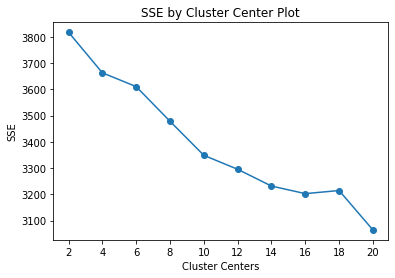

In [122]:
from sklearn.cluster import MiniBatchKMeans

def find_optimal_clusters(data, max_k):
    tfidf_vectorizer = TfidfVectorizer(tokenizer=clean_text,
                                    stop_words=stopwords.words('english'),
                                    max_df=0.9,
#                                     min_df=0.1,
#                                        ngram_range = (2,2),
                                    max_features = 8000,

                                    lowercase=True)
    #builds a tf-idf matrix for the sentences
    tfidf_matrix = tfidf_vectorizer.fit_transform(data)
    words = tfidf_vectorizer.get_feature_names()
    
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(tfidf_matrix).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(sentences, 20)

In [100]:
sentences = [sent for sent in sentences if sent not in ['', 'li'] if len(sent) > 20]

In [123]:
check = set(sentences)
len(check)

1862

In [124]:
def count_sents(text, cluster, count_legit, count_fraud):
    if text in legit_sent:
        count_legit += 1
#         cluster_cont[cluster] = {'legit':count_legit}
    else:
        count_fraud += 1
#         cluster_cont[cluster] = {'fraud':count_fraud}

    return count_legit, count_fraud

num_of_clusters = 16
clusters = cluster_sentences(sentences, nb_of_clusters=num_of_clusters)
counts = {f'cluster_{i}' : [["legit", 0] , ["fraud",0]] for i in range(num_of_clusters)}


0 : face, package, require, compensation, must, ability, experience, recruit, strong, please
1 : process, design, development, subsea, support, solution, within, application, develop, qualification
2 : discovery, bring, recovery, maximize, petroleum, technology, production, field, design, engineering
3 : people, approximately, country, employ, go, information, business, value, since, london
4 : services, special, workforce, across, meet, focus, private, sector, need, solution
5 : provider, global, product, solution, system, gas, oil, industry, service, aker
6 : candidate, hire, referral, recruiting, recruit, directly, encourage, strategy, right, search
7 : experience, year, minimum, degree, engineering, require, free, military, orb, prefer
8 : interview, phone, skype, attend, onlyplease, location, apply, email, consider, face
9 : recruitment, middle, east, consulting, specialized, become, agency, array, successful, talent
10 : project, equipment, perform, ensure, procedure, safety, wor

In [125]:
for cluster in range(0,num_of_clusters):
#     print("cluster ",cluster,":")

    for i,sentence in enumerate(clusters[cluster]):
        if (sentences[sentence] == "") or (len(sentences[sentence]) < 10):
            pass
        else:
            
            if sentences[sentence] in legit_sent:
#                 print("\tsentence ",i," legit: ",sentences[sentence])

                counts[f'cluster_{cluster}'][0][1] +=  1
            else:
#                 print("\tsentence ",i," fraud: ",sentences[sentence])

                counts[f'cluster_{cluster}'][1][1] += 1

In [126]:
counts

{'cluster_0': [['legit', 817], ['fraud', 424]],
 'cluster_1': [['legit', 137], ['fraud', 230]],
 'cluster_2': [['legit', 0], ['fraud', 63]],
 'cluster_3': [['legit', 29], ['fraud', 117]],
 'cluster_4': [['legit', 107], ['fraud', 0]],
 'cluster_5': [['legit', 0], ['fraud', 68]],
 'cluster_6': [['legit', 79], ['fraud', 104]],
 'cluster_7': [['legit', 263], ['fraud', 45]],
 'cluster_8': [['legit', 88], ['fraud', 18]],
 'cluster_9': [['legit', 58], ['fraud', 0]],
 'cluster_10': [['legit', 283], ['fraud', 319]],
 'cluster_11': [['legit', 106], ['fraud', 0]],
 'cluster_12': [['legit', 107], ['fraud', 0]],
 'cluster_13': [['legit', 93], ['fraud', 34]],
 'cluster_14': [['legit', 174], ['fraud', 138]],
 'cluster_15': [['legit', 107], ['fraud', 0]]}